# Coronavirus Disease (COVID-19)

https://github.com/owid/covid-19-data/tree/master/public/data/
https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import warnings
from IPython import display

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('display.precision', 5)
pd.set_option('expand_frame_repr', True)
warnings.simplefilter('ignore')                                              

# Import Image

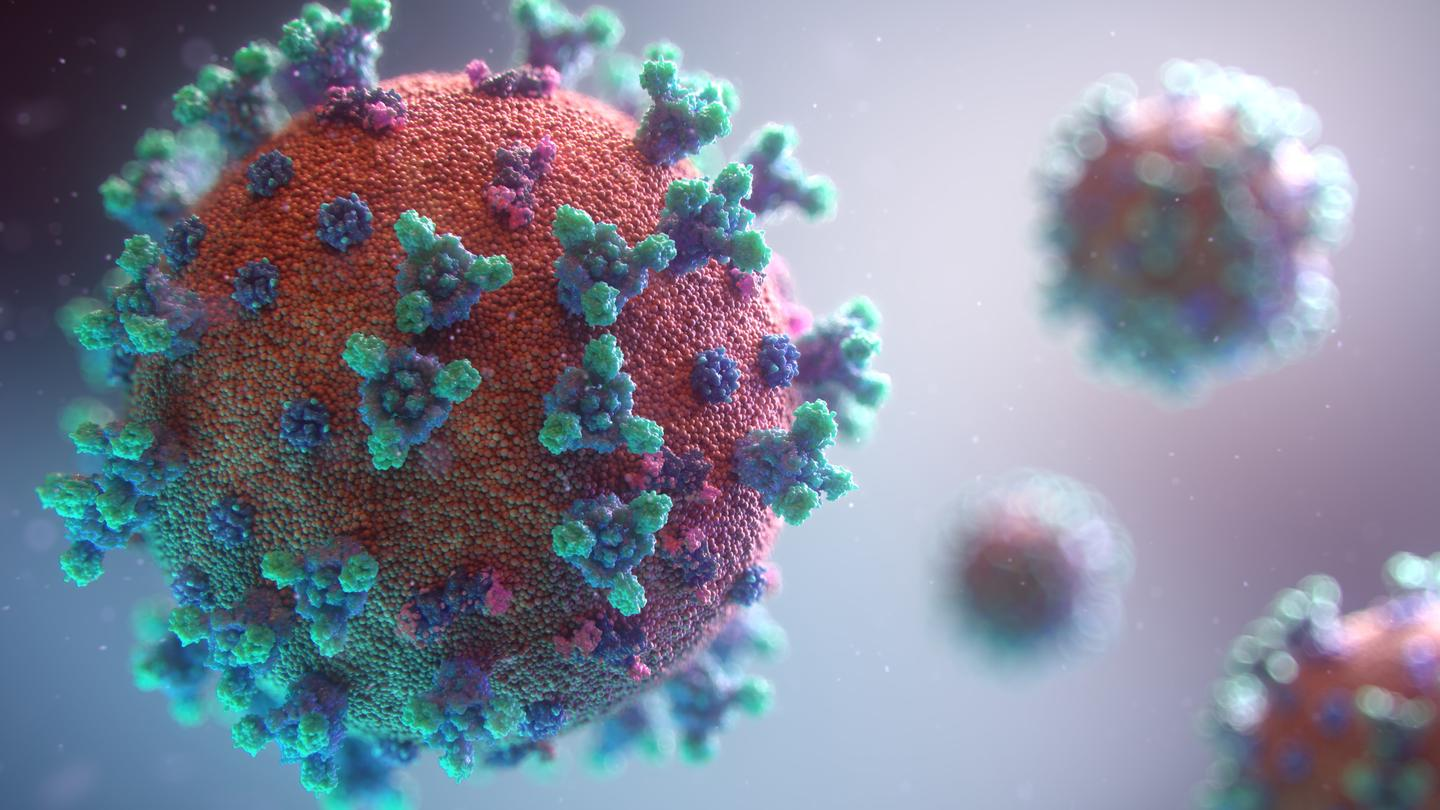

In [3]:
# get current working directory
path_directory = os.getcwd()  

image_path = os.path.join(path_directory, 'images', 'Covid 19.jpg')

display.Image(image_path)

# Fetch Data

In [4]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(url)

# Head and Tail

In [5]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   
1                     NaN                              NaN                NaN   
2                     NaN                              NaN                NaN   
3                     NaN                              NaN                NaN   
4                     NaN                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN          NaN        NaN   
1                                 NaN          NaN        NaN   
2                                 NaN          NaN        NaN   
3                                 NaN          NaN        NaN   
4                                 NaN          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_

In [6]:
df.shape

(221491, 67)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221491 entries, 0 to 221490
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    221491 non-null  object 
 1   continent                                   208753 non-null  object 
 2   location                                    221491 non-null  object 
 3   date                                        221491 non-null  object 
 4   total_cases                                 212532 non-null  float64
 5   new_cases                                   212282 non-null  float64
 6   new_cases_smoothed                          211086 non-null  float64
 7   total_deaths                                193408 non-null  float64
 8   new_deaths                                  193359 non-null  float64
 9   new_deaths_smoothed                         192179 non-null  float64
 

In [8]:
df.dtypes.value_counts()

float64    62
object      5
dtype: int64

In [9]:
df['iso_code'].value_counts(ascending=False).head(10)                     # explore the top ten count for different iso codes

ARG         1009
MEX         1009
THA         1006
TWN          994
MAC          988
OWID_WRL     988
OWID_UMC     988
KOR          988
CHN          988
USA          988
Name: iso_code, dtype: int64

In [10]:
df['continent'].value_counts()                                                                            

Africa           51188
Europe           47899
Asia             47530
North America    34068
Oceania          15769
South America    12299
Name: continent, dtype: int64

In [11]:
round(df['continent'].value_counts(True), 3)                              # calculate the relative frequencies for each continent                        

Africa           0.245
Europe           0.229
Asia             0.228
North America    0.163
Oceania          0.076
South America    0.059
Name: continent, dtype: float64

(-1.13665798187778, 1.30769062965452, -1.1147408951435986, 1.1078855608086906)

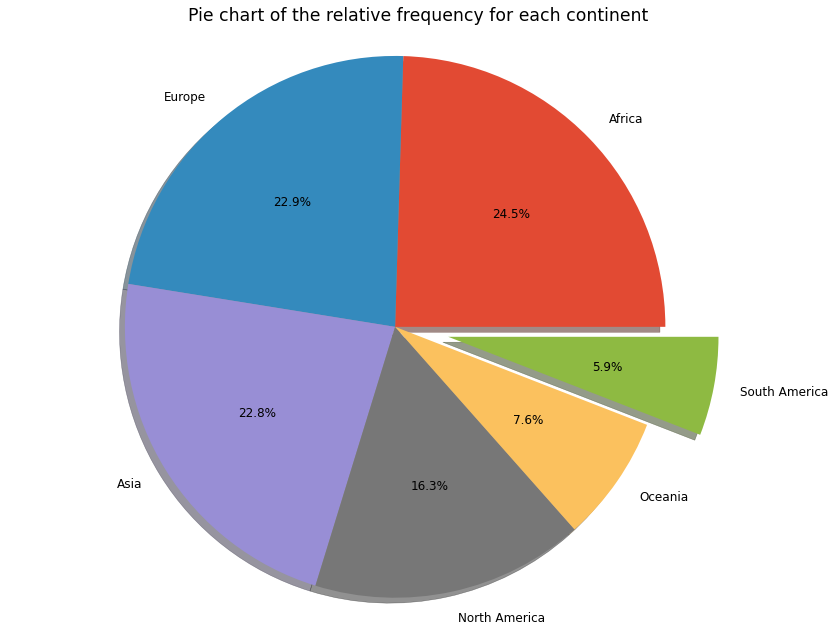

In [12]:
fig, ax = plt.subplots()

plt.pie(
          x=df['continent'].value_counts(True).values, labels=df['continent'].value_counts(True).keys(),
          autopct='%1.1f%%', shadow=True, 
          explode=[0, 0, 0, 0, 0, 0.2]
        )

ax.set(title='Pie chart of the relative frequency for each continent')
ax.axis('equal')

In [13]:
df['location'].value_counts().head(10)

Argentina              1009
Mexico                 1009
Thailand               1006
Taiwan                  994
Macao                   988
World                   988
Upper middle income     988
South Korea             988
China                   988
United States           988
Name: location, dtype: int64

In [14]:
df.describe(include='object')

iso_code continent   location        date      tests_units
count    221491    208753     221491      221491           106788
unique      244         6        244        1009                4
top         ARG    Africa  Argentina  2021-09-08  tests performed
freq       1009     51188       1009         243            80099

In [15]:
df.describe(include='float64')

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.12532e+05  2.12282e+05         2.11086e+05   1.93408e+05   
mean   4.29485e+06  1.24445e+04         1.24821e+04   7.29823e+04   
std    2.68994e+07  8.58326e+04         8.39149e+04   3.75875e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.10300e+03  0.00000e+00         6.28600e+00   1.11000e+02   
50%    4.72050e+04  5.70000e+01         9.65710e+01   1.14100e+03   
75%    5.07134e+05  9.74000e+02         1.14039e+03   9.62700e+03   
max    6.19713e+08  4.08173e+06         3.43627e+06   6.55210e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  193359.00000         192179.00000             211560.00000   
mean      140.70145            141.43094              57878.75284   
std       737.10772            722.65809             103329.45353   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1032.43950   
50%         1.00000              1.57100               9832.53600   
75%        14.00000             16.14300              69687.47475   
max     17737.00000          14858.14300             656238.17700   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           211310.00000                    210119.00000   
mean               190.19492                       190.34327   
std               1054.49079                       668.33708   
min                  0.00000                         0.00000   
25%                  0.00000                         1.38800   
50%                  7.97200                        19.76200   
75%                 98.94150                       136.59600   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              192449.00000            192400.00000   
mean                  679.35160                 1.42572   
std                   965.84791                 5.12867   
min                     0.00000                 0.00000   
25%                    28.63800                 0.00000   
50%                   205.99400                 0.03700   
75%                  1006.40100                 1.00300   
max                  6425.12100               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     191225.00000       166717.00000   28134.00000   
mean                           1.42577            0.94681     833.67598   
std                            3.36122            0.38405    2474.31443   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21300            0.97000     152.00000   
75%                            1.36500            1.15000     579.75000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28134.00000    30886.00000                30886.00000   
mean                   21.00068     4160.13456                  156.44846   
std                    26.21494    10790.19768                  191.65864   
min                     0.00000        0.00000                    0.00000   
25%                     3.77600      172.00000                   32.84700   
50%                    10.55550      811.00000                   88.16100   
75%                    29.10900     3187.00000                  199.31275   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7160.00000                         7160.00000   
mean               429.38869                           13.19809   
std                583.63815                           15.19455   
min             

In [16]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x))            # convert date to pandas datetime
df.select_dtypes(include='datetime')

date
0      2020-02-24
1      2020-02-25
2      2020-02-26
3      2020-02-27
4      2020-02-28
...           ...
221486 2022-10-01
221487 2022-10-02
221488 2022-10-03
221489 2022-10-04
221490 2022-10-05

[221491 rows x 1 columns]

In [17]:
df['day_name'] = df['date'].dt.day_name()                             # add name of the day
df['day'] = df['date'].dt.day                                         # day
df['month_num'] = df['date'].dt.month                                 # add month number
df['year'] =  df['date'].dt.year                                      # year

df[['year', 'month_num', 'day', 'day_name']]

year  month_num  day   day_name
0       2020          2   24     Monday
1       2020          2   25    Tuesday
2       2020          2   26  Wednesday
3       2020          2   27   Thursday
4       2020          2   28     Friday
...      ...        ...  ...        ...
221486  2022         10    1   Saturday
221487  2022         10    2     Sunday
221488  2022         10    3     Monday
221489  2022         10    4    Tuesday
221490  2022         10    5  Wednesday

[221491 rows x 4 columns]

In [18]:
# assign month names
def assign_month_name(x):
  if x == 1:
    return 'Jan'
  elif x == 2:
    return 'Feb'
  elif x == 3:
     return 'Mar'
  elif x == 4:
    return 'Apr'
  elif x == 5:
    return 'May'
  elif x == 6:
     return 'June'
  elif x == 7:
    return 'July'
  elif x == 8:
    return 'Aug'
  elif x == 9:
    return 'Sep'
  elif x == 10:
    return 'Oct'
  elif x == 11:
    return 'Nov'
  else:
    return 'Dec'

df['month_name'] = df['month_num'].apply(assign_month_name)
df['month_name'].value_counts()

July    21743
May     21688
Aug     21687
June    21061
Sep     20975
Apr     20740
Mar     19606
Oct     15665
Jan     14919
Feb     14764
Dec     14543
Nov     14100
Name: month_name, dtype: int64

In [19]:
# change month name to categorical 
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['month_name'] = pd.Categorical(df['month_name'], ordered_months)

df['month_name'].dtype

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
, ordered=False)

[Text(0.5, 1.0, 'Total count by month name'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Month Name')]

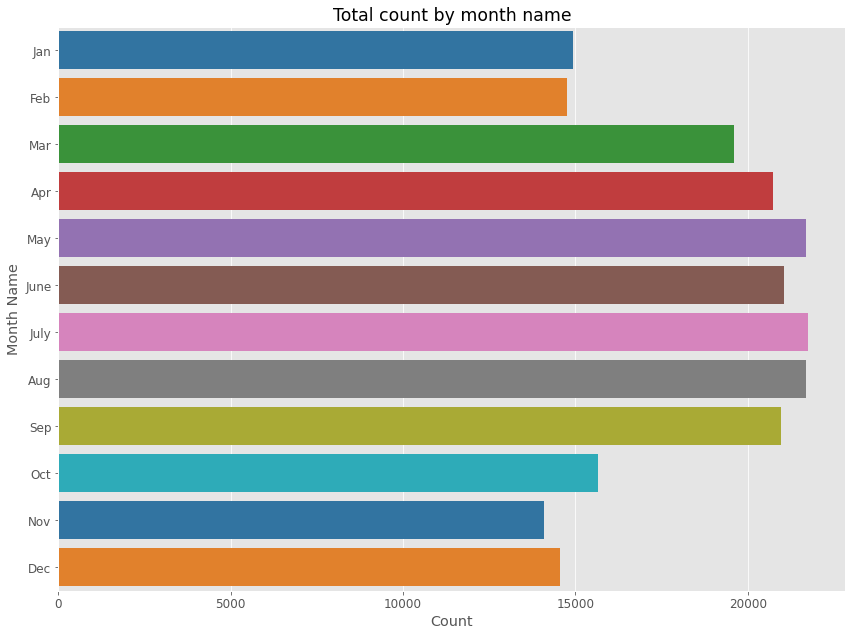

In [20]:
fig, ax = plt.subplots()

sns.countplot(data=df, y='month_name', hue_order='month_name', palette='tab10')

ax.set(title='Total count by month name', xlabel='Count',  ylabel='Month Name')

# Missing Data Exploration

In [21]:
df.isna().sum()                                                              # over 50 % missing data in some columns

iso_code                                           0
continent                                      12738
location                                           0
date                                               0
total_cases                                     8959
new_cases                                       9209
new_cases_smoothed                             10405
total_deaths                                   28083
new_deaths                                     28132
new_deaths_smoothed                            29312
total_cases_per_million                         9931
new_cases_per_million                          10181
new_cases_smoothed_per_million                 11372
total_deaths_per_million                       29042
new_deaths_per_million                         29091
new_deaths_smoothed_per_million                30266
reproduction_rate                              54774
icu_patients                                  193357
icu_patients_per_million                      

<AxesSubplot:>

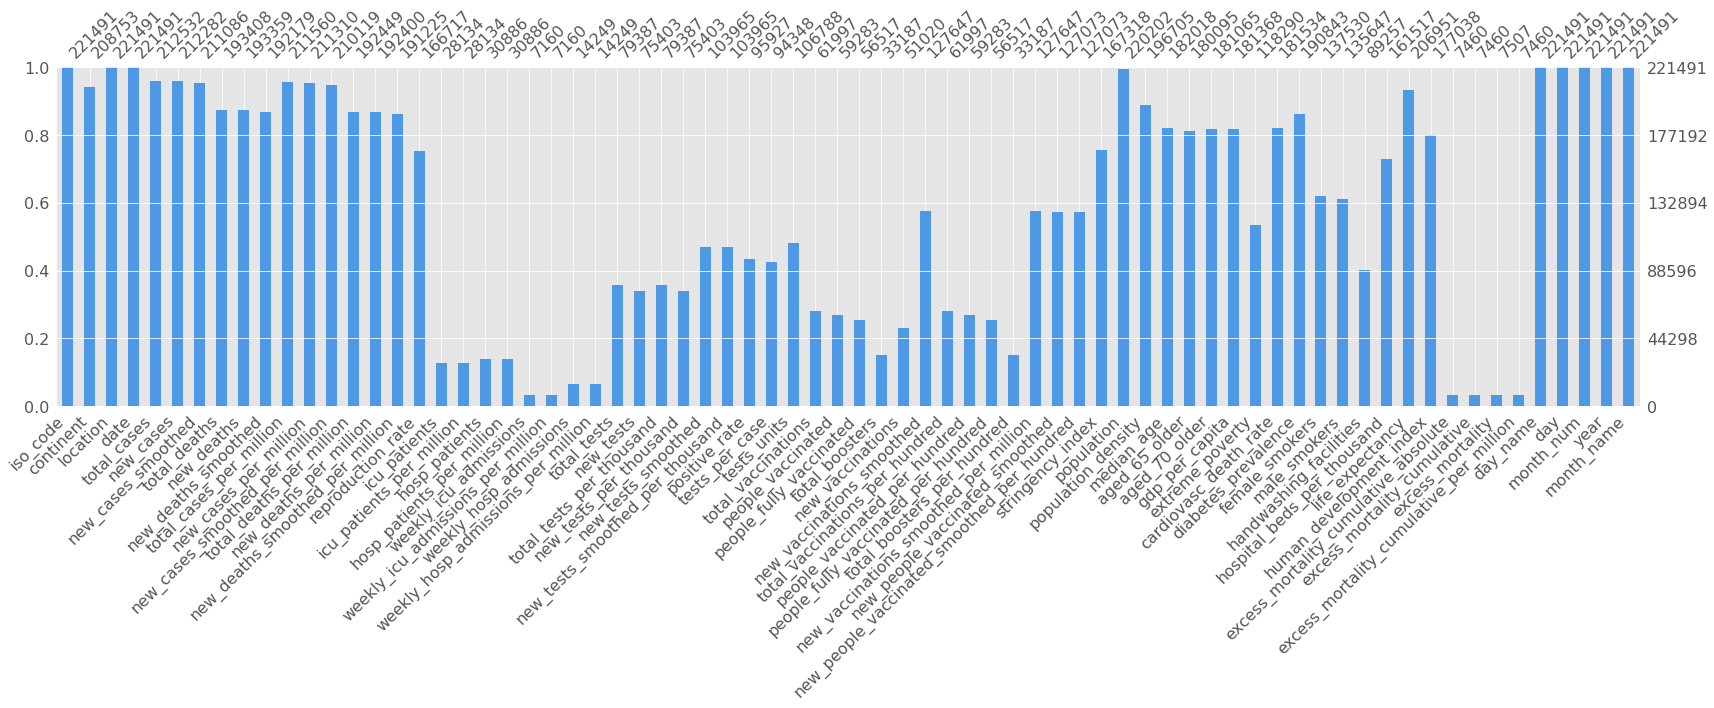

In [22]:
msno.bar(df, labels=True, color=(0.3, 0.6, 0.9))                              # plot missing values for each column

<AxesSubplot:>

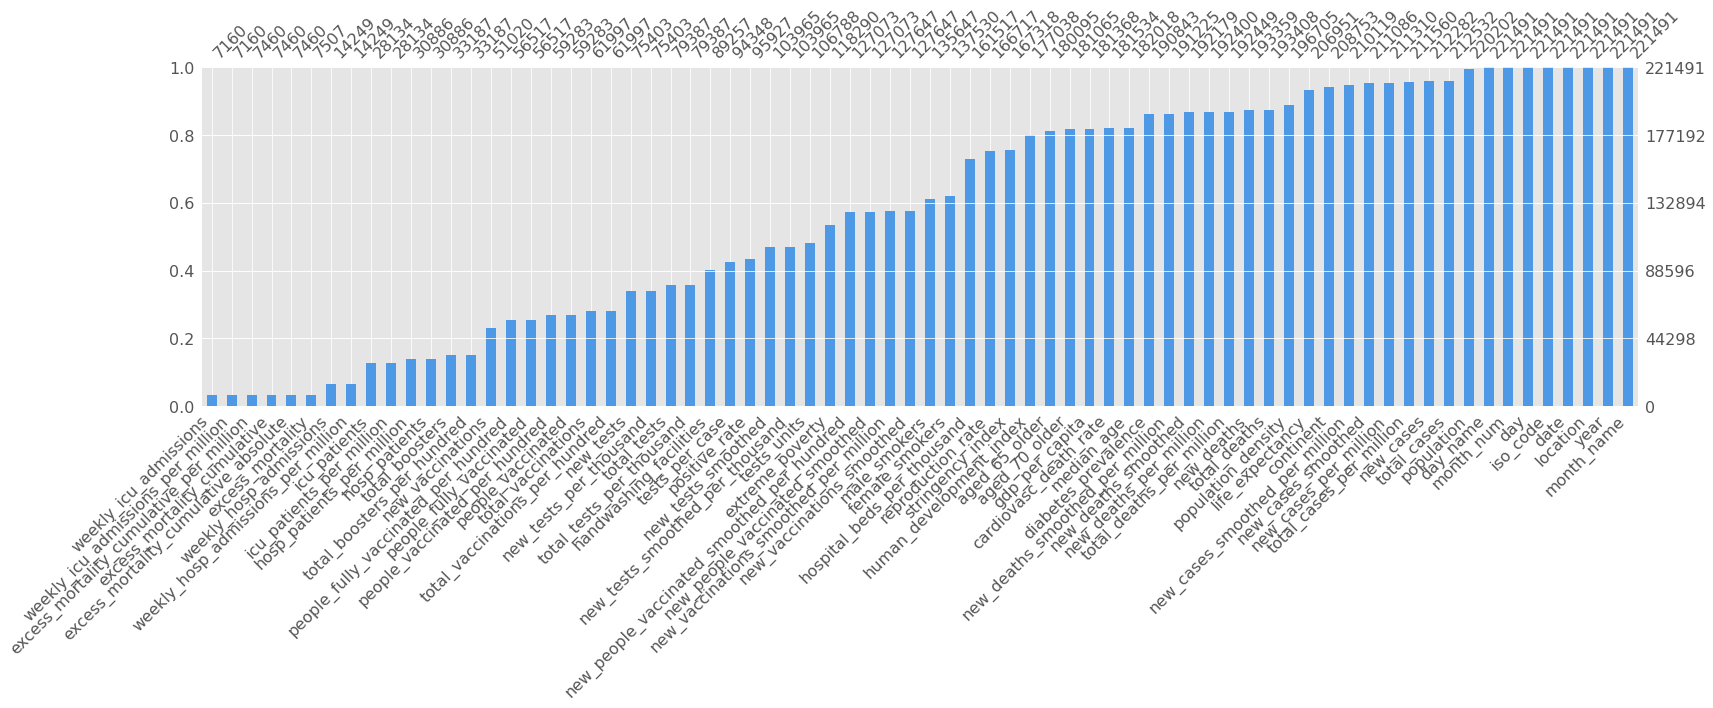

In [23]:
msno.bar(df, labels=True, color=(0.3, 0.6, 0.9), sort='ascending') 

In [24]:
# filter for missing values based on the column with the highest values missing
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
221486      ZWE    Africa     Zimbabwe 2022-10-01     257465.0        0.0   
221487      ZWE    Africa     Zimbabwe 2022-10-02     257517.0       52.0   
221488      ZWE    Africa     Zimbabwe 2022-10-03     257538.0       21.0   
221489      ZWE    Africa     Zimbabwe 2022-10-04     257568.0       30.0   
221490      ZWE    Africa     Zimbabwe 2022-10-05     257568.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
221486              21.000        5602.0         0.0                0.429   
221487              25.286        5602.0         0.0                0.429   
221488              28.000        5603.0         1.0                0.571   
221489              27.429        5603.0         0.0                0.571   
221490              22.714        5603.0         0.0                0.143   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
221486                16098.078                  0.000   
221487                16101.330                  3.251   
221488                16102.643                  1.313   
221489                16104.518                  1.876   
221490                16104.518                  0.000   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
221486                           1.313                   350.267   
221487                           1.581                   350.267   
221488                           1.751                   350.329   
221489                           1.715                   350.329   
221490                           1.420                   350.329   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
221486                   0.000                            0.027   
221487                   0.000                            0.027   
221488                   0.063          

Common strategies that can be used to handle missing data for this project may include:
1) ignoring the missing data
2) dropping records with missing data
3) filling the missing data

In [25]:
# droping missing data based on rows containing missing values results in an empty dataframe   
df.dropna(axis='index')

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million, day_name, day, month_num, year, month_name]
Index: []

In [26]:
# dropping missing values based on columns also returns an a smaller dataframe as almost all columns contains a missing value
df.dropna(axis='columns')

iso_code     location       date   day_name  day  month_num  year  \
0           AFG  Afghanistan 2020-02-24     Monday   24          2  2020   
1           AFG  Afghanistan 2020-02-25    Tuesday   25          2  2020   
2           AFG  Afghanistan 2020-02-26  Wednesday   26          2  2020   
3           AFG  Afghanistan 2020-02-27   Thursday   27          2  2020   
4           AFG  Afghanistan 2020-02-28     Friday   28          2  2020   
...         ...          ...        ...        ...  ...        ...   ...   
221486      ZWE     Zimbabwe 2022-10-01   Saturday    1         10  2022   
221487      ZWE     Zimbabwe 2022-10-02     Sunday    2         10  2022   
221488      ZWE     Zimbabwe 2022-10-03     Monday    3         10  2022   
221489      ZWE     Zimbabwe 2022-10-04    Tuesday    4         10  2022   
221490      ZWE     Zimbabwe 2022-10-05  Wednesday    5         10  2022   

       month_name  
0             Feb  
1             Feb  
2             Feb  
3             Feb  
4             Feb  
...           ...  
221486        Oct  
221487        Oct  
221488        Oct  
221489        Oct  
221490        Oct  

[221491 rows x 8 columns]

Filling the missing data

In [27]:
# filling missing values with a constant value will not be a good decision for instance in total cases or deaths that varies for different locations
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
221486      ZWE    Africa     Zimbabwe 2022-10-01     257465.0        0.0   
221487      ZWE    Africa     Zimbabwe 2022-10-02     257517.0       52.0   
221488      ZWE    Africa     Zimbabwe 2022-10-03     257538.0       21.0   
221489      ZWE    Africa     Zimbabwe 2022-10-04     257568.0       30.0   
221490      ZWE    Africa     Zimbabwe 2022-10-05     257568.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
221486              21.000        5602.0         0.0                0.429   
221487              25.286        5602.0         0.0                0.429   
221488              28.000        5603.0         1.0                0.571   
221489              27.429        5603.0         0.0                0.571   
221490              22.714        5603.0         0.0                0.143   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
221486                16098.078                  0.000   
221487                16101.330                  3.251   
221488                16102.643                  1.313   
221489                16104.518                  1.876   
221490                16104.518                  0.000   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
221486                           1.313                   350.267   
221487                           1.581                   350.267   
221488                           1.751                   350.329   
221489                           1.715                   350.329   
221490                           1.420                   350.329   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
221486                   0.000                            0.027   
221487                   0.000                            0.027   
221488                   0.063          

Fill with Mean / Median of Group

In [28]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby('location').transform('mean')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.07687e+05  2.07687e+05         2.07687e+05   2.04542e+05   
mean   4.22445e+06  1.21256e+04         1.21600e+04   6.81874e+04   
std    2.71795e+07  8.64251e+04         8.44218e+04   3.66436e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.41100e+03  0.00000e+00         5.57100e+00   7.70000e+01   
50%    3.96060e+04  4.70000e+01         8.07140e+01   7.89000e+02   
75%    4.15040e+05  8.19000e+02         9.38928e+02   7.32100e+03   
max    6.19713e+08  4.08173e+06         3.43627e+06   6.55210e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  204542.00000         204542.00000             206715.00000   
mean      131.49123            132.04893              54477.29565   
std       717.45842            702.64223              99586.09108   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.01224                938.26700   
50%         0.45205              1.00000               8632.20700   
75%        11.00000             12.00000              64891.97650   
max     17737.00000          14858.14300             656238.17700   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           206715.00000                    206715.00000   
mean               182.58625                       182.32750   
std               1052.22149                       658.14827   
min                  0.00000                         0.00000   
25%                  0.00000                         1.26000   
50%                  6.97100                        17.51700   
75%                 89.68750                       126.90700   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              203570.00000            203570.00000   
mean                  629.80612                 1.40338   
std                   924.46263                 4.96721   
min                     0.00000                 0.00000   
25%                    28.96800                 0.00000   
50%                   188.96100                 0.07300   
75%                   919.87700                 1.08600   
max                  6425.12100               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     203570.00000       173829.00000   29894.00000   
mean                           1.39703            0.93491     761.26045   
std                            3.24614            0.37663    2513.16092   
min                            0.00000           -0.08000       0.00000   
25%                            0.00400            0.75000      25.00000   
50%                            0.22500            0.96000      89.00000   
75%                            1.40100            1.13000     495.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29894.00000    31912.00000                31912.00000   
mean                   18.38707     3965.43635                  149.30283   
std                    21.80349    10753.93170                  181.66992   
min                     0.00000        0.00000                    0.00000   
25%                     4.52700      173.00000                   39.83800   
50%                     9.64950      803.04440                   85.02452   
75%                    27.71200     2864.00000                  192.38825   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             9259.00000                         9259.00000   
mean               180.84198                           11.96441   
std                300.38930                            8.73627   
min             

In [29]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby('location').transform('median')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.07687e+05  2.07687e+05         2.07687e+05   2.04542e+05   
mean   4.22372e+06  1.21186e+04         1.21322e+04   6.82766e+04   
std    2.71792e+07  8.64254e+04         8.43807e+04   3.66576e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.50550e+03  0.00000e+00         5.28600e+00   7.60000e+01   
50%    3.95860e+04  4.60000e+01         8.00000e+01   7.89000e+02   
75%    4.13460e+05  8.11000e+02         9.23357e+02   7.31500e+03   
max    6.19713e+08  4.08173e+06         3.43627e+06   6.55210e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  204542.00000         204542.00000             206715.00000   
mean      131.01002            131.54654              54686.92452   
std       717.37575            702.49530             100147.82128   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000                929.95950   
50%         0.00000              1.00000               8506.58900   
75%        10.00000             11.42900              64846.66700   
max     17737.00000          14858.14300             656238.17700   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           206715.00000                    206715.00000   
mean               177.74902                       176.83816   
std               1049.44394                       653.25369   
min                  0.00000                         0.00000   
25%                  0.00000                         1.16100   
50%                  6.42600                        16.77300   
75%                 86.52500                       122.81300   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              203570.00000            203570.00000   
mean                  635.24617                 1.27559   
std                   928.13327                 4.95609   
min                     0.00000                 0.00000   
25%                    28.45600                 0.00000   
50%                   191.42400                 0.00000   
75%                   923.63700                 0.75700   
max                  6425.12100               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     203570.00000       173829.00000   29894.00000   
mean                           1.28316            0.92997     735.63887   
std                            3.22476            0.38072    2470.69738   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.74000      24.00000   
50%                            0.14300            0.96000      88.00000   
75%                            1.16800            1.13000     469.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29894.00000    31912.00000                31912.00000   
mean                   17.62856     3737.94599                  143.05814   
std                    22.01604    10457.34110                  180.97005   
min                     0.00000        0.00000                    0.00000   
25%                     3.75800      171.00000                   39.16350   
50%                     9.26700      767.00000                   76.14350   
75%                    24.26450     2799.25000                  174.92250   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             9259.00000                         9259.00000   
mean               146.29355                            7.50045   
std                268.37383                            3.53551   
min             

In [30]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.12532e+05  2.12282e+05         2.11086e+05   1.93408e+05   
mean   4.29485e+06  1.24445e+04         1.24821e+04   7.29823e+04   
std    2.68994e+07  8.58326e+04         8.39149e+04   3.75875e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.10300e+03  0.00000e+00         6.28600e+00   1.11000e+02   
50%    4.72050e+04  5.70000e+01         9.65710e+01   1.14100e+03   
75%    5.07134e+05  9.74000e+02         1.14039e+03   9.62700e+03   
max    6.19713e+08  4.08173e+06         3.43627e+06   6.55210e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  193359.00000         192179.00000             211560.00000   
mean      140.70145            141.43094              57878.75284   
std       737.10772            722.65809             103329.45353   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1032.43950   
50%         1.00000              1.57100               9832.53600   
75%        14.00000             16.14300              69687.47475   
max     17737.00000          14858.14300             656238.17700   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           211310.00000                    210119.00000   
mean               190.19492                       190.34327   
std               1054.49079                       668.33708   
min                  0.00000                         0.00000   
25%                  0.00000                         1.38800   
50%                  7.97200                        19.76200   
75%                 98.94150                       136.59600   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              192449.00000            192400.00000   
mean                  679.35160                 1.42572   
std                   965.84791                 5.12867   
min                     0.00000                 0.00000   
25%                    28.63800                 0.00000   
50%                   205.99400                 0.03700   
75%                  1006.40100                 1.00300   
max                  6425.12100               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     191225.00000       166717.00000   28134.00000   
mean                           1.42577            0.94681     833.67598   
std                            3.36122            0.38405    2474.31443   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21300            0.97000     152.00000   
75%                            1.36500            1.15000     579.75000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28134.00000    30886.00000                30886.00000   
mean                   21.00068     4160.13456                  156.44846   
std                    26.21494    10790.19768                  191.65864   
min                     0.00000        0.00000                    0.00000   
25%                     3.77600      172.00000                   32.84700   
50%                    10.55550      811.00000                   88.16100   
75%                    29.10900     3187.00000                  199.31275   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7160.00000                         7160.00000   
mean               429.38869                           13.19809   
std                583.63815                           15.19455   
min             

Forward Fill & Back Fill within Groups

In [31]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby('location').transform('ffill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.05380e+05  2.05380e+05         2.04224e+05   1.86291e+05   
mean   4.26780e+06  1.22540e+04         1.22894e+04   7.38157e+04   
std    2.73275e+07  8.69007e+04         8.50249e+04   3.82832e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.71200e+03  0.00000e+00         5.57100e+00   1.03000e+02   
50%    4.11865e+04  4.80000e+01         8.30000e+01   9.82000e+02   
75%    4.21770e+05  8.29000e+02         9.41714e+02   8.43400e+03   
max    6.19713e+08  4.08173e+06         3.43627e+06   6.55210e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  186469.00000         185349.00000             204408.00000   
mean      143.03966            143.74591              54502.53965   
std       750.08957            735.45837              99844.61044   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000                954.64850   
50%         1.00000              1.28600               8625.98850   
75%        13.00000             13.85700              64604.33150   
max     17737.00000          14858.14300             656238.17700   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           204408.00000                    203257.00000   
mean               180.17522                       179.26296   
std               1056.30468                       658.59648   
min                  0.00000                         0.00000   
25%                  0.00000                         1.24800   
50%                  6.75200                        17.19400   
75%                 88.24525                       123.92600   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              185332.00000            185510.00000   
mean                  649.32003                 1.39250   
std                   952.72536                 5.33441   
min                     0.00000                 0.00000   
25%                    27.25800                 0.00000   
50%                   185.62600                 0.02400   
75%                   948.69775                 0.90900   
max                  6425.12100               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     184395.00000       160359.00000    26565.0000   
mean                           1.38602            0.94077      692.5636   
std                            3.37102            0.38764     2497.4012   
min                            0.00000           -0.08000        0.0000   
25%                            0.00000            0.75000       20.0000   
50%                            0.18700            0.96000       84.0000   
75%                            1.28400            1.15000      367.0000   
max                          148.67300            5.72000    28891.0000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               26565.00000    28719.00000                28719.00000   
mean                   17.32446     3653.01121                  148.53423   
std                    23.08630    10769.62642                  190.92292   
min                     0.00000        0.00000                    0.00000   
25%                     2.79800      135.00000                   30.12500   
50%                     7.71000      667.00000                   82.70100   
75%                    22.09100     2455.00000                  178.27850   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             5935.00000                         5935.00000   
mean                57.83858                           13.36083   
std                122.58272                           21.56558   
min             

In [32]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby('location').transform('backfill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.07687e+05  2.07592e+05         2.07592e+05   2.04542e+05   
mean   4.22040e+06  1.21203e+04         1.20894e+04   6.72293e+04   
std    2.71790e+07  8.64455e+04         8.43466e+04   3.65958e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.22250e+03  0.00000e+00         4.71400e+00   4.30000e+01   
50%    3.87940e+04  4.50000e+01         7.62145e+01   6.65000e+02   
75%    4.10640e+05  8.03000e+02         9.04429e+02   6.85475e+03   
max    6.19713e+08  4.08173e+06         3.43627e+06   6.55210e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  204503.00000         204503.00000             206715.00000   
mean      130.55616            130.31392              53895.11065   
std       717.42160            701.40995              99450.39768   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                900.12000   
50%         1.00000              0.85700               8171.18600   
75%        10.00000             10.71400              63549.12850   
max     17737.00000          14858.14300             656238.17700   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           206620.00000                    206620.00000   
mean               178.52963                       176.38774   
std               1049.67565                       653.53196   
min                  0.00000                         0.00000   
25%                  0.00000                         1.15100   
50%                  6.72500                        16.45100   
75%                 88.66400                       120.20275   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              203570.00000            203531.00000   
mean                  592.82334                 2.94255   
std                   926.78014                13.03446   
min                     0.00000                 0.00000   
25%                    17.34300                 0.00000   
50%                   135.44000                 0.06700   
75%                   836.70600                 1.26300   
max                  6425.12100               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     203531.00000       173074.00000   29133.00000   
mean                           1.59301            0.97883     712.15165   
std                            3.85297            0.44477    2480.76189   
min                            0.00000           -0.08000       0.00000   
25%                            0.00400            0.75000      21.00000   
50%                            0.20400            0.97000      88.00000   
75%                            1.44700            1.18000     367.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29133.00000    30709.00000                30709.00000   
mean                   17.43495     3706.27962                  139.05723   
std                    22.71687    10675.02883                  186.75994   
min                     0.00000        0.00000                    0.00000   
25%                     2.73600      151.00000                   28.89800   
50%                     8.16300      724.00000                   70.99100   
75%                    23.23100     2398.00000                  165.83200   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             8814.00000                         8814.00000   
mean               148.66122                           12.15363   
std                337.19793                           18.37926   
min             

In [33]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.12532e+05  2.12282e+05         2.11086e+05   1.93408e+05   
mean   4.29485e+06  1.24445e+04         1.24821e+04   7.29823e+04   
std    2.68994e+07  8.58326e+04         8.39149e+04   3.75875e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.10300e+03  0.00000e+00         6.28600e+00   1.11000e+02   
50%    4.72050e+04  5.70000e+01         9.65710e+01   1.14100e+03   
75%    5.07134e+05  9.74000e+02         1.14039e+03   9.62700e+03   
max    6.19713e+08  4.08173e+06         3.43627e+06   6.55210e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  193359.00000         192179.00000             211560.00000   
mean      140.70145            141.43094              57878.75284   
std       737.10772            722.65809             103329.45353   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1032.43950   
50%         1.00000              1.57100               9832.53600   
75%        14.00000             16.14300              69687.47475   
max     17737.00000          14858.14300             656238.17700   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           211310.00000                    210119.00000   
mean               190.19492                       190.34327   
std               1054.49079                       668.33708   
min                  0.00000                         0.00000   
25%                  0.00000                         1.38800   
50%                  7.97200                        19.76200   
75%                 98.94150                       136.59600   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              192449.00000            192400.00000   
mean                  679.35160                 1.42572   
std                   965.84791                 5.12867   
min                     0.00000                 0.00000   
25%                    28.63800                 0.00000   
50%                   205.99400                 0.03700   
75%                  1006.40100                 1.00300   
max                  6425.12100               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     191225.00000       166717.00000   28134.00000   
mean                           1.42577            0.94681     833.67598   
std                            3.36122            0.38405    2474.31443   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21300            0.97000     152.00000   
75%                            1.36500            1.15000     579.75000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28134.00000    30886.00000                30886.00000   
mean                   21.00068     4160.13456                  156.44846   
std                    26.21494    10790.19768                  191.65864   
min                     0.00000        0.00000                    0.00000   
25%                     3.77600      172.00000                   32.84700   
50%                    10.55550      811.00000                   88.16100   
75%                    29.10900     3187.00000                  199.31275   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7160.00000                         7160.00000   
mean               429.38869                           13.19809   
std                583.63815                           15.19455   
min             

Combining FFill and BFill

In [34]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby('location').transform('ffill').transform('backfill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.14331e+05  2.14331e+05         2.14331e+05   2.14331e+05   
mean   4.08957e+06  1.17423e+04         1.17112e+04   6.41589e+04   
std    2.67644e+07  8.51020e+04         8.30366e+04   3.57779e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    2.29800e+03  0.00000e+00         3.57100e+00   2.60000e+01   
50%    3.42440e+04  3.70000e+01         6.80000e+01   5.04000e+02   
75%    3.78743e+05  7.40000e+02         8.40143e+02   6.08900e+03   
max    6.19713e+08  4.08173e+06         3.43627e+06   6.55210e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  214331.00000         214331.00000             214331.00000   
mean      124.61090            124.39533              51980.18772   
std       701.26124            685.67698              98175.68897   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                672.11900   
50%         1.00000              0.71400               6703.05600   
75%         9.00000              9.57100              60668.62600   
max     17737.00000          14858.14300             656238.17700   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           214331.00000                    214331.00000   
mean               172.81478                       170.20342   
std               1032.18518                       642.53592   
min                  0.00000                         0.00000   
25%                  0.00000                         0.80700   
50%                  5.50300                        13.98100   
75%                 83.22400                       112.41950   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              214331.00000            214331.00000   
mean                  563.21847                 2.95670   
std                   912.34852                12.85859   
min                     0.00000                 0.00000   
25%                    12.62050                 0.00000   
50%                   109.32200                 0.07100   
75%                   761.39200                 1.19300   
max                  6425.12100               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     214331.00000       214331.00000  202614.00000   
mean                           1.55827            1.08164     282.06427   
std                            3.79456            0.65054    1069.11960   
min                            0.00000           -0.08000       0.00000   
25%                            0.00600            0.79000       0.00000   
50%                            0.18300            1.00000      10.00000   
75%                            1.38700            1.25000      88.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count              202614.00000   202614.00000               202614.00000   
mean                    7.89759     1362.34018                   44.31329   
std                    14.04167     4684.83536                   89.98989   
min                     0.00000        0.00000                    0.00000   
25%                     0.00000        1.00000                    0.05700   
50%                     0.97200       96.00000                   15.36550   
75%                     9.18900      621.00000                   63.30300   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count           180787.00000                       180787.00000   
mean               217.55435                           10.49135   
std                581.11808                           11.75267   
min             

In [35]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.12532e+05  2.12282e+05         2.11086e+05   1.93408e+05   
mean   4.29485e+06  1.24445e+04         1.24821e+04   7.29823e+04   
std    2.68994e+07  8.58326e+04         8.39149e+04   3.75875e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.10300e+03  0.00000e+00         6.28600e+00   1.11000e+02   
50%    4.72050e+04  5.70000e+01         9.65710e+01   1.14100e+03   
75%    5.07134e+05  9.74000e+02         1.14039e+03   9.62700e+03   
max    6.19713e+08  4.08173e+06         3.43627e+06   6.55210e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  193359.00000         192179.00000             211560.00000   
mean      140.70145            141.43094              57878.75284   
std       737.10772            722.65809             103329.45353   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1032.43950   
50%         1.00000              1.57100               9832.53600   
75%        14.00000             16.14300              69687.47475   
max     17737.00000          14858.14300             656238.17700   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           211310.00000                    210119.00000   
mean               190.19492                       190.34327   
std               1054.49079                       668.33708   
min                  0.00000                         0.00000   
25%                  0.00000                         1.38800   
50%                  7.97200                        19.76200   
75%                 98.94150                       136.59600   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              192449.00000            192400.00000   
mean                  679.35160                 1.42572   
std                   965.84791                 5.12867   
min                     0.00000                 0.00000   
25%                    28.63800                 0.00000   
50%                   205.99400                 0.03700   
75%                  1006.40100                 1.00300   
max                  6425.12100               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     191225.00000       166717.00000   28134.00000   
mean                           1.42577            0.94681     833.67598   
std                            3.36122            0.38405    2474.31443   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21300            0.97000     152.00000   
75%                            1.36500            1.15000     579.75000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28134.00000    30886.00000                30886.00000   
mean                   21.00068     4160.13456                  156.44846   
std                    26.21494    10790.19768                  191.65864   
min                     0.00000        0.00000                    0.00000   
25%                     3.77600      172.00000                   32.84700   
50%                    10.55550      811.00000                   88.16100   
75%                    29.10900     3187.00000                  199.31275   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7160.00000                         7160.00000   
mean               429.38869                           13.19809   
std                583.63815                           15.19455   
min             

In [36]:
# the best approach to fill missing values for this project is to group based on each location, and fill values with the means of each column
df_filled = df.fillna(df.groupby('location').transform('mean'))
df_filled.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0           210.34131    4535.59331     8.41855              8.46033   
1           210.34131    4535.59331     8.41855              8.46033   
2           210.34131    4535.59331     8.41855              8.46033   
3           210.34131    4535.59331     8.41855              8.46033   
4           210.34131    4535.59331     8.41855              8.46033   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                          5.2455                  113.1086   
1                          5.2455                  113.1086   
2                          5.2455                  113.1086   
3                          5.2455                  113.1086   
4                          5.2455                  113.1086   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                    0.21                          0.21103            1.06365   
1                    0.21                          0.21103            1.06365   
2                    0.21                          0.21103            1.06365   
3                    0.21                          0.21103            1.06365   
4                    0.21                          0.21103            1.06365   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN     924645.2        NaN   
1                                 NaN     924645.2        NaN   
2                                 NaN     924645.2        NaN   
3                                 NaN     924645.2        NaN   
4                                 NaN     924645.2        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.0588                     NaN           983.55396   
1                   23.0588                     NaN           983.55396   
2                   23.0588                     NaN           983.55396   
3                   23.0588                     NaN           983.55396   
4                   23.0588                     NaN           983.55396   

   new_tests_smoothed_per_thousa

<AxesSubplot:>

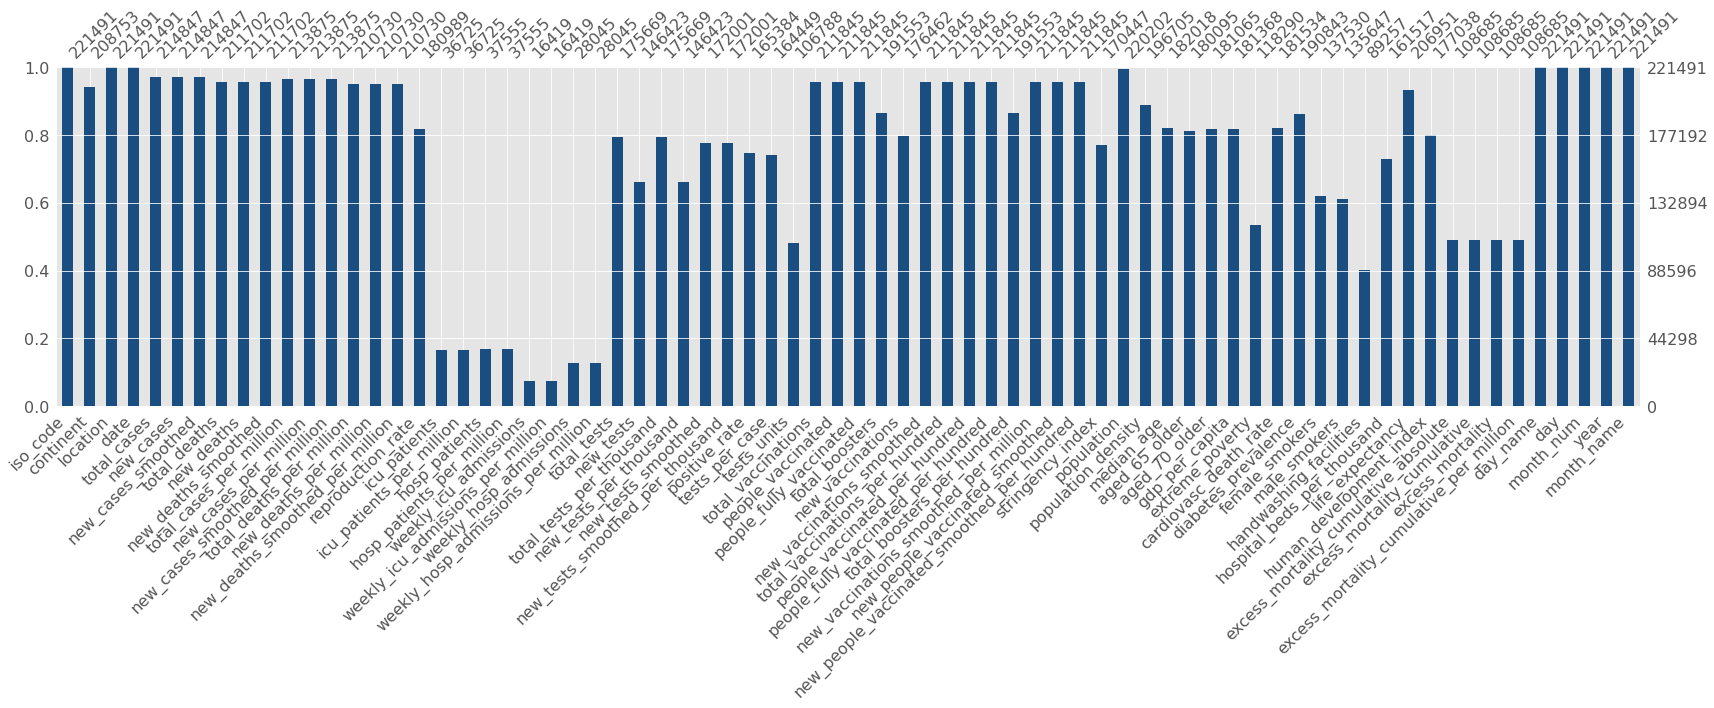

In [37]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5))

<AxesSubplot:>

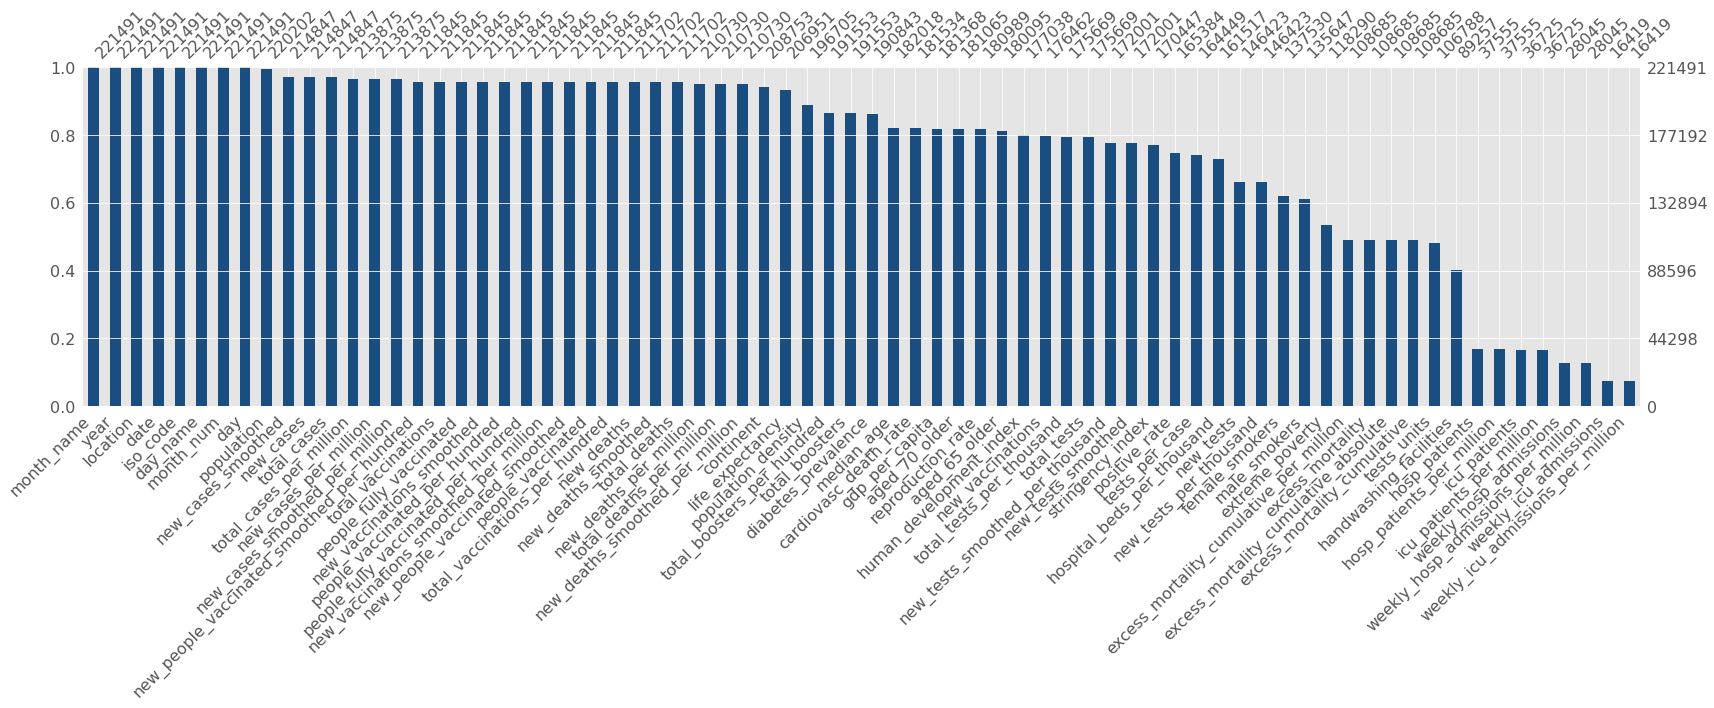

In [38]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5), sort='descending')

In [39]:
df_filled.drop(columns=['day', 'month_num', 'year']).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.14847e+05  2.14847e+05         2.14847e+05   2.11702e+05   
mean   4.25251e+06  1.23109e+04         1.23431e+04   6.76038e+04   
std    2.67583e+07  8.53288e+04         8.32856e+04   3.60323e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.83700e+03  0.00000e+00         6.14300e+00   8.50000e+01   
50%    4.55730e+04  5.50000e+01         9.41430e+01   8.60000e+02   
75%    5.01916e+05  9.65000e+02         1.13343e+03   8.52600e+03   
max    6.19713e+08  4.08173e+06         3.43627e+06   6.55210e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  211702.00000         211702.00000             213875.00000   
mean      129.62219            130.17705              57820.50079   
std       705.69928            691.02919             103051.39390   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.04313               1001.49200   
50%         1.00000              1.28600               9835.37500   
75%        12.00000             14.00000              69673.75350   
max     17737.00000          14858.14300             656238.17700   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           213875.00000                    213875.00000   
mean               192.87359                       193.17374   
std               1050.97511                       667.38415   
min                  0.00000                         0.00000   
25%                  0.00000                         1.39800   
50%                  8.21100                        20.16900   
75%                100.95700                       140.15700   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              210730.00000            210730.00000   
mean                  658.04724                 1.43738   
std                   938.38724                 4.92581   
min                     0.00000                 0.00000   
25%                    31.23300                 0.00000   
50%                   205.53300                 0.08900   
75%                   974.94164                 1.17600   
max                  6425.12100               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     210730.00000       180989.00000   36725.00000   
mean                           1.43406            0.93963     792.47021   
std                            3.24453            0.37442    2321.80492   
min                            0.00000           -0.08000       0.00000   
25%                            0.00700            0.76000      30.00000   
50%                            0.25000            0.96000     141.72941   
75%                            1.49000            1.13000     657.31111   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               36725.00000    37555.00000                37555.00000   
mean                   20.35073     4268.42943                  151.50446   
std                    24.13072    10421.95733                  178.33878   
min                     0.00000        0.00000                    0.00000   
25%                     4.79298      207.00000                   41.03300   
50%                    11.45800      922.00000                   85.68500   
75%                    30.67700     3539.00000                  199.16200   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            16419.00000                        16419.00000   
mean               289.22827                           12.50240   
std                463.25629                           12.00349   
min             

# Compute Pairwise Correlation

In [40]:
cor_mat = df_filled.drop(columns=['day', 'month_num', 'year']).corr()
cor_mat 

total_cases  new_cases  \
total_cases                                     1.00000    0.70254   
new_cases                                       0.70254    1.00000   
new_cases_smoothed                              0.72561    0.97247   
total_deaths                                    0.93627    0.72107   
new_deaths                                      0.47010    0.64543   
new_deaths_smoothed                             0.48503    0.63185   
total_cases_per_million                         0.09748    0.05672   
new_cases_per_million                           0.01387    0.06146   
new_cases_smoothed_per_million                  0.02249    0.08010   
total_deaths_per_million                        0.12066    0.07830   
new_deaths_per_million                         -0.00072    0.02985   
new_deaths_smoothed_per_million                -0.00018    0.03667   
reproduction_rate                               0.01243    0.03201   
icu_patients                                    0.43318    0.53328   
icu_patients_per_million                        0.02136    0.13560   
hosp_patients                                   0.52413    0.63117   
hosp_patients_per_million                       0.00525    0.10500   
weekly_icu_admissions                           0.27693    0.37734   
weekly_icu_admissions_per_million              -0.08088    0.07514   
weekly_hosp_admissions                          0.53658    0.62777   
weekly_hosp_admissions_per_million              0.08283    0.27930   
total_tests                                     0.17336    0.09747   
new_tests                                       0.56317    0.52189   
total_tests_per_thousand                        0.04906    0.04386   
new_tests_per_thousand                         -0.01068    0.03359   
new_tests_smoothed                              0.07706    0.07272   
new_tests_smoothed_per_thousand                 0.00914    0.05516   
positive_rate                                   0.04010    0.14642   
tests_per_case                                 -0.01410   -0.01073   
total_vaccinations                              0.73055    0.54751   
people_vaccinated                               0.70890    0.54343   
people_fully_vaccinated                         0.71131    0.53911   
total_boosters                                  0.70385    0.46969   
new_vaccinations                                0.44909    0.48362   
new_vaccinations_smoothed                       0.46199    0.48845   
total_vaccinations_per_hundred                  0.15551    0.10899   
people_vaccinated_per_hundred                   0.13761    0.09341   
people_fully_vaccinated_per_hundred             0.13222    0.09141   
total_boosters_per_hundred                      0.04458    0.01885   
new_vaccinations_smoothed_per_million          -0.01528    0.01133   
new_people_vaccinated_smoothed                  0.37343    0.38745   
new_people_vaccinated_smoothed_per_hundred     -0.03444   -0.02254   
stringency_index                               -0.07939    0.01334   
population                                      0.61215    0.54389   
population_density                             -0.01628   -0.01477   
median_age                                      0.03829    0.04432   
aged_65_older                                   0.03794    0.04555   
aged_70_older                                   0.03621    0.04497   
gdp_per_capita                                  0.01642    0.02045   
extreme_poverty                                -0.03622   -0.03522   
cardiovasc_death_rate                          -0.04139   -0.04526   
diabetes_prevalence                             0.00162   -0.00181   
female_smokers                                  0.00073    0.00519   
male_smokers                                   -0.00335    0.00088   
handwashing_facilities                          0.03221    0.03030   
hospital_beds_per_thousand                      0.00280    0.01645   
life_expectancy                                 0.0196

In [41]:
cor_mat['total_deaths'].sort_values(ascending=False)

total_deaths                                  1.00000
total_cases                                   0.93627
excess_mortality_cumulative_absolute          0.76448
total_vaccinations                            0.74698
people_vaccinated                             0.74232
new_cases_smoothed                            0.74105
people_fully_vaccinated                       0.72839
new_cases                                     0.72107
population                                    0.70748
weekly_hosp_admissions                        0.67085
new_deaths_smoothed                           0.65102
total_boosters                                0.64285
hosp_patients                                 0.63303
new_deaths                                    0.63185
new_vaccinations_smoothed                     0.60999
new_vaccinations                              0.59634
icu_patients                                  0.59163
new_tests                                     0.55516
new_people_vaccinated_smooth

<AxesSubplot:>

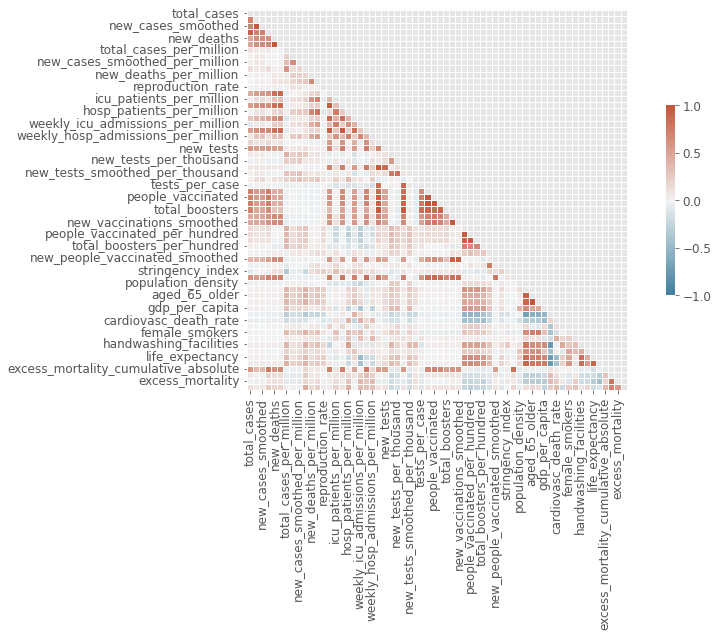

In [42]:
mask = np.triu(np.ones_like(cor_mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor_mat, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Check Duplication

In [43]:
df_filled.duplicated().sum()

0

# Exploratory Data Analysis

Create helper functions to visualize datasets

In [44]:
from matplotlib.ticker import FuncFormatter

# helper functions to format y-axis
def billion(x, pos):
    return '%1.1fB' % (x * 1e-9)

format_bill = FuncFormatter(billion)


def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
    return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)


# barplot helper function
def plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create a figure and axis
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot bar chart 
    sns.barplot(
        data=data,
        x=x, y=y, 
        hue=hue, ci=ci, color=color, 
        hue_order=hue_order, order=order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_bar


# line chart helper function
def plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create a figure and axis 
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        hue=hue, size=size, markers=markers, style=style, ci=ci,
        hue_order=hue_order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line


# helper function to get specific date range
def get_data(data, before=None, after=None, rule=None):
    return data.set_index('date').sort_index(ascending=True, axis='index').truncate(before, after).resample(rule)

# helper function to plot line chart
def plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot line
    sns.lineplot(
        data=data,
        x=x, y=y,
        ci=None, 
        hue=hue, hue_order=hue_order, palette=palette,
        ax=ax
    )

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_date_rng

# Cases Exploration

In [45]:
cases_cols = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million',\
              'new_cases_per_million', 'new_cases_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_cases = df_filled[cases_cols] 
df_cases.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_cases_per_million  new_cases_per_million  \
0           210.34131                    0.125                  0.125   
1           210.34131                    0.125                  0.000   
2           210.34131                    0.125                  0.000   
3           210.34131                    0.125                  0.000   
4           210.34131                    0.125                  0.000   

   new_cases_smoothed_per_million  year  month_num month_name  day   day_name  
0                          5.2455  2020          2        Feb   24     Monday  
1                          5.2455  2020          2        Feb   25    Tuesday  
2                          5.2455  2020          2        Feb   26  Wednesday  
3                          5.2455  2020          2        Feb   27   Thursday  
4                          5.2455  2020          2        Feb   28     Friday

In [46]:
df_cases.drop(columns=['year', 'month_num', 'day', 'day_name']).describe()

total_cases    new_cases  new_cases_smoothed  total_cases_per_million  \
count  2.14847e+05  2.14847e+05         2.14847e+05             213875.00000   
mean   4.25251e+06  1.23109e+04         1.23431e+04              57820.50079   
std    2.67583e+07  8.53288e+04         8.32856e+04             103051.39390   
min    1.00000e+00  0.00000e+00         0.00000e+00                  0.00100   
25%    3.83700e+03  0.00000e+00         6.14300e+00               1001.49200   
50%    4.55730e+04  5.50000e+01         9.41430e+01               9835.37500   
75%    5.01916e+05  9.65000e+02         1.13343e+03              69673.75350   
max    6.19713e+08  4.08173e+06         3.43627e+06             656238.17700   

       new_cases_per_million  new_cases_smoothed_per_million  
count           213875.00000                    213875.00000  
mean               192.87359                       193.17374  
std               1050.97511                       667.38415  
min                  0.00000                         0.00000  
25%                  0.00000                         1.39800  
50%                  8.21100                        20.16900  
75%                100.95700                       140.15700  
max             195005.31300                     36401.60700

In [47]:
df_cases.isna().sum()                                   # check missing values

iso_code                              0
continent                         12738
location                              0
date                                  0
total_cases                        6644
new_cases                          6644
new_cases_smoothed                 6644
total_cases_per_million            7616
new_cases_per_million              7616
new_cases_smoothed_per_million     7616
year                                  0
month_num                             0
month_name                            0
day                                   0
day_name                              0
dtype: int64

<AxesSubplot:>

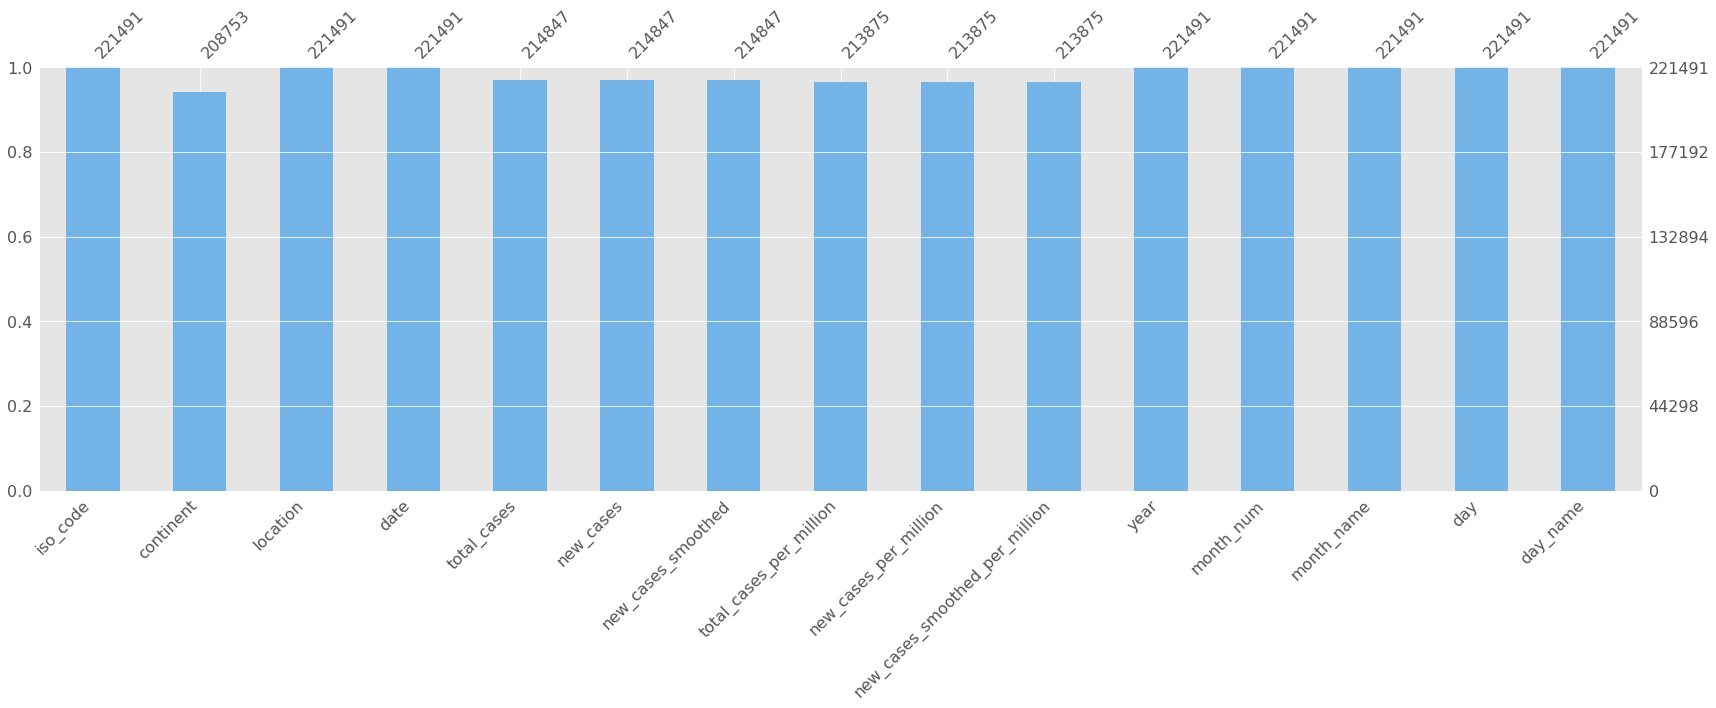

In [48]:
msno.bar(df_cases, labels=True, color=(0.45, 0.70, 0.90))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

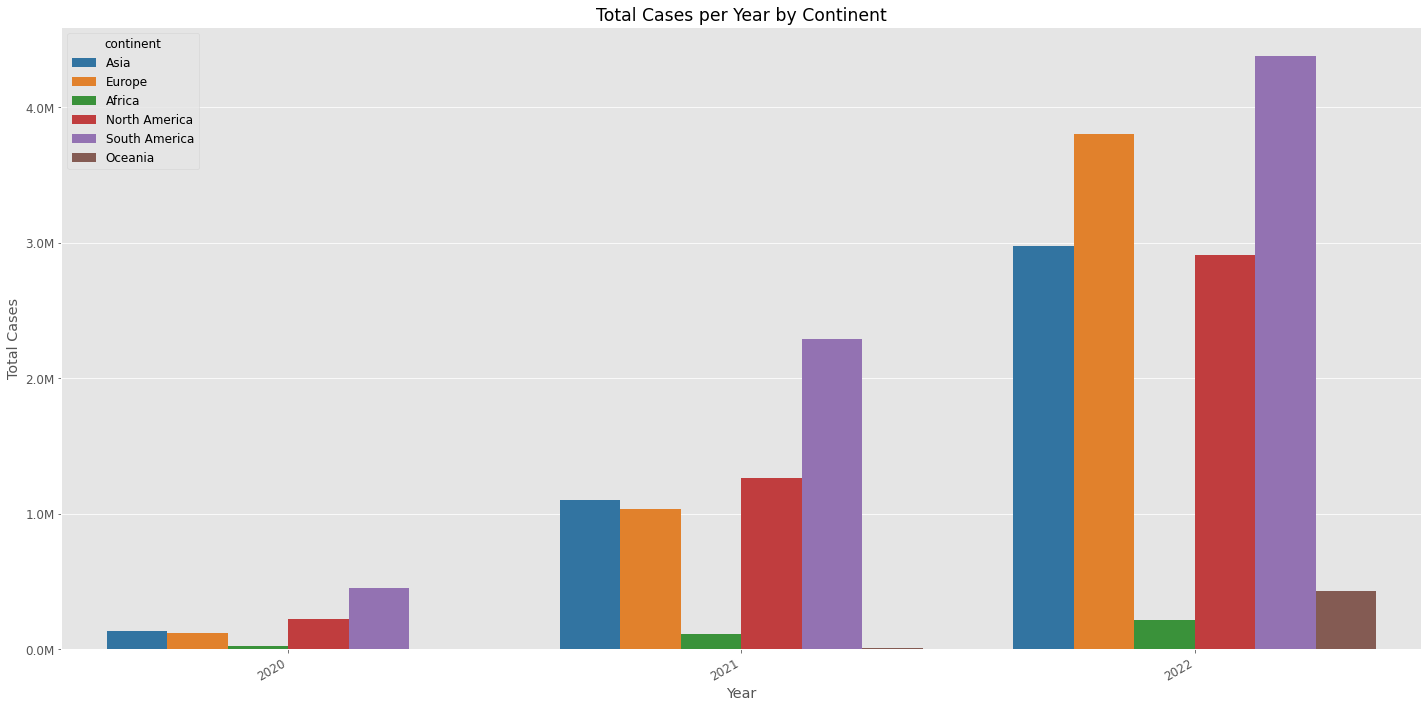

In [49]:
plot_bar(
    data=df_cases,
    x='year', y='total_cases', hue='continent', palette='tab10',
    title='Total Cases per Year by Continent', xlabel='Year', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

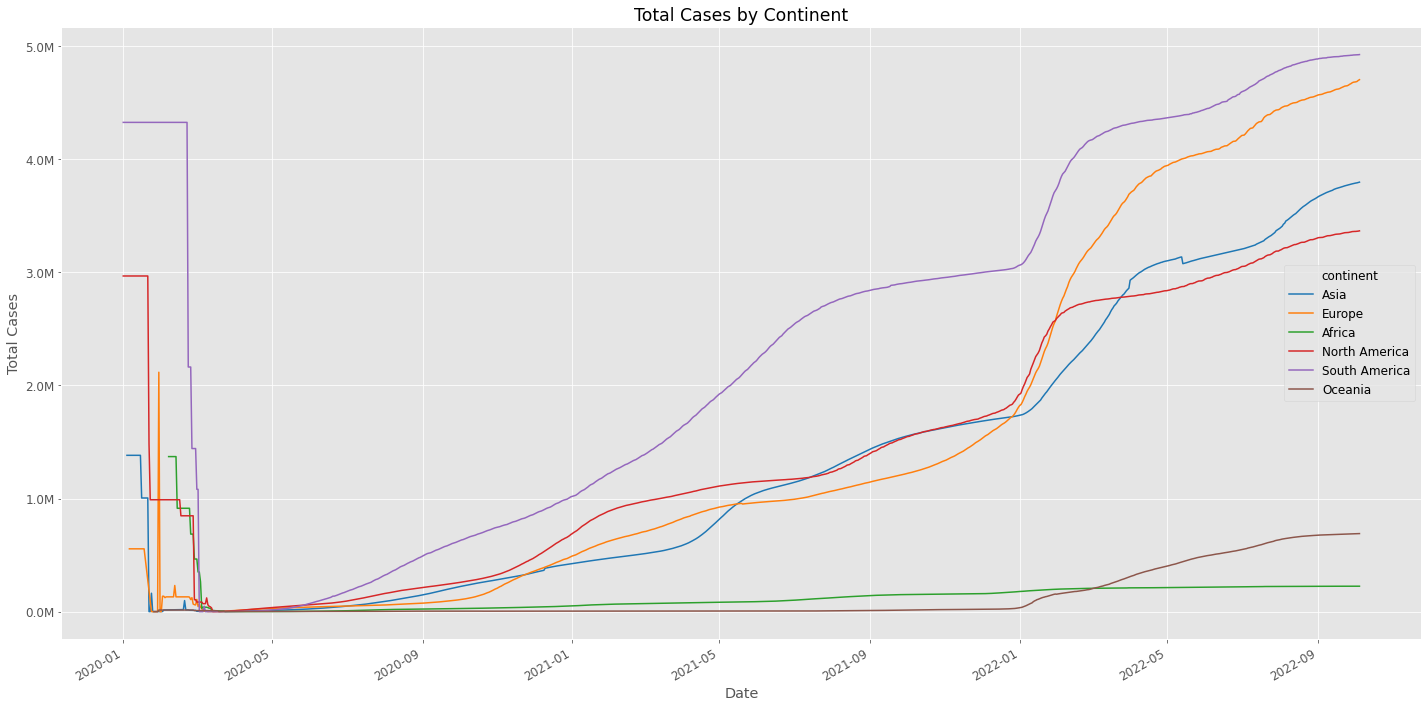

In [50]:
plot_line(
    data=df_cases,
    x='date', y='total_cases', hue='continent', palette='tab10', 
    title='Total Cases by Continent', xlabel='Date', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

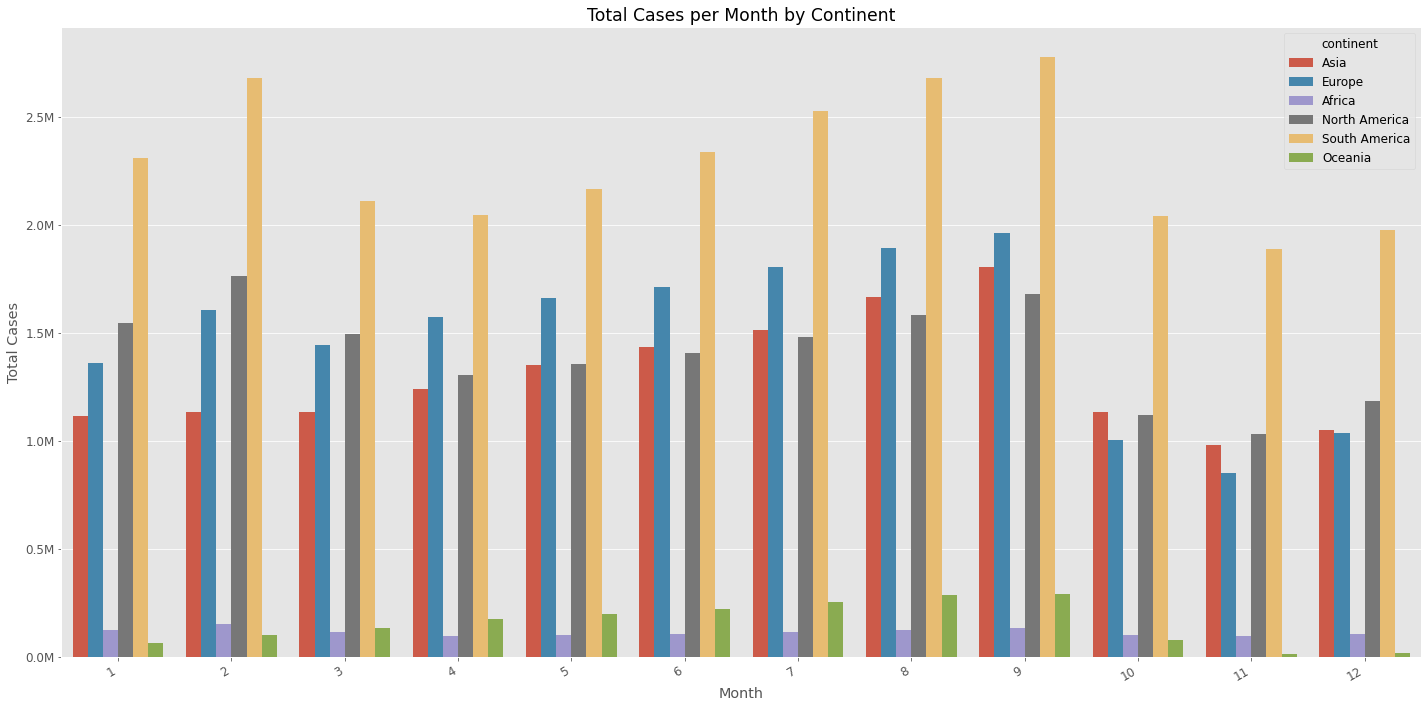

In [51]:
plot_bar(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

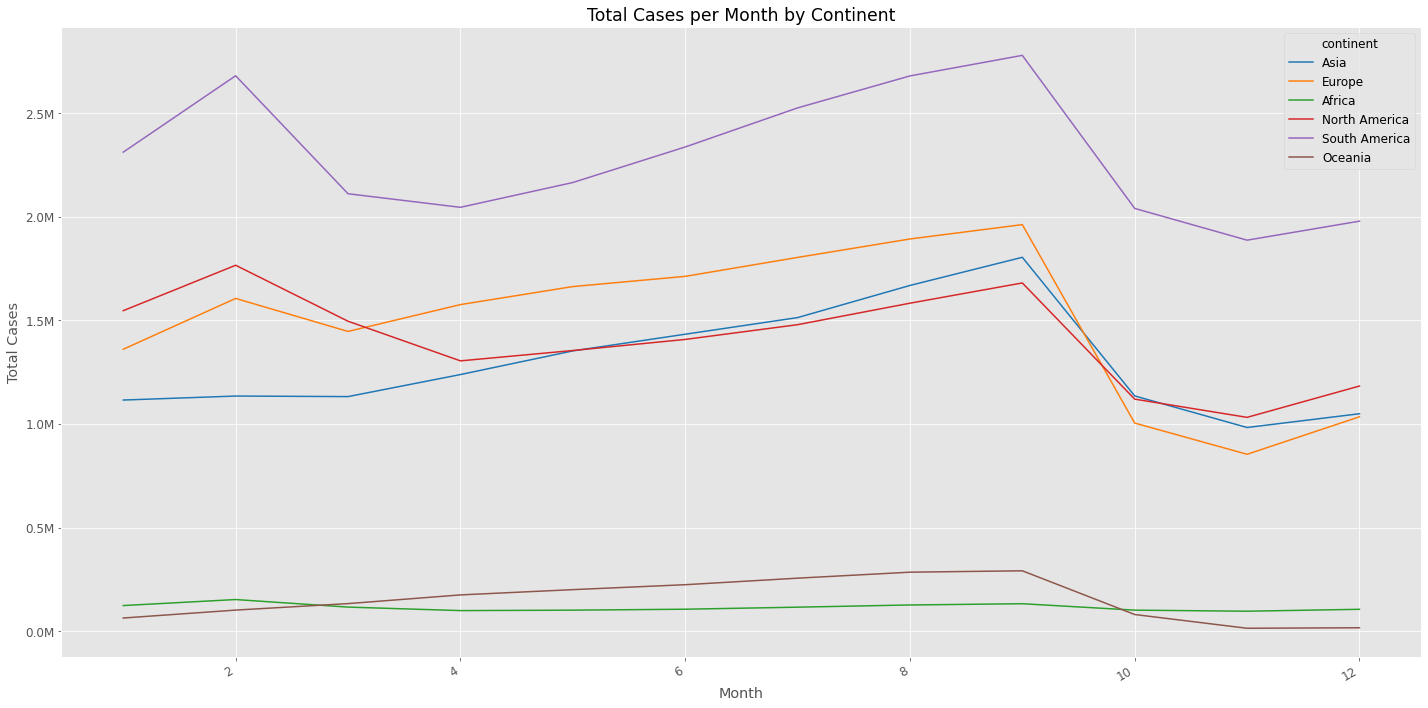

In [52]:
plot_line(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', palette='tab10', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases',
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

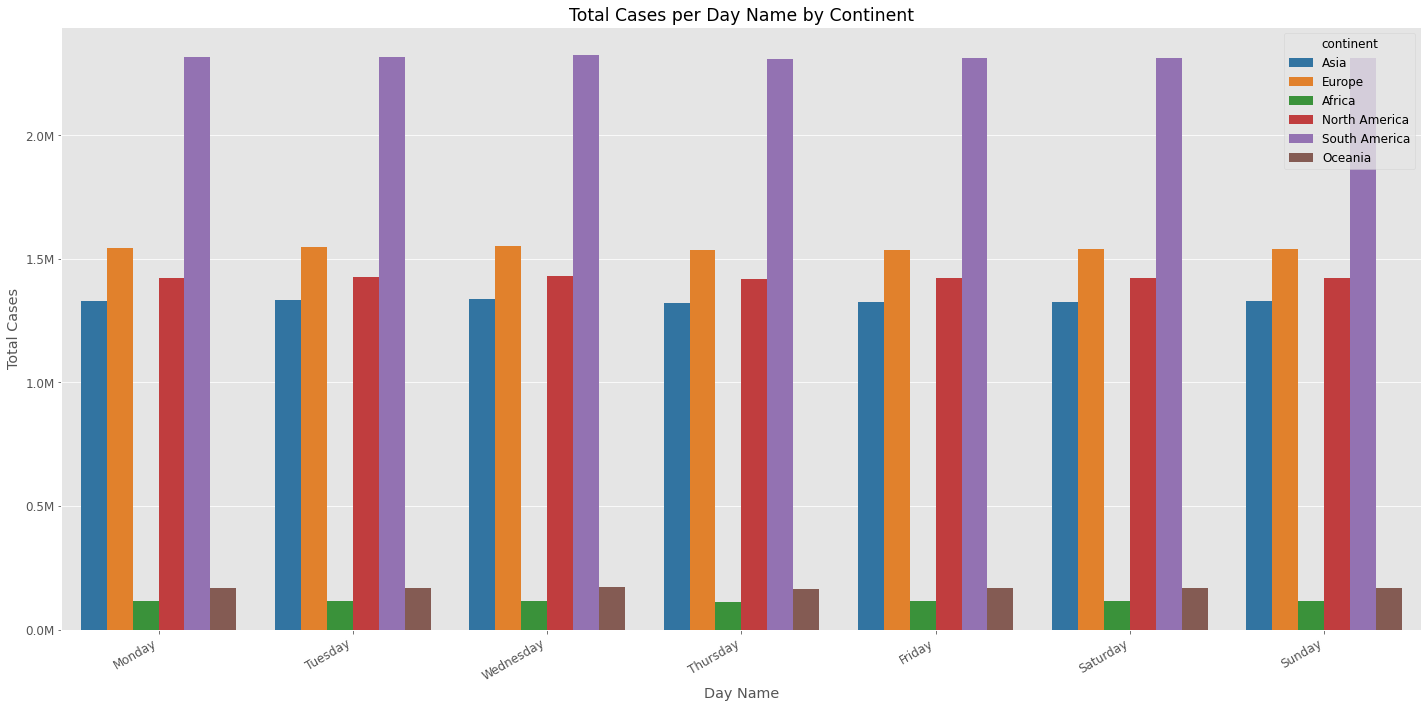

In [53]:
plot_bar(
    data=df_cases,
    x='day_name', y='total_cases', hue='continent', palette='tab10',
    title='Total Cases per Day Name by Continent', xlabel='Day Name', ylabel='Total Cases', 
    formatter=format_mill
)

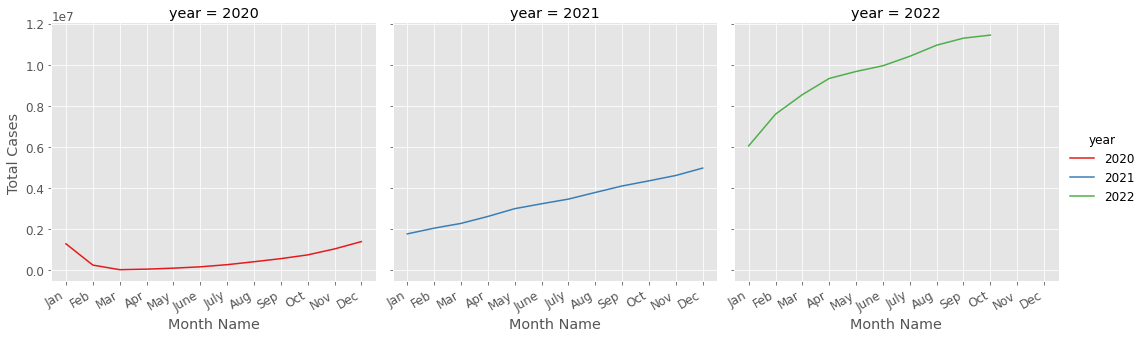

In [54]:
g = sns.relplot(
  data=df_cases,
  x='month_name', y='total_cases', ci=None,
  col='year', hue='year', palette='Set1',
  kind='line'
)

g.set(xlabel='Month Name', ylabel='Total Cases')
g.fig.autofmt_xdate()
ax.yaxis.set_major_formatter(format_mill)

# Deaths Exploration

In [55]:
deaths_cols = ['iso_code', 'continent', 'location', 'date', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 
               'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_deaths = df_filled[deaths_cols]
df_deaths.head()

iso_code continent     location       date  total_deaths  new_deaths  \
0      AFG      Asia  Afghanistan 2020-02-24    4535.59331     8.41855   
1      AFG      Asia  Afghanistan 2020-02-25    4535.59331     8.41855   
2      AFG      Asia  Afghanistan 2020-02-26    4535.59331     8.41855   
3      AFG      Asia  Afghanistan 2020-02-27    4535.59331     8.41855   
4      AFG      Asia  Afghanistan 2020-02-28    4535.59331     8.41855   

   new_deaths_smoothed  total_deaths_per_million  new_deaths_per_million  \
0              8.46033                  113.1086                    0.21   
1              8.46033                  113.1086                    0.21   
2              8.46033                  113.1086                    0.21   
3              8.46033                  113.1086                    0.21   
4              8.46033                  113.1086                    0.21   

   new_deaths_smoothed_per_million  year  month_num month_name  day   day_name  
0                          0.21103  2020          2        Feb   24     Monday  
1                          0.21103  2020          2        Feb   25    Tuesday  
2                          0.21103  2020          2        Feb   26  Wednesday  
3                          0.21103  2020          2        Feb   27   Thursday  
4                          0.21103  2020          2        Feb   28     Friday

In [56]:
df_deaths[['total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']].describe()

total_deaths    new_deaths  new_deaths_smoothed  \
count   2.11702e+05  211702.00000         211702.00000   
mean    6.76038e+04     129.62219            130.17705   
std     3.60323e+05     705.69928            691.02919   
min     1.00000e+00       0.00000              0.00000   
25%     8.50000e+01       0.00000              0.04313   
50%     8.60000e+02       1.00000              1.28600   
75%     8.52600e+03      12.00000             14.00000   
max     6.55210e+06   17737.00000          14858.14300   

       total_deaths_per_million  new_deaths_per_million  \
count              210730.00000            210730.00000   
mean                  658.04724                 1.43738   
std                   938.38724                 4.92581   
min                     0.00000                 0.00000   
25%                    31.23300                 0.00000   
50%                   205.53300                 0.08900   
75%                   974.94164                 1.17600   
max                  6425.12100               553.80300   

       new_deaths_smoothed_per_million  
count                     210730.00000  
mean                           1.43406  
std                            3.24453  
min                            0.00000  
25%                            0.00700  
50%                            0.25000  
75%                            1.49000  
max                          148.67300

In [57]:
df_deaths.isna().sum()                                   # check missing values

iso_code                               0
continent                          12738
location                               0
date                                   0
total_deaths                        9789
new_deaths                          9789
new_deaths_smoothed                 9789
total_deaths_per_million           10761
new_deaths_per_million             10761
new_deaths_smoothed_per_million    10761
year                                   0
month_num                              0
month_name                             0
day                                    0
day_name                               0
dtype: int64

<AxesSubplot:>

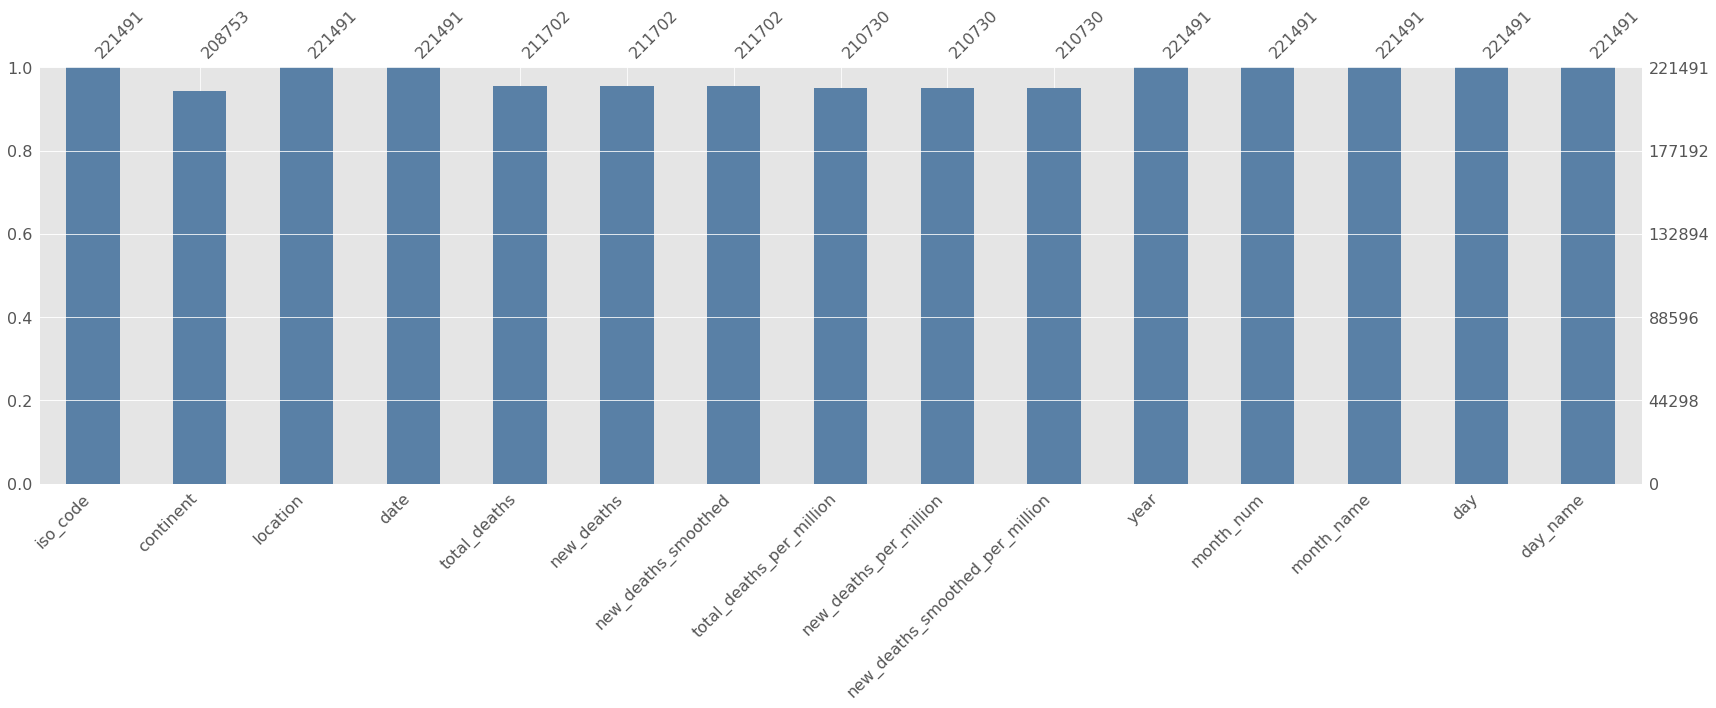

In [58]:
msno.bar(df_deaths, labels=True, color=(0.35, 0.50, 0.65))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

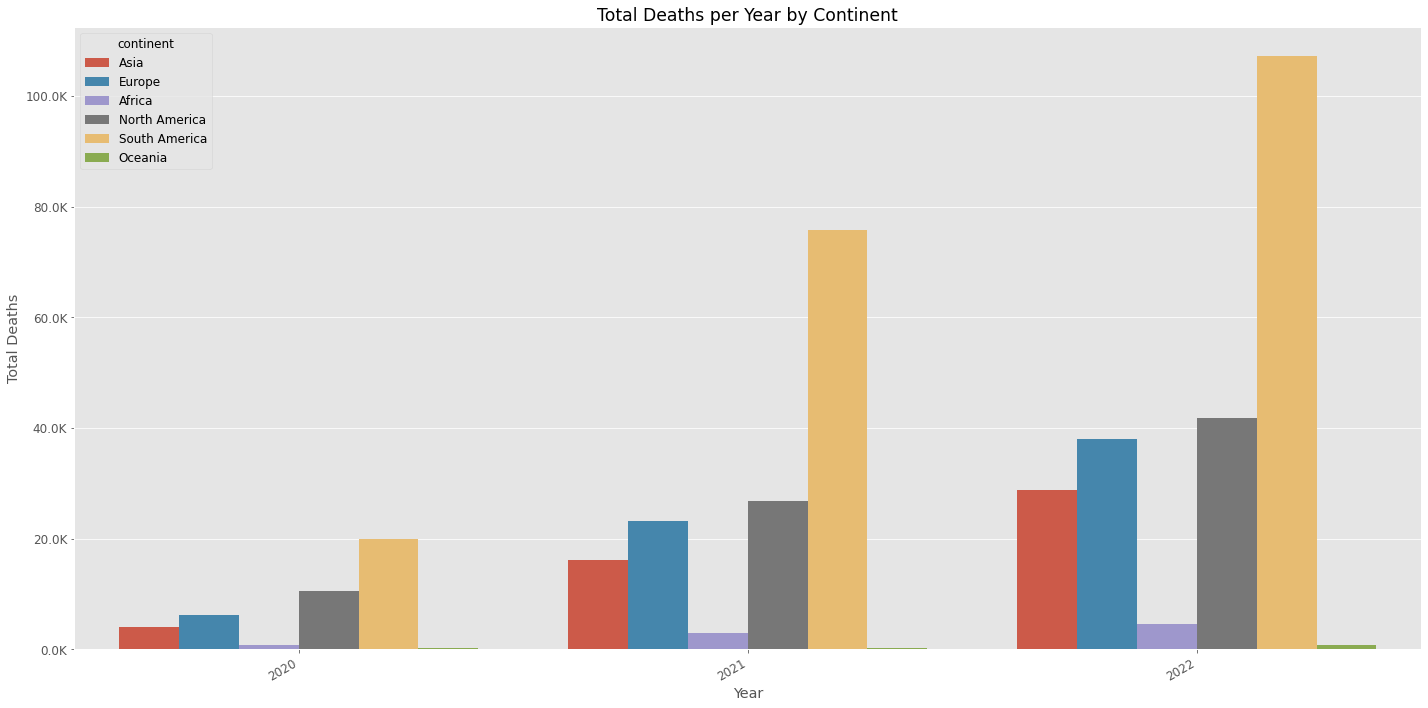

In [59]:
plot_bar(
    data=df_deaths,
    x='year', y='total_deaths', hue='continent', 
    title='Total Deaths per Year by Continent', xlabel='Year', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

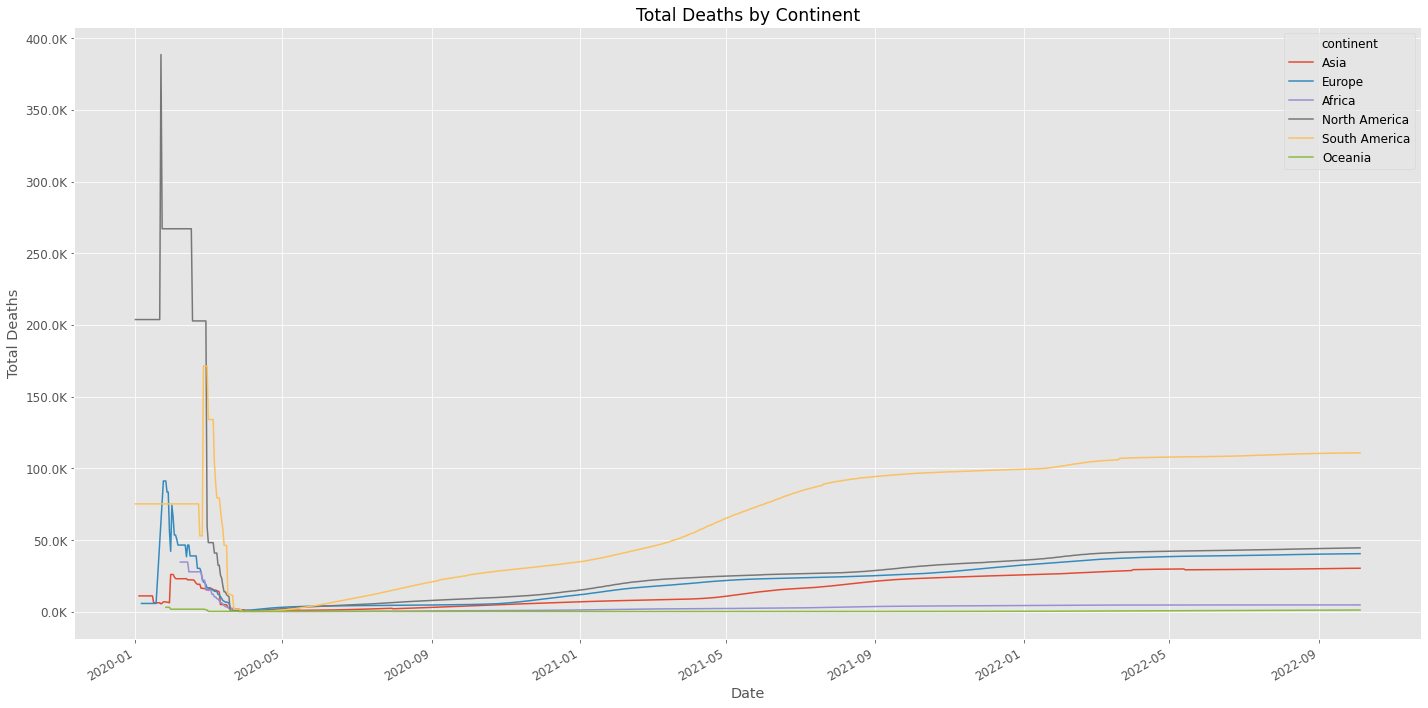

In [60]:
plot_line(
    data=df_deaths,
    x='date', y='total_deaths', hue='continent', 
    title='Total Deaths by Continent', xlabel='Date', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

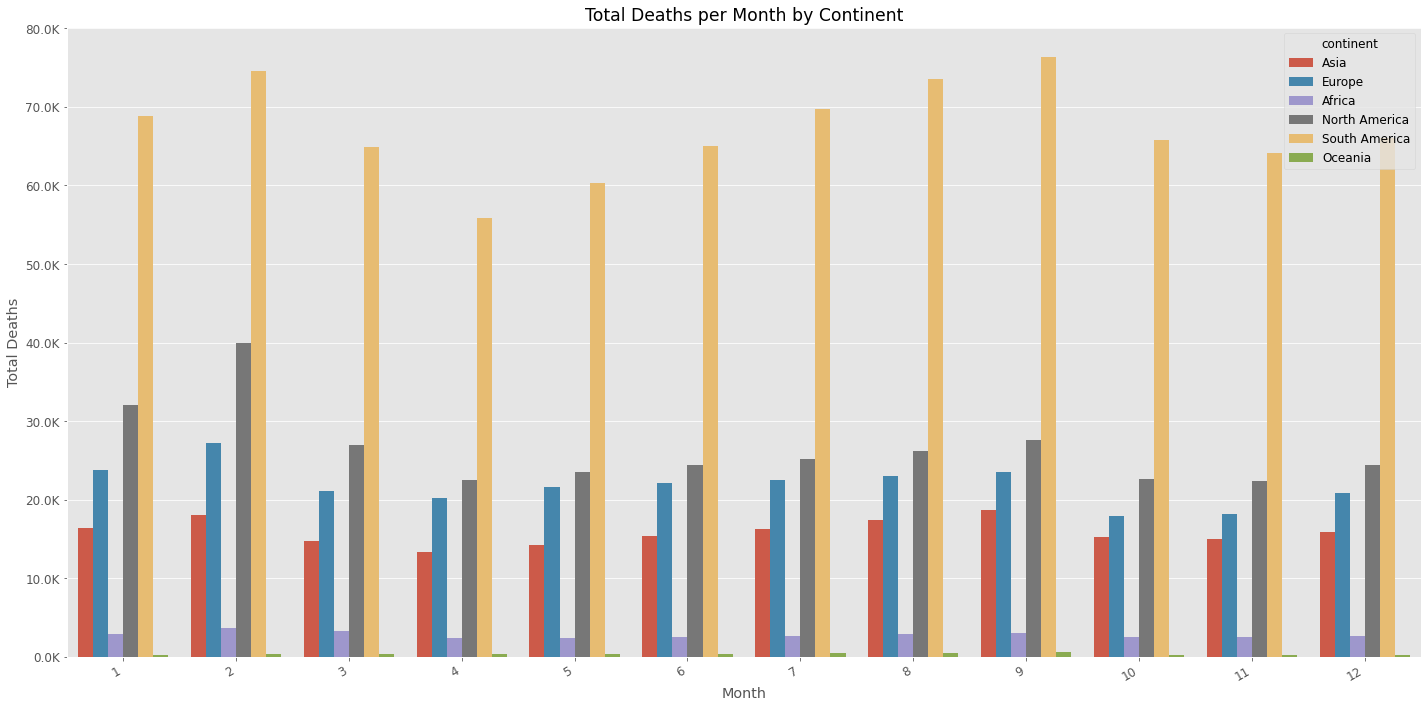

In [61]:
plot_bar(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

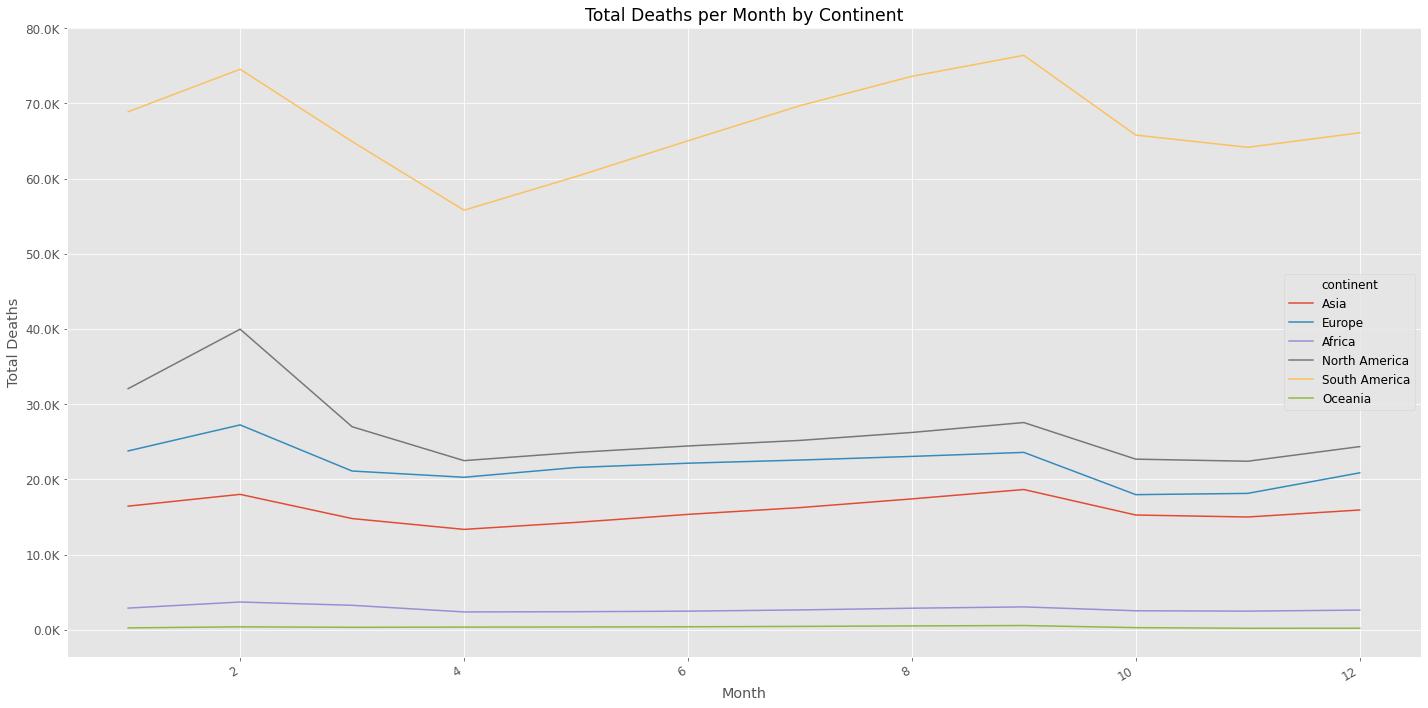

In [62]:
plot_line(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

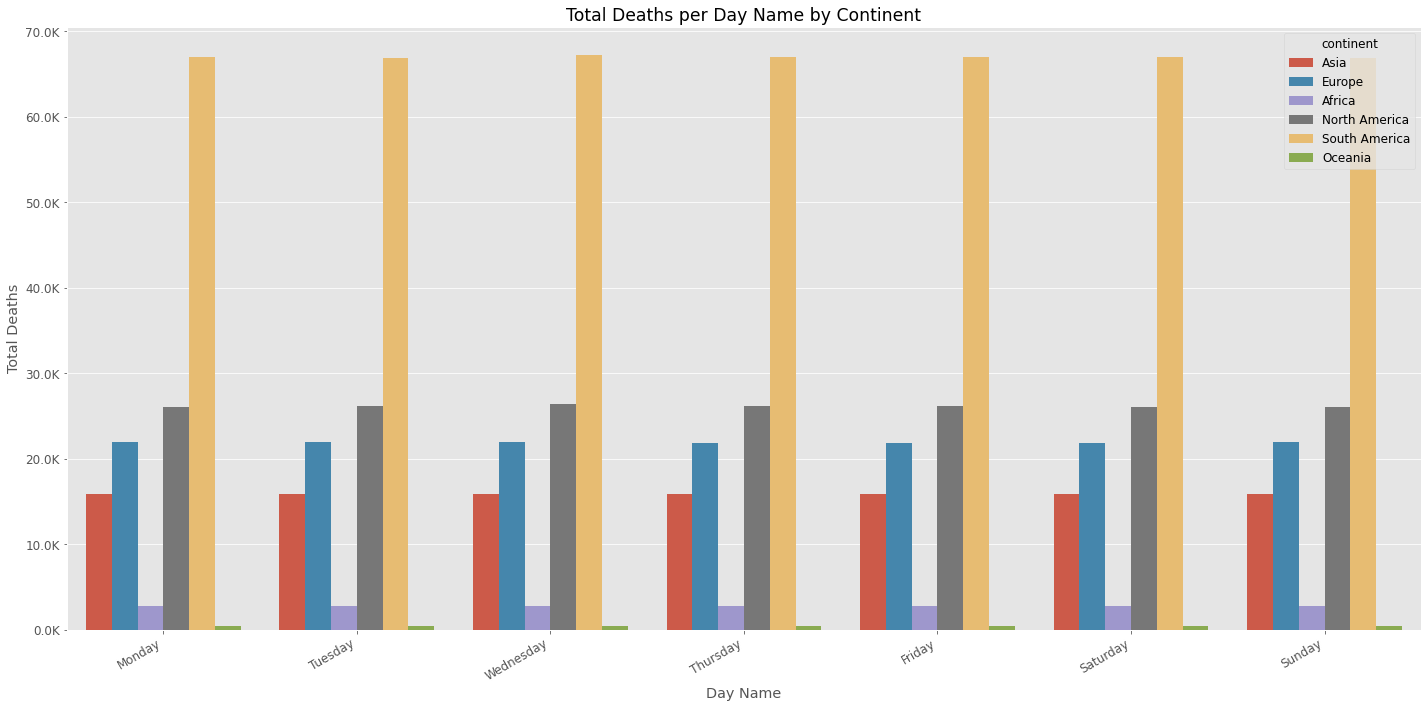

In [63]:
plot_bar(
    data=df_deaths,
    x='day_name', y='total_deaths', hue='continent', 
    title='Total Deaths per Day Name by Continent', xlabel='Day Name', ylabel='Total Deaths', 
    formatter=format_tsd
)

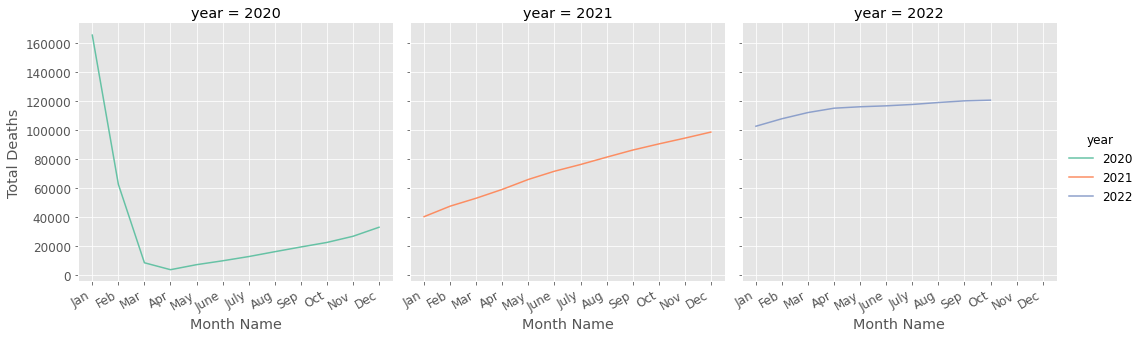

In [64]:
g1 = sns.relplot(
  data=df_deaths,
  x='month_name', y='total_deaths', ci=None, 
  col='year', hue='year', palette='Set2',
  kind='line'
)

g1.set(xlabel='Month Name', ylabel='Total Deaths')
g1.fig.autofmt_xdate()

# Tests Exploration

In [65]:
test_cols = ['iso_code', 'continent', 'location', 'date', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 
             'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'year', 'month_num', 
             'month_name', 'day', 'day_name']

df_test = df_filled[test_cols]
df_test.head()

iso_code continent     location       date  new_tests  total_tests  \
0      AFG      Asia  Afghanistan 2020-02-24        NaN     924645.2   
1      AFG      Asia  Afghanistan 2020-02-25        NaN     924645.2   
2      AFG      Asia  Afghanistan 2020-02-26        NaN     924645.2   
3      AFG      Asia  Afghanistan 2020-02-27        NaN     924645.2   
4      AFG      Asia  Afghanistan 2020-02-28        NaN     924645.2   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.0588                     NaN           983.55396   
1                   23.0588                     NaN           983.55396   
2                   23.0588                     NaN           983.55396   
3                   23.0588                     NaN           983.55396   
4                   23.0588                     NaN           983.55396   

   new_tests_smoothed_per_thousand  positive_rate  tests_per_case tests_units  \
0                          0.02468        0.13004         19.5295         NaN   
1                          0.02468        0.13004         19.5295         NaN   
2                          0.02468        0.13004         19.5295         NaN   
3                          0.02468        0.13004         19.5295         NaN   
4                          0.02468        0.13004         19.5295         NaN   

   year  month_num month_name  day   day_name  
0  2020          2        Feb   24     Monday  
1  2020          2        Feb   25    Tuesday  
2  2020          2        Feb   26  Wednesday  
3  2020          2        Feb   27   Thursday  
4  2020          2        Feb   28     Friday

In [66]:
df_test[['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
         'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units']].describe()

new_tests  total_tests  total_tests_per_thousand  \
count  1.46423e+05  1.75669e+05              175669.00000   
mean   4.74580e+04  3.06720e+07                 851.15889   
std    1.90494e+05  2.42236e+08                2176.45250   
min    1.00000e+00  0.00000e+00                   0.00000   
25%    1.01711e+03  1.99577e+05                  36.73350   
50%    4.89800e+03  9.24770e+05                 186.15600   
75%    2.34000e+04  5.47528e+06                 740.39750   
max    3.58556e+07  9.21400e+09               32925.82600   

       new_tests_per_thousand  new_tests_smoothed  \
count            146423.00000         1.72001e+05   
mean                  3.63287         1.22574e+05   
std                   9.08381         1.08016e+06   
min                   0.00000         0.00000e+00   
25%                   0.27900         6.39000e+02   
50%                   0.95800         3.50060e+03   
75%                   3.03329         2.21890e+04   
max                 531.06200         1.47700e+07   

       new_tests_smoothed_per_thousand  positive_rate  tests_per_case  
count                     172001.00000   165384.00000     1.64449e+05  
mean                           2.92275        0.09442     2.17358e+03  
std                            7.12797        0.10290     2.94640e+04  
min                            0.00000        0.00000     1.00000e+00  
25%                            0.15839        0.01964     1.05000e+01  
50%                            0.78700        0.06550     2.81000e+01  
75%                            2.65700        0.12900     8.33000e+01  
max                          147.60300        1.00000     1.02363e+06

In [67]:
df_test.isna().sum()                                   # check missing values

iso_code                                0
continent                           12738
location                                0
date                                    0
new_tests                           75068
total_tests                         45822
total_tests_per_thousand            45822
new_tests_per_thousand              75068
new_tests_smoothed                  49490
new_tests_smoothed_per_thousand     49490
positive_rate                       56107
tests_per_case                      57042
tests_units                        114703
year                                    0
month_num                               0
month_name                              0
day                                     0
day_name                                0
dtype: int64

<AxesSubplot:>

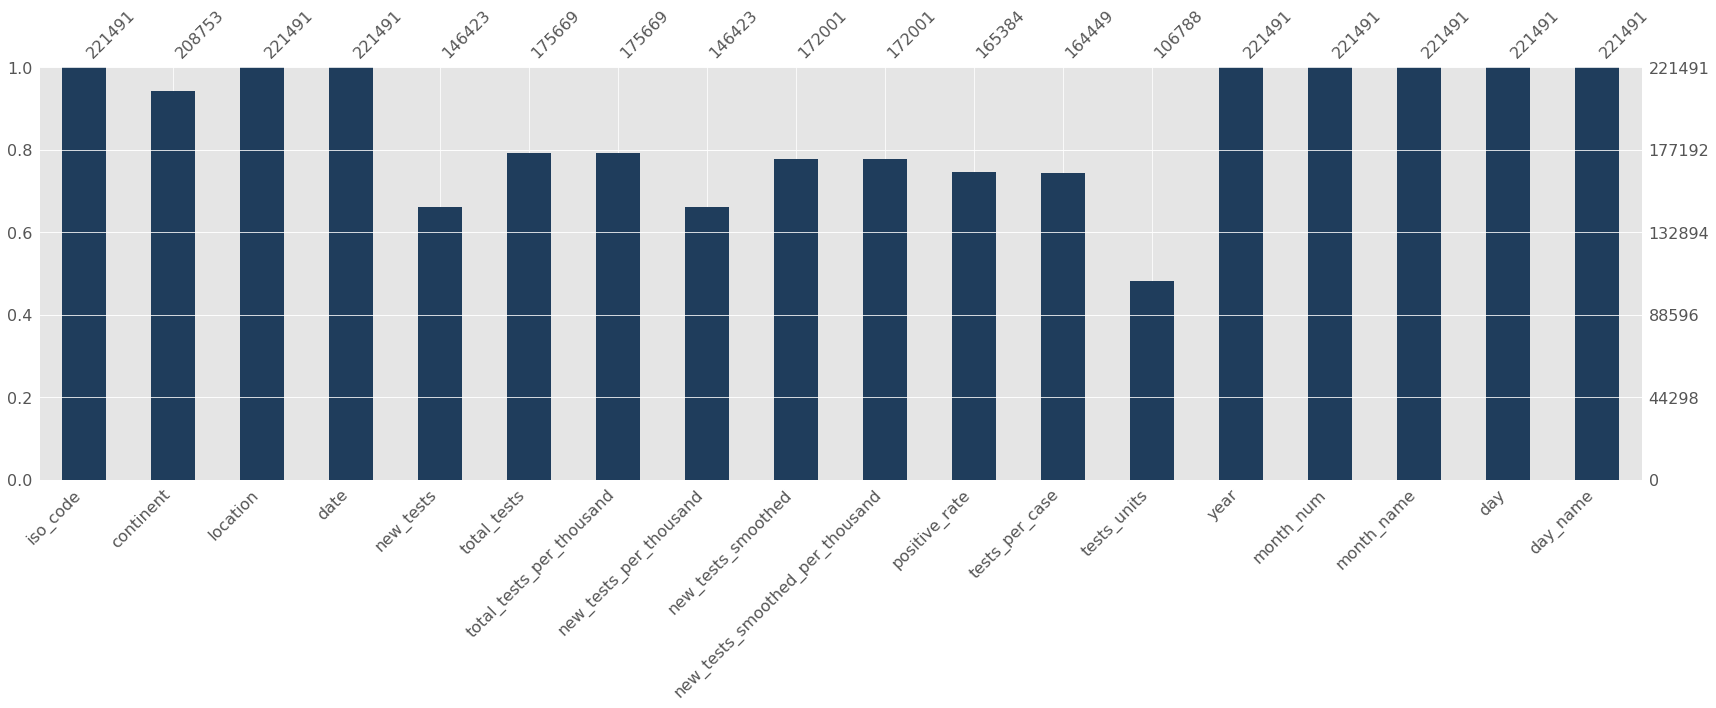

In [68]:
msno.bar(df_test, labels=True, color=(0.12, 0.24, 0.36))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

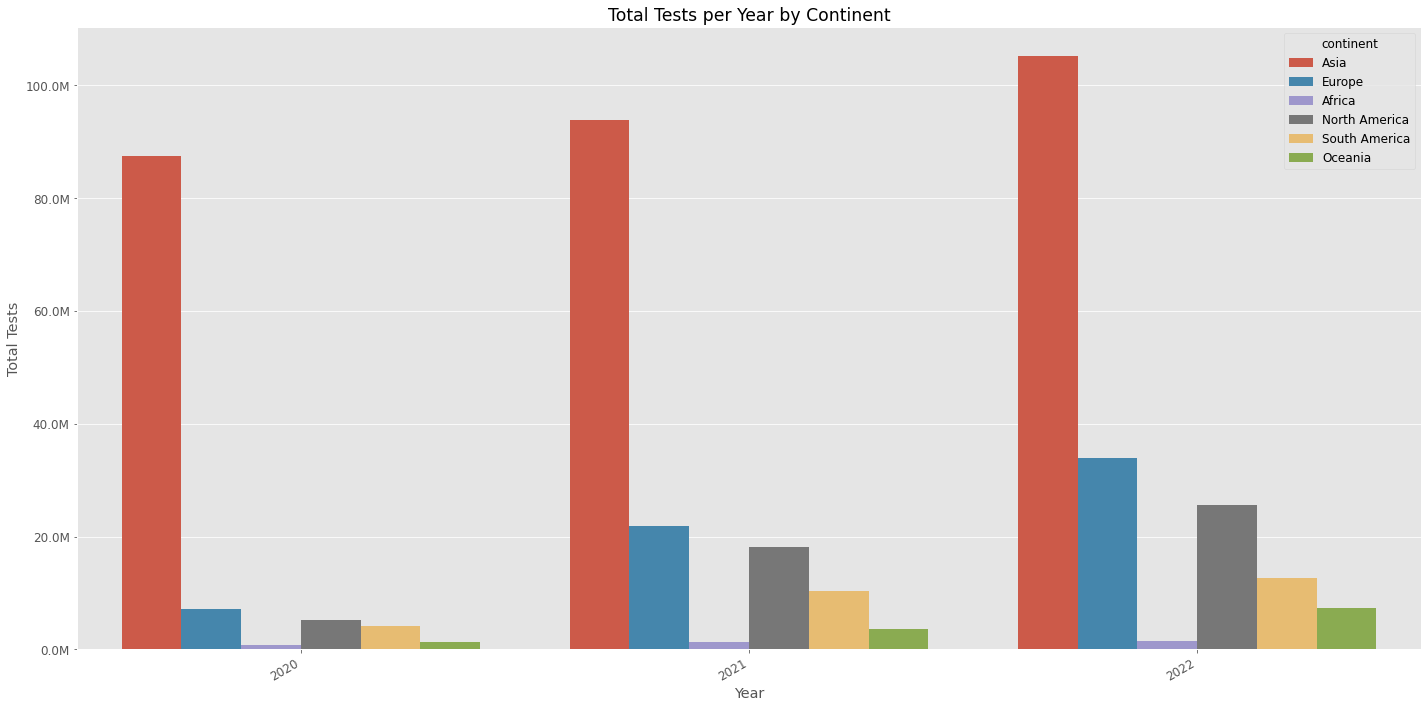

In [69]:
plot_bar(
    data=df_test,
    x='year', y='total_tests', hue='continent', 
    title='Total Tests per Year by Continent', xlabel='Year', ylabel='Total Tests', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

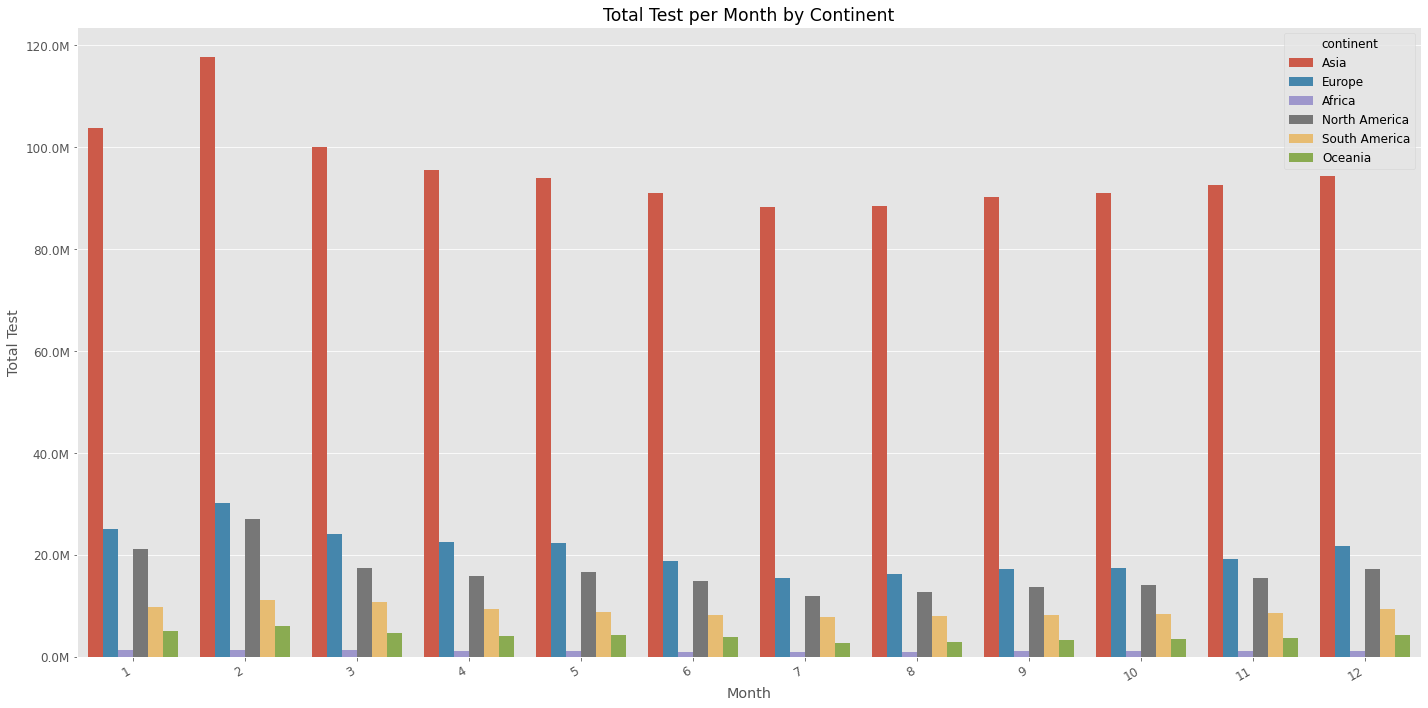

In [70]:
plot_bar(
    data=df_test,
    x='month_num', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

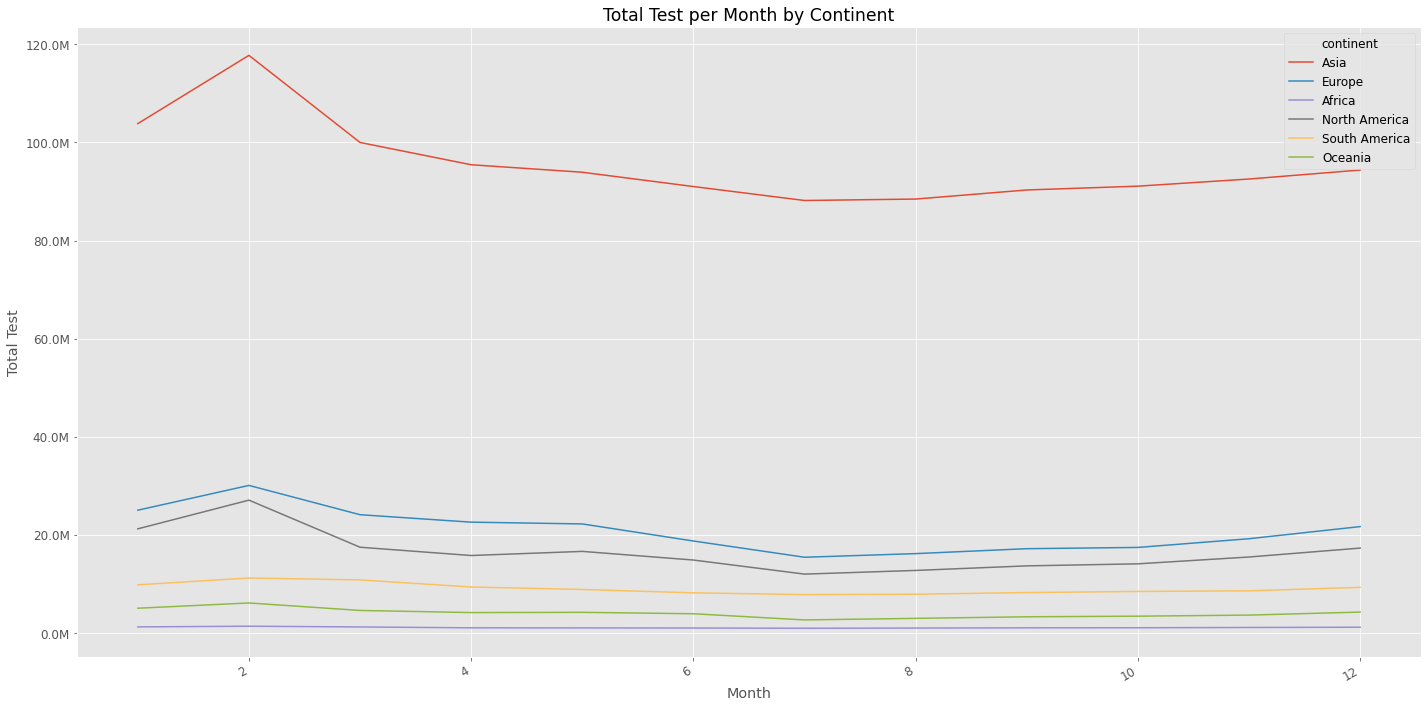

In [71]:
plot_line(
    data=df_test,
    x='month_num', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

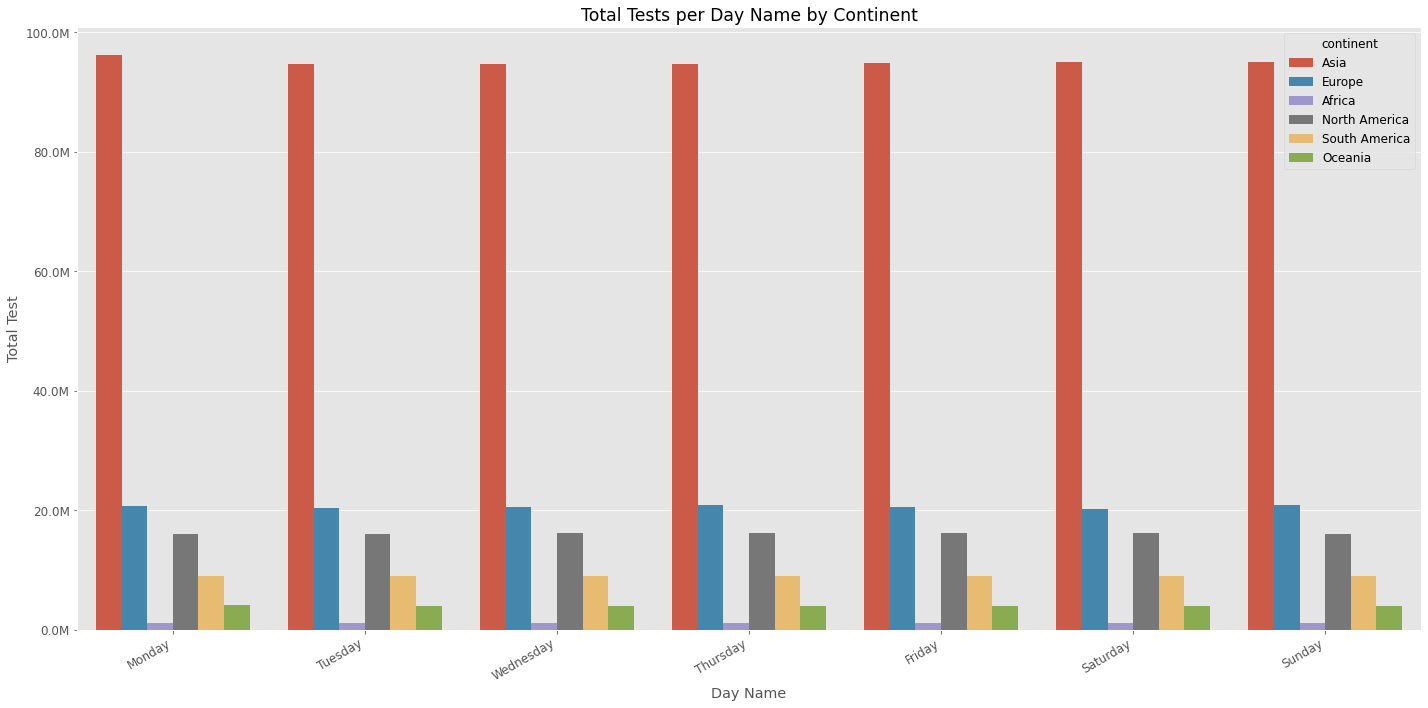

In [72]:
plot_bar(
    data=df_test,
    x='day_name', y='total_tests', hue='continent', 
    title='Total Tests per Day Name by Continent', xlabel='Day Name', ylabel='Total Test', 
    formatter=format_mill
)

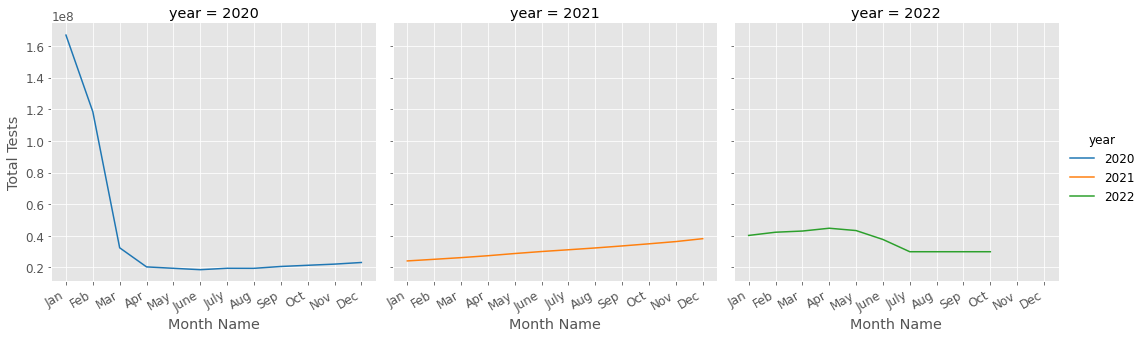

In [73]:
g2 = sns.relplot(
  data=df_test,
  x='month_name', y='total_tests', ci=None,
  col='year', hue='year', palette='tab10',
  kind='line'
)

g2.set(xlabel='Month Name', ylabel='Total Tests')
g2.fig.autofmt_xdate()

# Vaccinations Exploration

In [74]:
vacc_cols = ['iso_code', 'continent', 'location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
             'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
             'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
             'year', 'month_num', 'month_name', 'day', 'day_name']

df_vacc = df_filled[vacc_cols]
df_vacc.head()

iso_code continent     location       date  total_vaccinations  \
0      AFG      Asia  Afghanistan 2020-02-24         4.71264e+06   
1      AFG      Asia  Afghanistan 2020-02-25         4.71264e+06   
2      AFG      Asia  Afghanistan 2020-02-26         4.71264e+06   
3      AFG      Asia  Afghanistan 2020-02-27         4.71264e+06   
4      AFG      Asia  Afghanistan 2020-02-28         4.71264e+06   

   people_vaccinated  people_fully_vaccinated  total_boosters  \
0        4.30599e+06              4.15347e+06             NaN   
1        4.30599e+06              4.15347e+06             NaN   
2        4.30599e+06              4.15347e+06             NaN   
3        4.30599e+06              4.15347e+06             NaN   
4        4.30599e+06              4.15347e+06             NaN   

   new_vaccinations  new_vaccinations_smoothed  \
0            4714.4                20352.80617   
1            4714.4                20352.80617   
2            4714.4                20352.80617   
3            4714.4                20352.80617   
4            4714.4                20352.80617   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                         11.7524                       10.73817   
1                         11.7524                       10.73817   
2                         11.7524                       10.73817   
3                         11.7524                       10.73817   
4                         11.7524                       10.73817   

   people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
0                             10.35797                         NaN   
1                             10.35797                         NaN   
2                             10.35797                         NaN   
3                             10.35797                         NaN   
4                             10.35797                         NaN   

   new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
0                               507.6175                     18723.01029   
1                               507.6175                     18723.01029   
2                               507.6175                     18723.01029   
3                               507.6175                     18723.01029   
4                               507.6175                     18723.01029   

   new_people_vaccinated_smoothed_per_hundred  year  month_num month_name  \
0                                     0.04674  2020          2        Feb   
1                                     0.04674  2020          2        Feb   
2                                     0.04674  2020          2        Feb   
3                                     0.04674  2020          2        Feb   
4                                     0.04674  2020          2        Feb   

   day   day_name  
0   24     Monday  
1   25    Tuesday  
2   26  Wednesday  
3   27   Thursday  
4   28     Friday

In [75]:
df_vacc[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
         'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
         'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred']].describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count         2.11845e+05        2.11845e+05              2.11845e+05   
mean          1.30884e+08        6.32691e+07              5.39724e+07   
std           7.38860e+08        3.44062e+08              2.99491e+08   
min           0.00000e+00        0.00000e+00              1.00000e+00   
25%           3.61522e+05        2.19476e+05              1.75861e+05   
50%           2.44049e+06        1.43545e+06              1.20710e+06   
75%           1.46531e+07        7.73370e+06              6.66170e+06   
max           1.27619e+10        5.38159e+09              4.95314e+09   

       total_boosters  new_vaccinations  new_vaccinations_smoothed  \
count     1.91553e+05       1.76462e+05                2.11845e+05   
mean      2.16839e+07       4.59820e+05                3.72280e+05   
std       1.18908e+08       2.33678e+06                2.10800e+06   
min       1.00000e+00       0.00000e+00                0.00000e+00   
25%       3.92518e+04       3.03250e+03                9.55743e+02   
50%       4.60787e+05       1.51907e+04                7.91900e+03   
75%       4.31052e+06       8.86289e+04                5.27557e+04   
max       2.54326e+09       4.96751e+07                4.36900e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    211845.00000                   211845.00000   
mean                         78.17137                       38.62271   
std                          60.73503                       25.25997   
min                           0.00000                        0.00000   
25%                          24.12286                       16.00824   
50%                          71.89093                       38.58000   
75%                         116.15451                       57.22000   
max                         373.87000                      128.78000   

       people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
count                         211845.00000                191553.00000   
mean                              33.99882                    20.17565   
std                               23.63394                    20.19663   
min                                0.00000                     0.00000   
25%                               12.73800                     2.63706   
50%                               32.66000                    14.40705   
75%                               50.92703                    32.51656   
max                              126.79000                   139.64000   

       new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
count                           211845.00000                     2.11845e+05   
mean                              2616.23683                     1.41751e+05   
std                               3199.11232                     8.39297e+05   
min                                  0.00000                     0.00000e+00   
25%                                583.51687                     3.06684e+02   
50%                               1853.54137                     3.31000e+03   
75%                               3440.00000                     2.11670e+04   
max                             117862.00000                     2.10708e+07   

       new_people_vaccinated_smoothed_per_hundred  
count                                211845.00000  
mean                                      0.11310  
std                                       0.18525  
min                                       0.00000  
25%                                       0.01900  
50%                                       0.07521  
75%                                       0.13269  
max                                      11.78600

In [76]:
df_vacc.isna().sum()                                   # check missing values

iso_code                                          0
continent                                     12738
location                                          0
date                                              0
total_vaccinations                             9646
people_vaccinated                              9646
people_fully_vaccinated                        9646
total_boosters                                29938
new_vaccinations                              45029
new_vaccinations_smoothed                      9646
total_vaccinations_per_hundred                 9646
people_vaccinated_per_hundred                  9646
people_fully_vaccinated_per_hundred            9646
total_boosters_per_hundred                    29938
new_vaccinations_smoothed_per_million          9646
new_people_vaccinated_smoothed                 9646
new_people_vaccinated_smoothed_per_hundred     9646
year                                              0
month_num                                         0
month_name  

<AxesSubplot:>

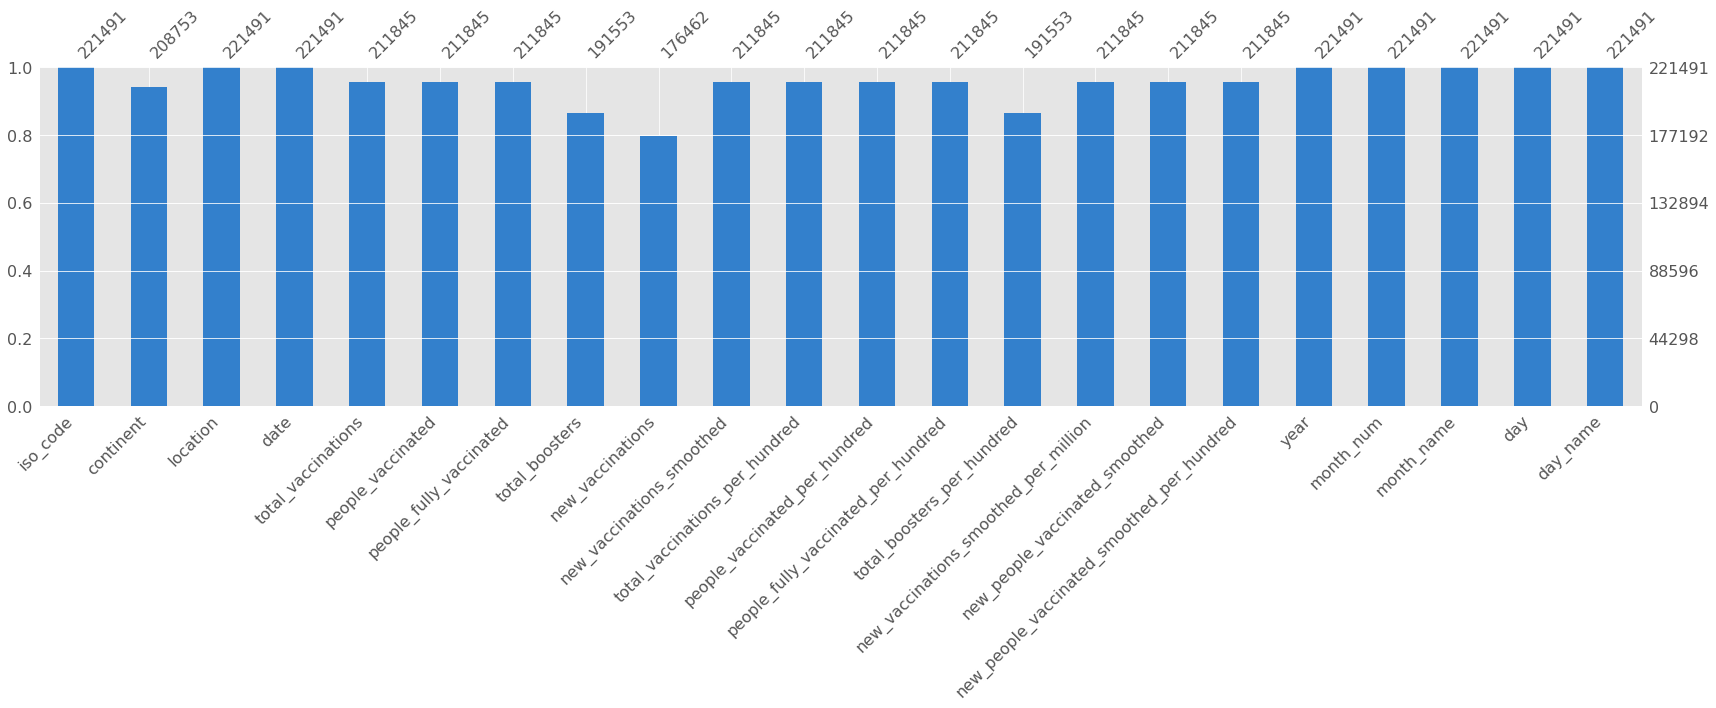

In [77]:
msno.bar(df_vacc, labels=True, color=(0.20, 0.50, 0.80))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

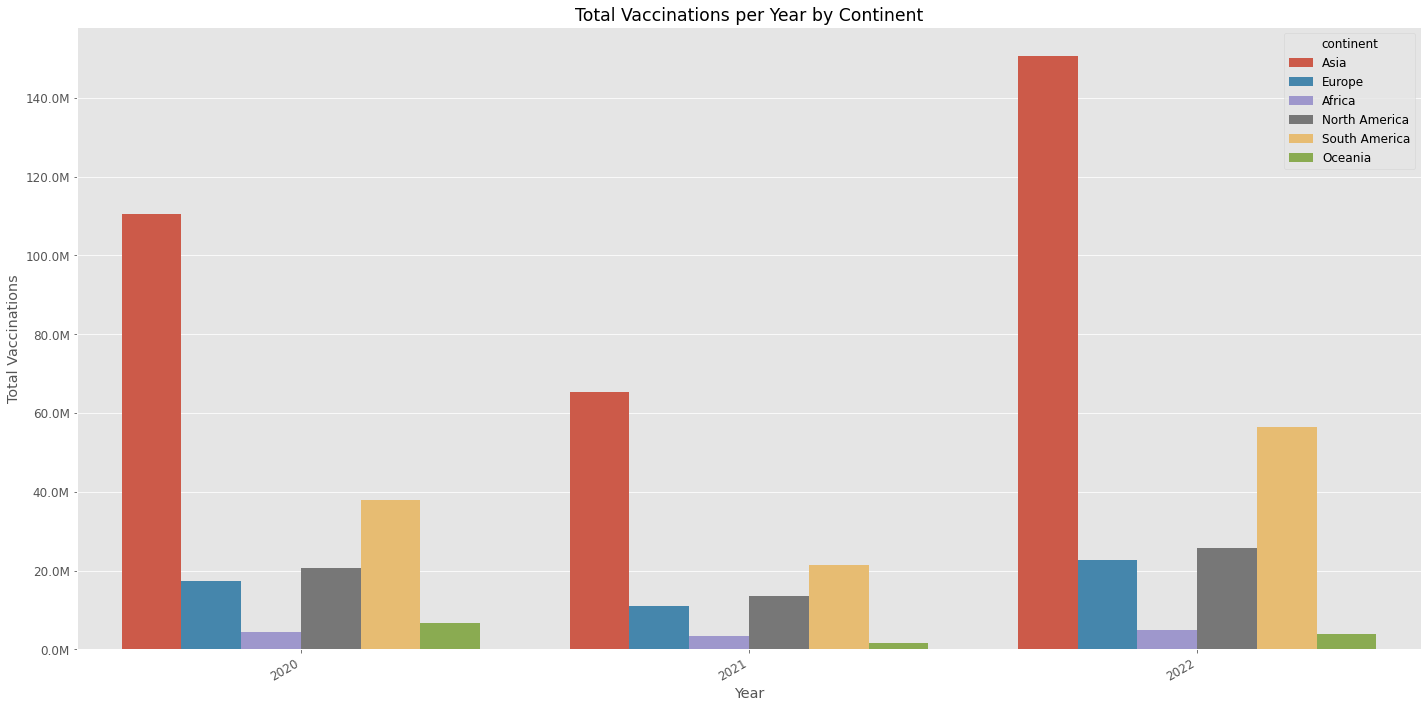

In [78]:
plot_bar(
    data=df_vacc,
    x='year', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Year by Continent', xlabel='Year', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

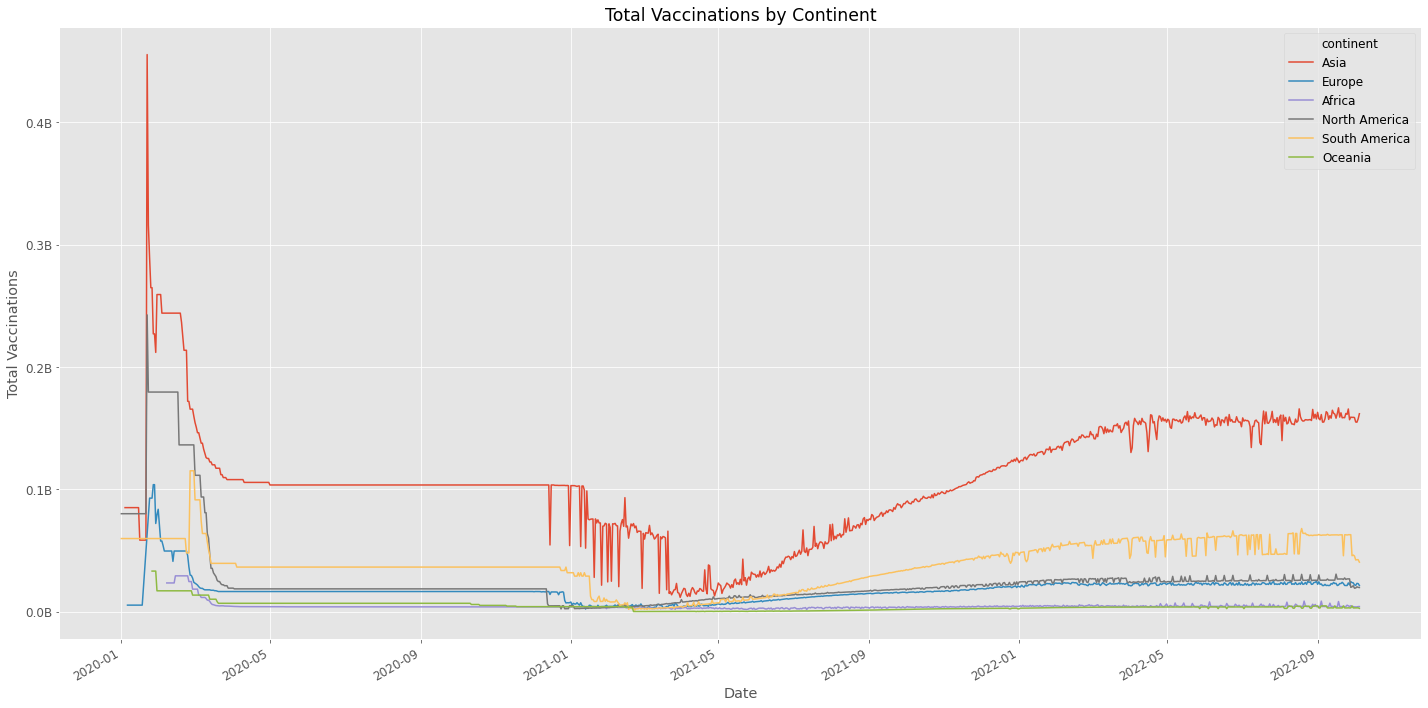

In [79]:
plot_line(
    data=df_vacc,
    x='date', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations by Continent', xlabel='Date', ylabel='Total Vaccinations', 
    formatter=format_bill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

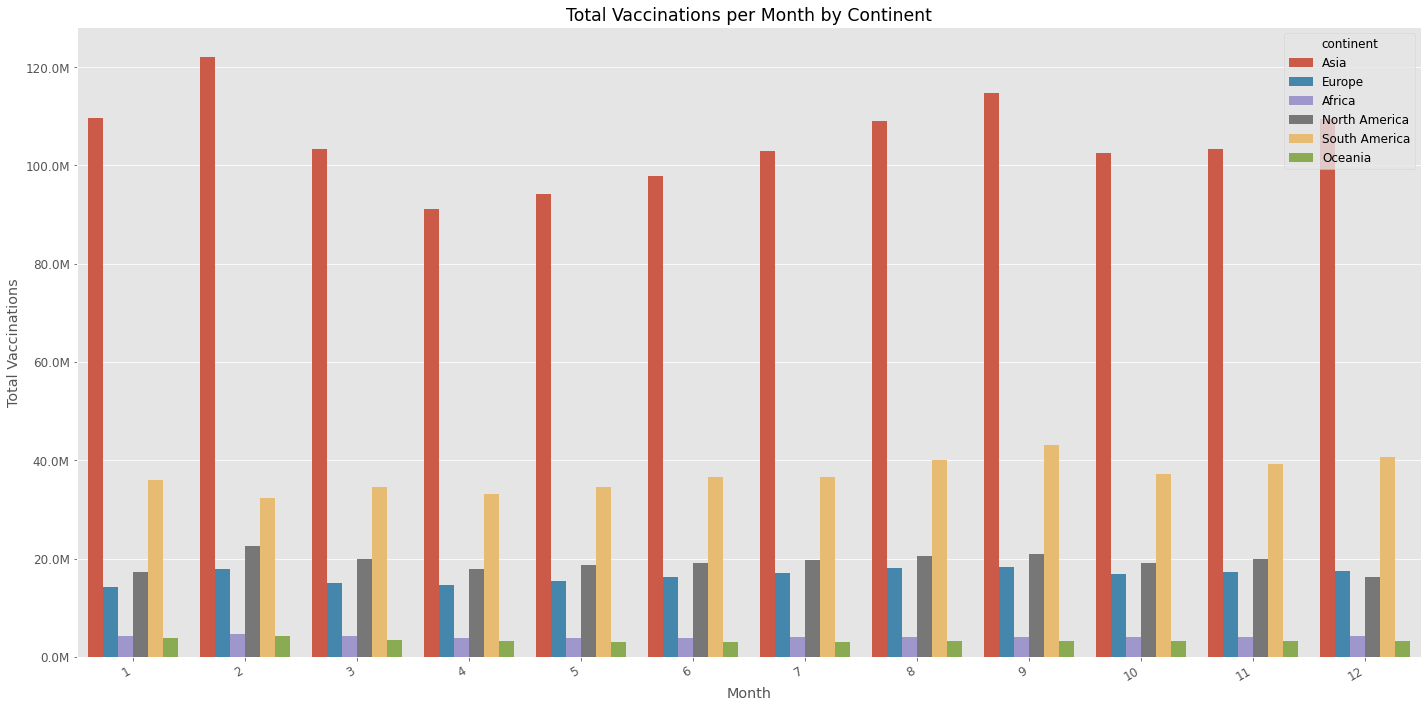

In [80]:
plot_bar(
    data=df_vacc,
    x='month_num', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

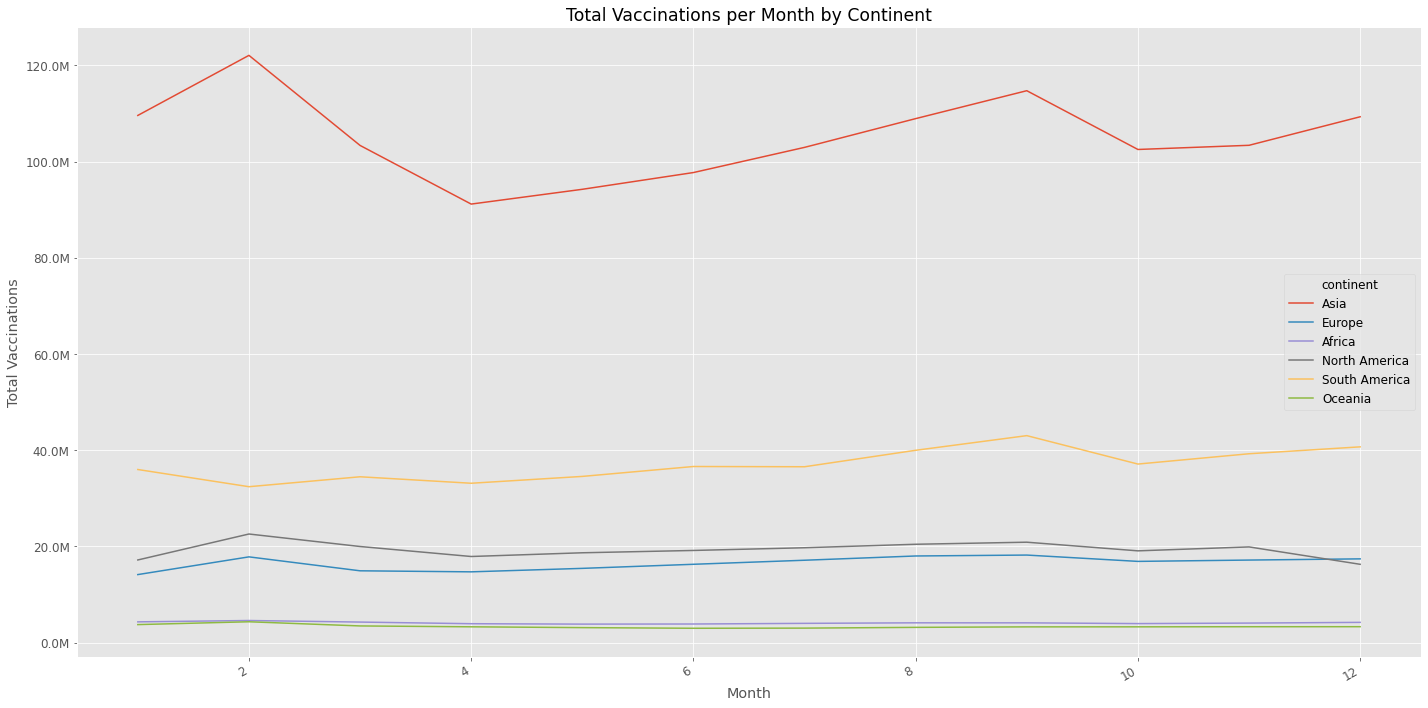

In [81]:
plot_line(
    data=df_vacc,
    x='month_num', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

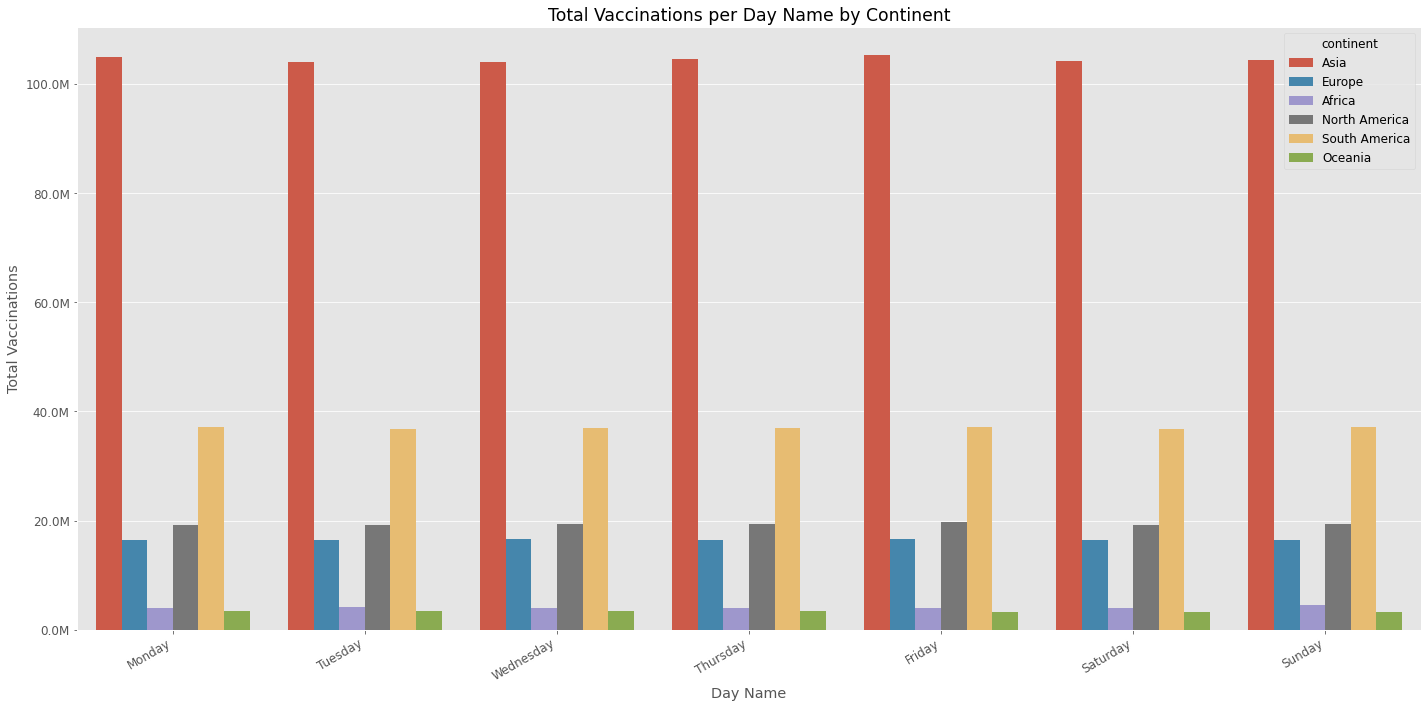

In [82]:
plot_bar(
    data=df_vacc,
    x='day_name', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Day Name by Continent', xlabel='Day Name', ylabel='Total Vaccinations', 
    formatter=format_mill
)

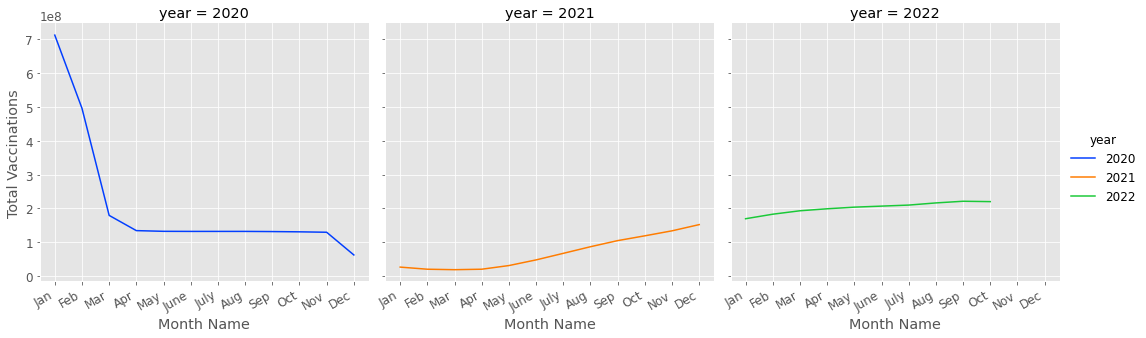

In [83]:
g3 = sns.relplot(
  data=df_vacc,
  x='month_name', y='total_vaccinations', ci=None,
  col='year', hue='year', palette='bright',
  kind='line'
)

g3.set(xlabel='Month Name', ylabel='Total Vaccinations')
g3.fig.autofmt_xdate()

# Demographics Exploration

In [84]:
demo_cols = ['iso_code', 'continent', 'location', 'date', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 
             'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 
             'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index','excess_mortality_cumulative_absolute', 
             'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million', 'year', 'month_num', 'month_name', 
             'day', 'day_name']

df_demo = df_filled[demo_cols]
df_demo.head()

iso_code continent     location       date  population  population_density  \
0      AFG      Asia  Afghanistan 2020-02-24  40099462.0              54.422   
1      AFG      Asia  Afghanistan 2020-02-25  40099462.0              54.422   
2      AFG      Asia  Afghanistan 2020-02-26  40099462.0              54.422   
3      AFG      Asia  Afghanistan 2020-02-27  40099462.0              54.422   
4      AFG      Asia  Afghanistan 2020-02-28  40099462.0              54.422   

   median_age  aged_65_older  aged_70_older  gdp_per_capita  extreme_poverty  \
0        18.6          2.581          1.337        1803.987              NaN   
1        18.6          2.581          1.337        1803.987              NaN   
2        18.6          2.581          1.337        1803.987              NaN   
3        18.6          2.581          1.337        1803.987              NaN   
4        18.6          2.581          1.337        1803.987              NaN   

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0                597.029                 9.59             NaN           NaN   
1                597.029                 9.59             NaN           NaN   
2                597.029                 9.59             NaN           NaN   
3                597.029                 9.59             NaN           NaN   
4                597.029                 9.59             NaN           NaN   

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                  37.746                         0.5            64.83   
1                  37.746                         0.5            64.83   
2                  37.746                         0.5            64.83   
3                  37.746                         0.5            64.83   
4                  37.746                         0.5            64.83   

   human_development_index  excess_mortality_cumulative_absolute  \
0                    0.511                                   NaN   
1                    0.511                                   NaN   
2                    0.511                                   NaN   
3                    0.511                                   NaN   
4                    0.511                                   NaN   

   excess_mortality_cumulative  excess_mortality  \
0                          NaN               NaN   
1                          NaN               NaN   
2                          NaN               NaN   
3                          NaN               NaN   
4                          NaN               NaN   

   excess_mortality_cumulative_per_million  year  month_num month_name  day  \
0                                      NaN  2020          2        Feb   24   
1                                      NaN  2020          2        Feb   25   
2                                      NaN  2020          2        Feb   26   
3                                      NaN  2020          2        Feb   27   
4                                      NaN  2020          2        Feb   28   

    day_name  
0     Monday  
1    Tuesday  
2  Wednesday  
3   Thursday  
4     Friday

In [85]:
df_demo[['population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
         'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 
         'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 
         'excess_mortality_cumulative_per_million']].describe()

population  population_density    median_age  aged_65_older  \
count  2.20202e+05        196705.00000  182018.00000   180095.00000   
mean   1.42445e+08           456.93502      30.62172        8.80923   
std    6.94193e+08          2106.32483       9.06592        6.12815   
min    4.70000e+01             0.13700      15.10000        1.14400   
25%    8.21626e+05            37.72800      22.30000        3.52600   
50%    7.42506e+06            88.12500      30.60000        6.70400   
75%    3.35739e+07           214.24300      39.10000       14.17800   
max    7.90930e+09         20546.76600      48.20000       27.04900   

       aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
count   181065.00000    181368.00000     118290.00000           181534.00000   
mean         5.55715     19558.74291         13.63126              261.13225   
std          4.16309     20548.89174         20.03094              119.96494   
min          0.52600       661.24000          0.10000               79.37000   
25%          2.06300      4449.89800          0.60000              170.05000   
50%          4.03200     12951.83900          2.20000              243.96400   
75%          8.67800     27936.89600         21.20000              329.94200   
max         18.49300    116935.60000         77.60000              724.41700   

       diabetes_prevalence  female_smokers  male_smokers  \
count         190843.00000    137530.00000  135647.00000   
mean               8.38643        10.67417      32.80836   
std                4.73307        10.62425      13.53418   
min                0.99000         0.10000       7.70000   
25%                5.31000         1.90000      21.60000   
50%                7.20000         6.30000      31.40000   
75%               10.59000        19.30000      41.30000   
max               30.53000        44.00000      78.10000   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
count             89257.00000                161517.00000     206951.00000   
mean                 50.83768                     3.08442         73.62592   
std                  31.83953                     2.54992          7.44758   
min                   1.18800                     0.10000         53.28000   
25%                  20.85900                     1.30000         69.50000   
50%                  49.83900                     2.50000         75.05000   
75%                  82.50200                     4.20000         79.07000   
max                 100.00000                    13.80000         86.75000   

       human_development_index  excess_mortality_cumulative_absolute  \
count             177038.00000                           1.08685e+05   
mean                   0.72484                           3.52948e+04   
std                    0.14969                           9.92534e+04   
min                    0.39400                          -3.77261e+04   
25%                    0.60200                           8.61182e+01   
50%                    0.74300                           5.90657e+03   
75%                    0.84500                           1.91333e+04   
max                    0.95700                           1.22058e+06   

       excess_mortality_cumulative  excess_mortality  \
count                 108685.00000      108685.00000   
mean                       9.44744          15.89643   
std                       11.68334          13.73759   
min                      -28.45000         -95.92000   
25%                        1.40045           6.54321   
50%                        7.02409          13.08489   
75%                       14.82133          23.64831   
max                       76.55000         376.25000   

       excess_mortality_cumulative_per_million  
count                             108685.00000  
mean                                1089.08464  
std                                 1225.92042  
min                                -1884.67898  
25% 

In [86]:
df_demo.isna().sum()                                   # check missing values

iso_code                                        0
continent                                   12738
location                                        0
date                                            0
population                                   1289
population_density                          24786
median_age                                  39473
aged_65_older                               41396
aged_70_older                               40426
gdp_per_capita                              40123
extreme_poverty                            103201
cardiovasc_death_rate                       39957
diabetes_prevalence                         30648
female_smokers                              83961
male_smokers                                85844
handwashing_facilities                     132234
hospital_beds_per_thousand                  59974
life_expectancy                             14540
human_development_index                     44453
excess_mortality_cumulative_absolute       112806


<AxesSubplot:>

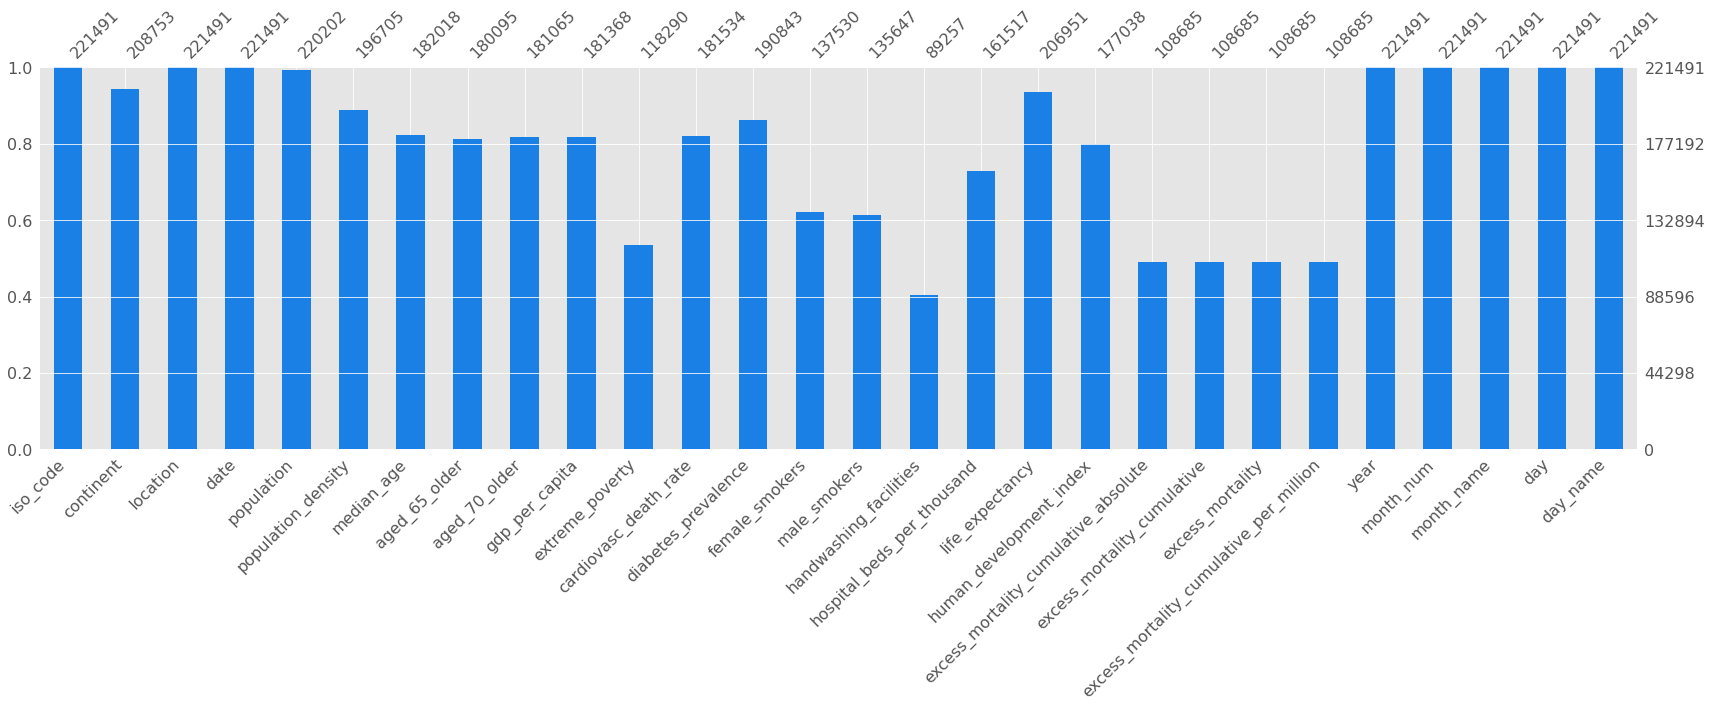

In [87]:
msno.bar(df_demo, labels=True, color=(0.1, 0.5, 0.9))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

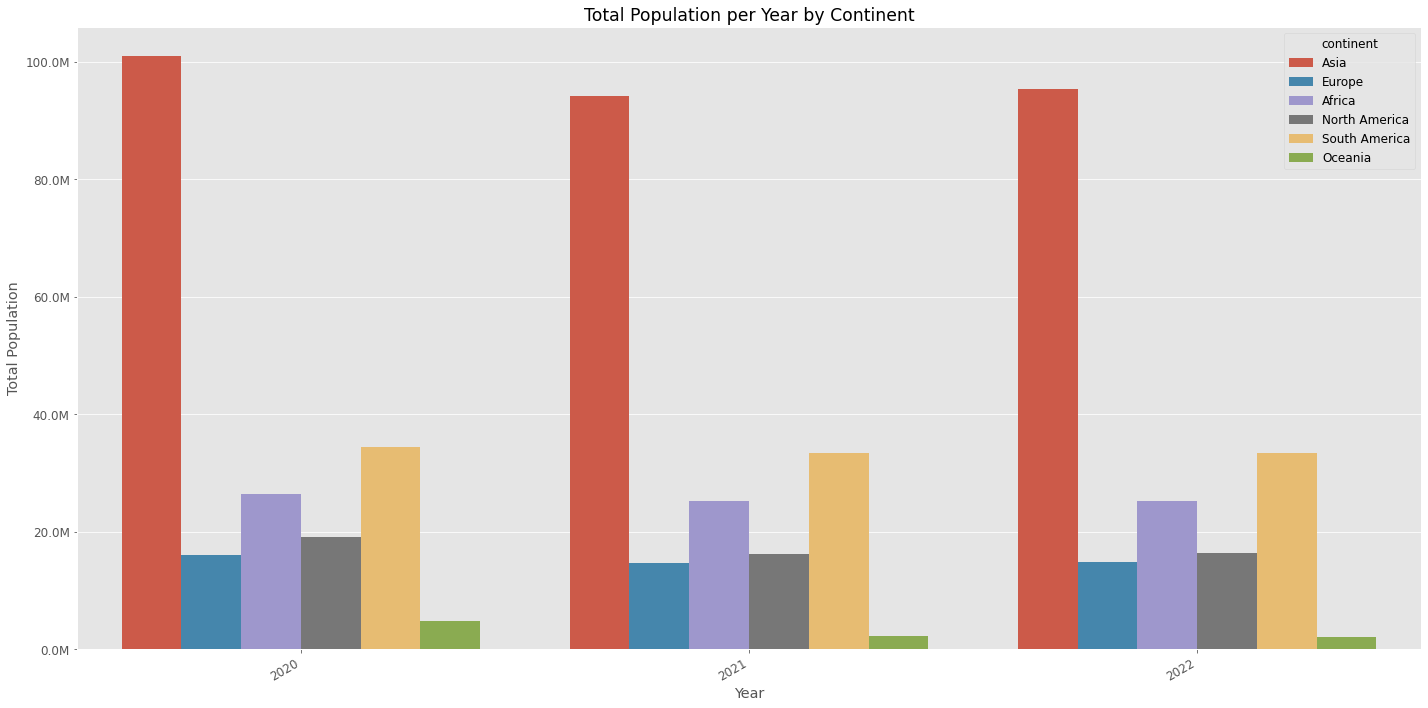

In [88]:
plot_bar(
    data=df_demo,
    x='year', y='population', hue='continent', 
    title='Total Population per Year by Continent', xlabel='Year', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

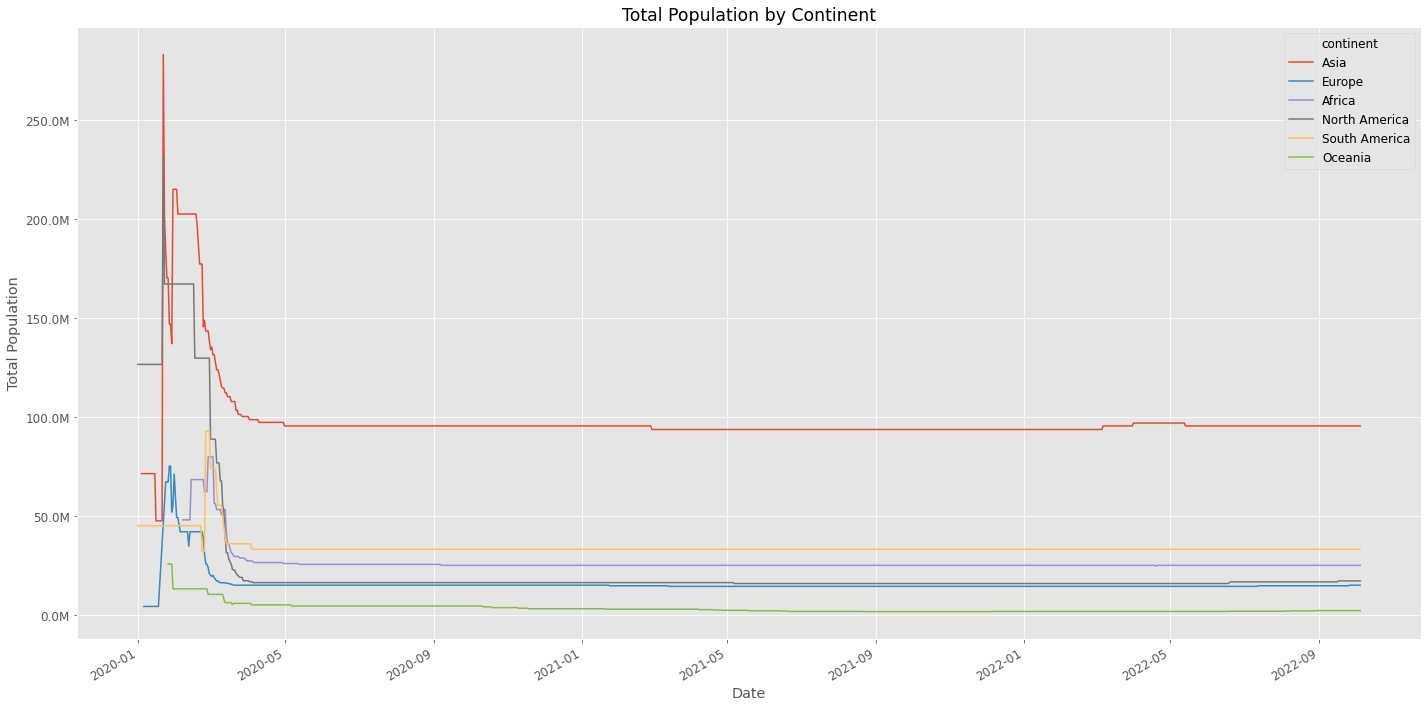

In [89]:
plot_line(
    data=df_demo,
    x='date', y='population', hue='continent', 
    title='Total Population by Continent', xlabel='Date', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

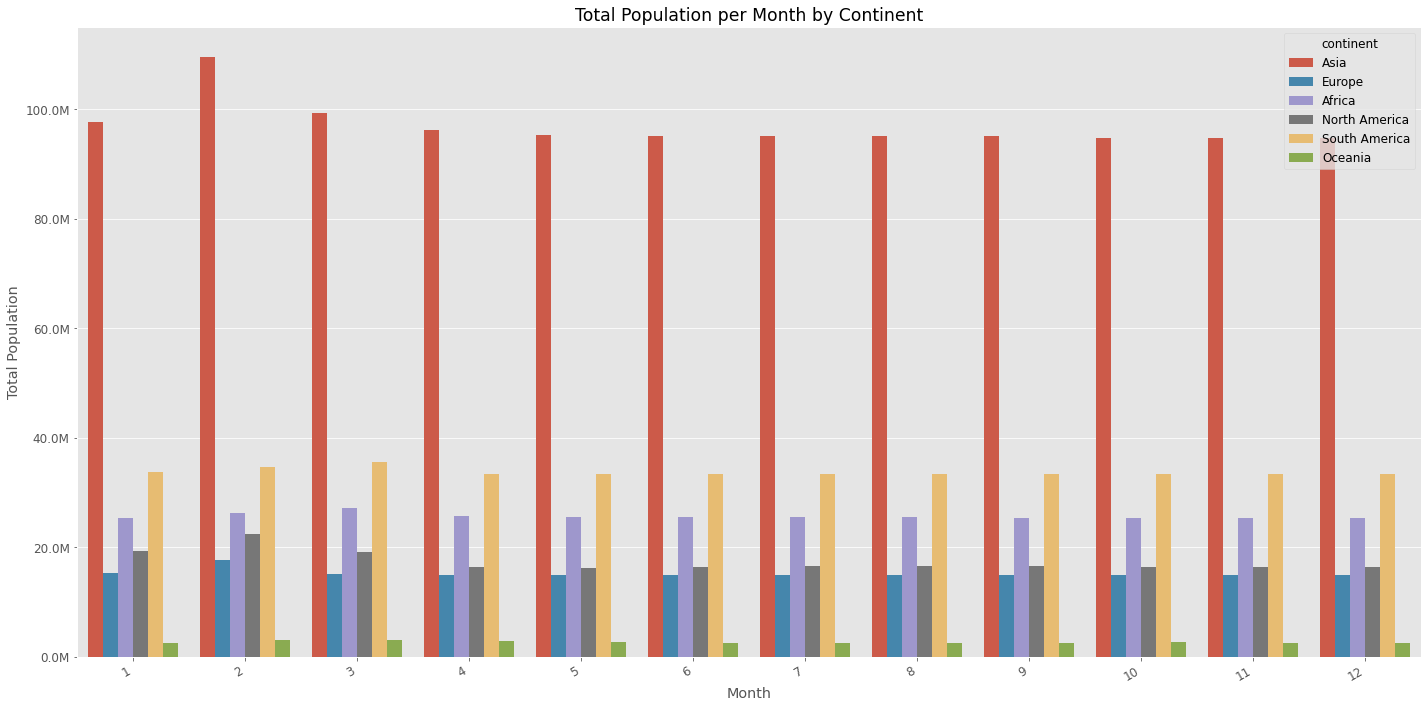

In [90]:
plot_bar(
    data=df_demo,
    x='month_num', y='population', hue='continent', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

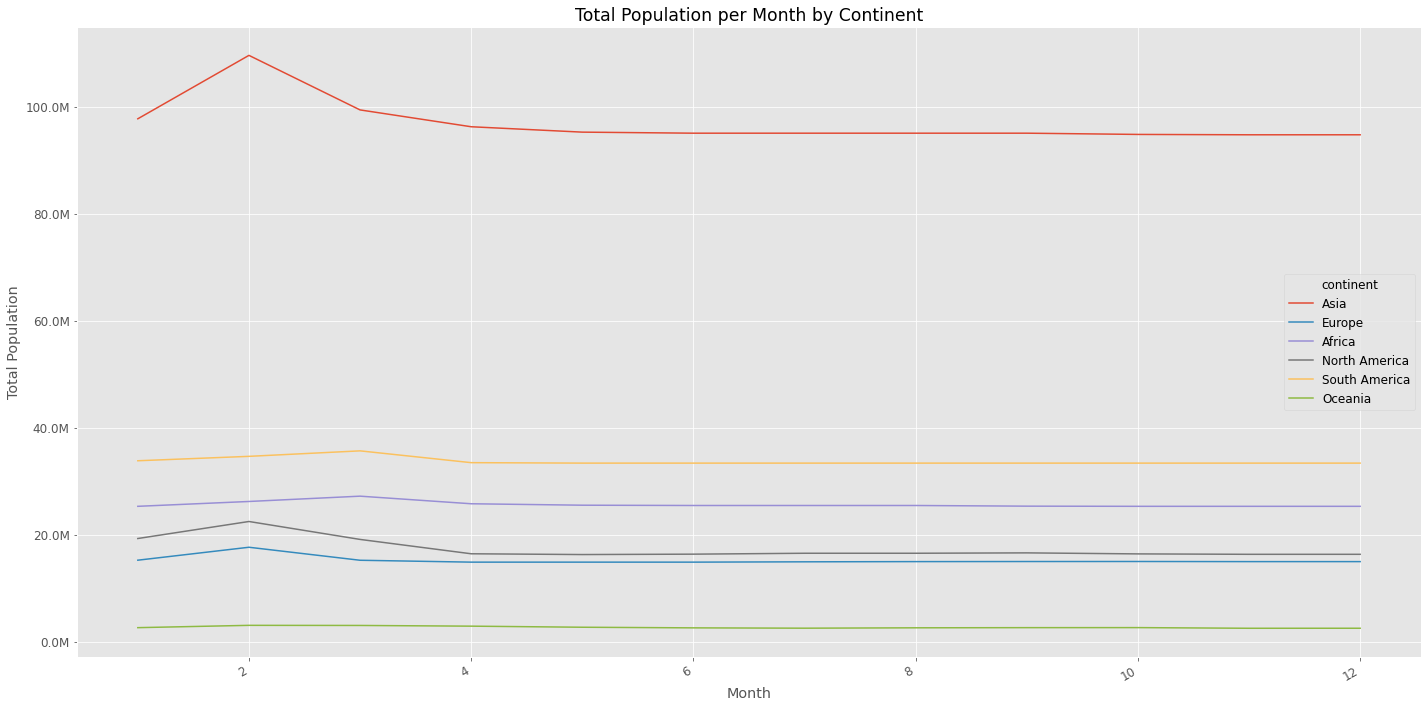

In [91]:
plot_line(
    data=df_demo,
    x='month_num', y='population', hue='continent', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

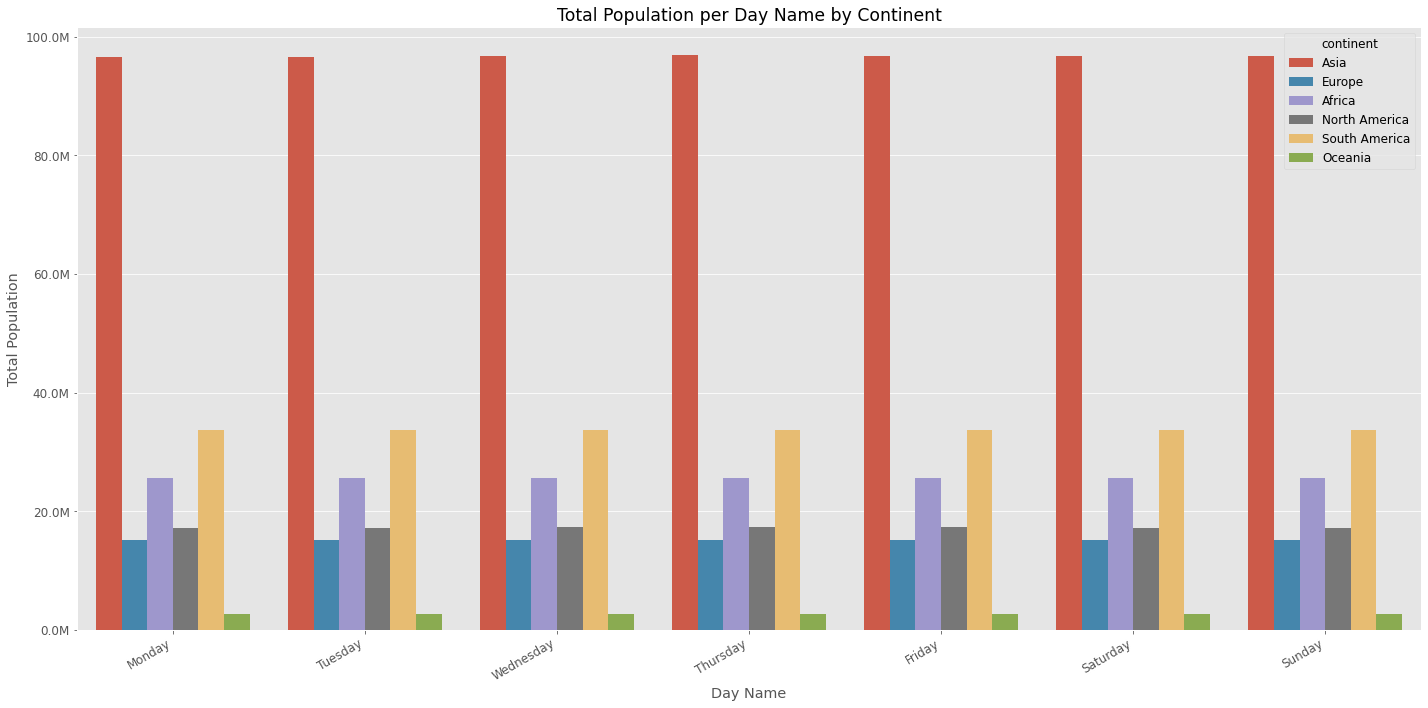

In [92]:
plot_bar(
    data=df_demo,
    x='day_name', y='population', hue='continent', 
    title='Total Population per Day Name by Continent', xlabel='Day Name', ylabel='Total Population', 
    formatter=format_mill
)

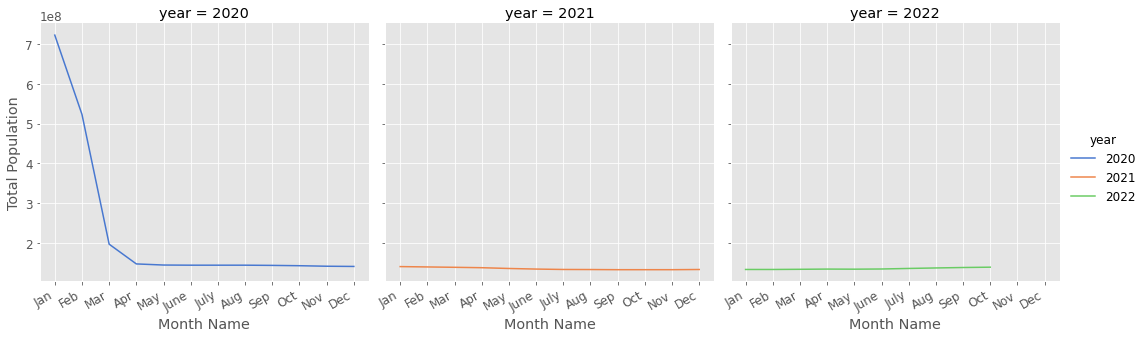

In [93]:
g4 = sns.relplot(
  data=df_demo,
  x='month_name', y='population', ci=None,
  col='year', hue='year', palette='muted',
  kind='line'
)

g4.set(xlabel='Month Name', ylabel='Total Population')
g4.fig.autofmt_xdate()

# Date Truncating or Indexing

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

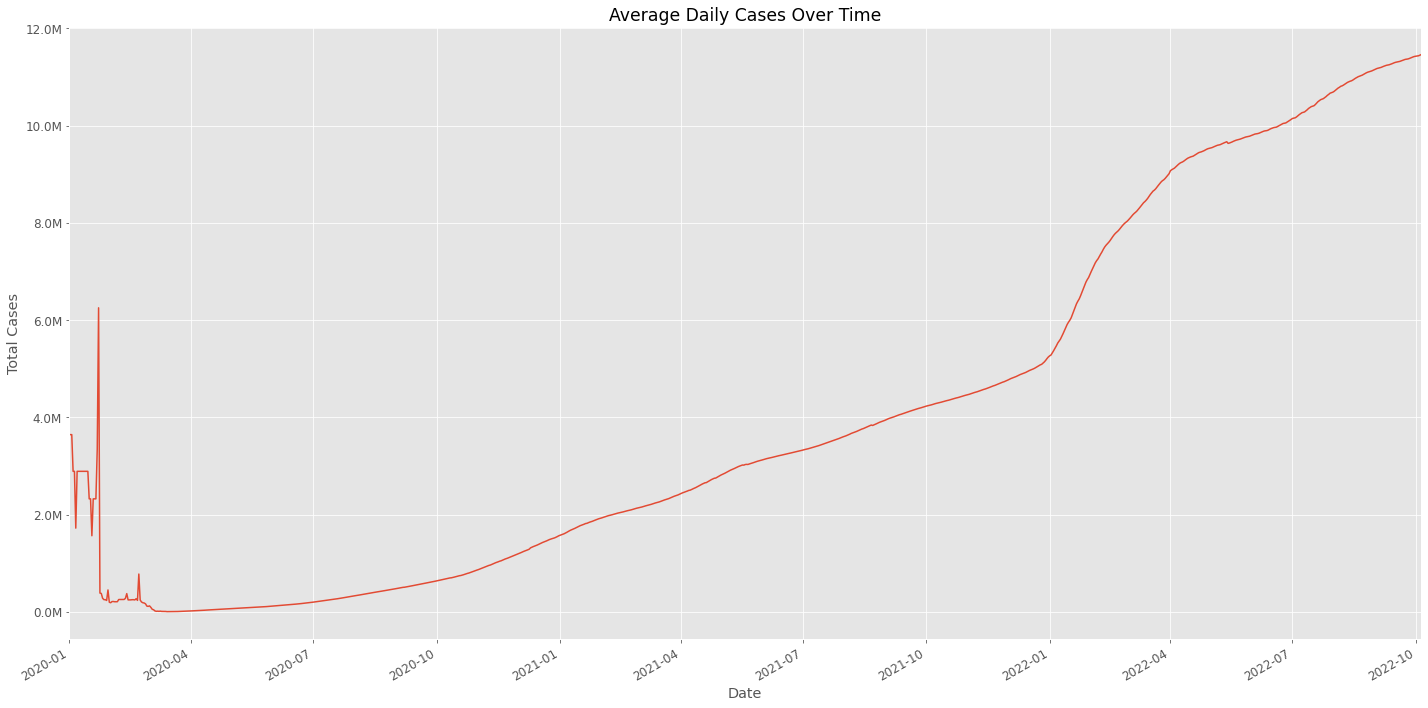

In [94]:
plot_date_rng(
    data=get_data(data=df_filled, rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Daily Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

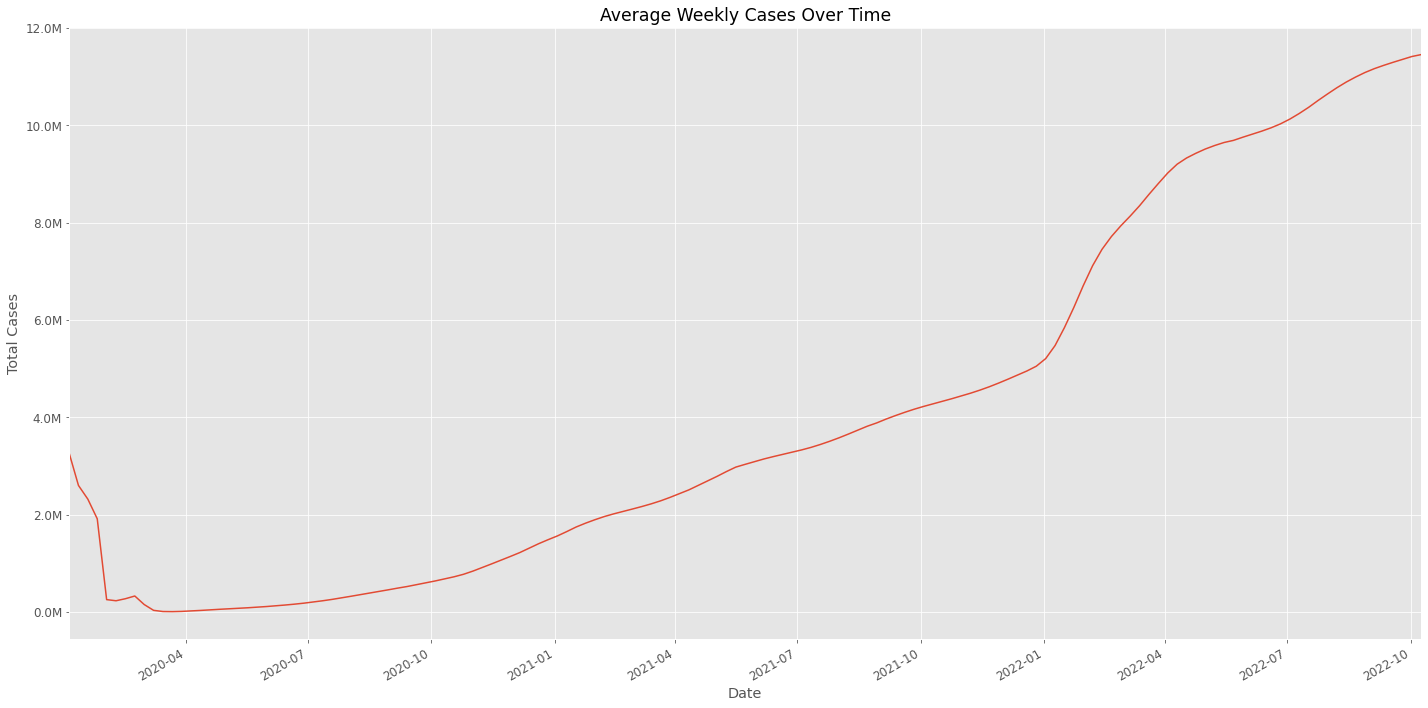

In [95]:
plot_date_rng(
    data=get_data(data=df_filled, rule='W').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Weekly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

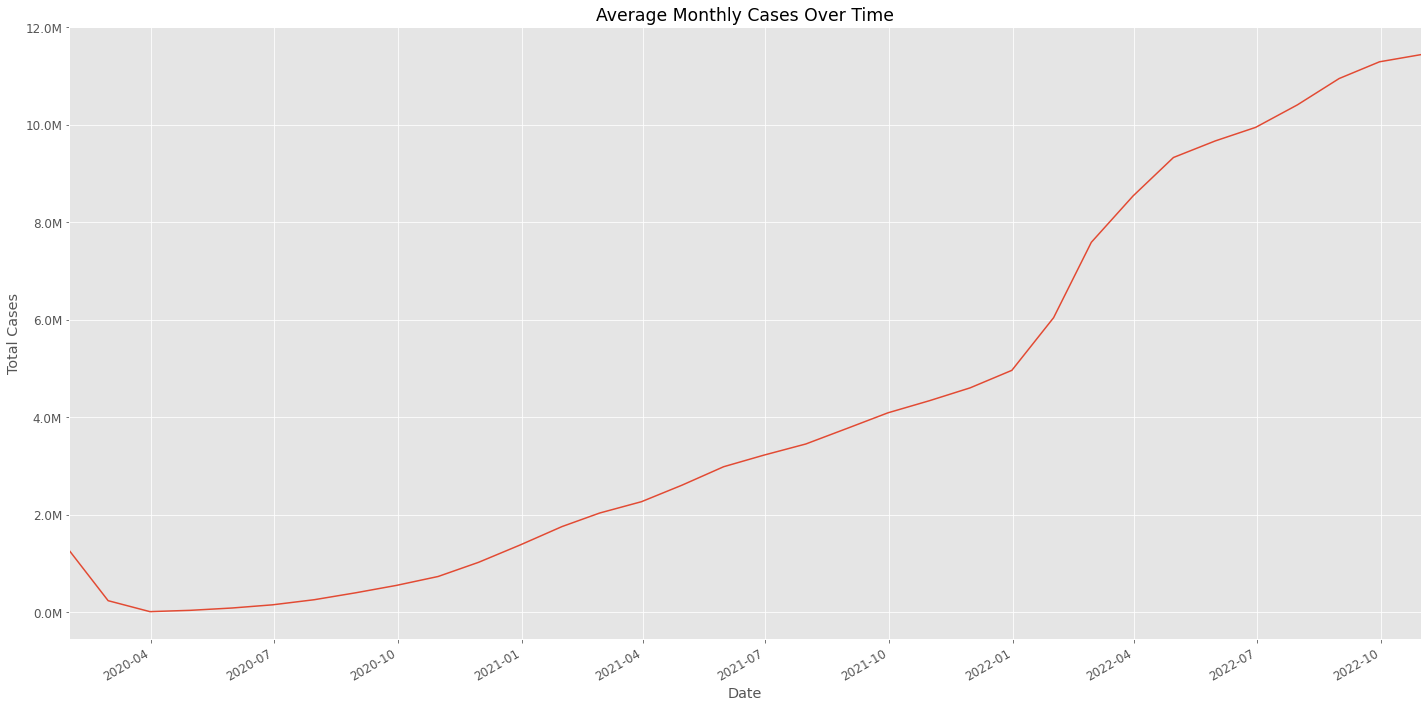

In [96]:
plot_date_rng(
    data=get_data(data=df_filled, rule='M').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Monthly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

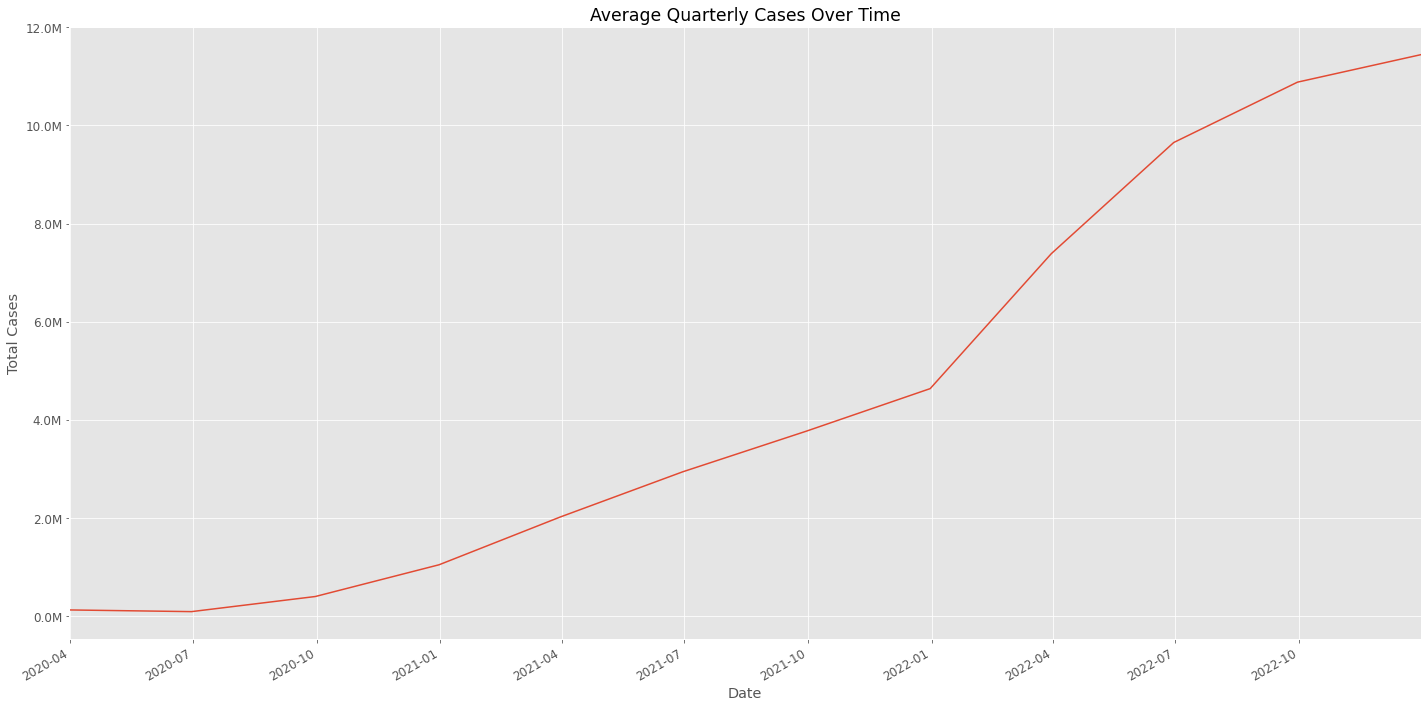

In [97]:
plot_date_rng(
    data=get_data(data=df_filled, rule='Q').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Quarterly Cases Over Time',
    formatter=format_mill
)

Plot Specific Date Range

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

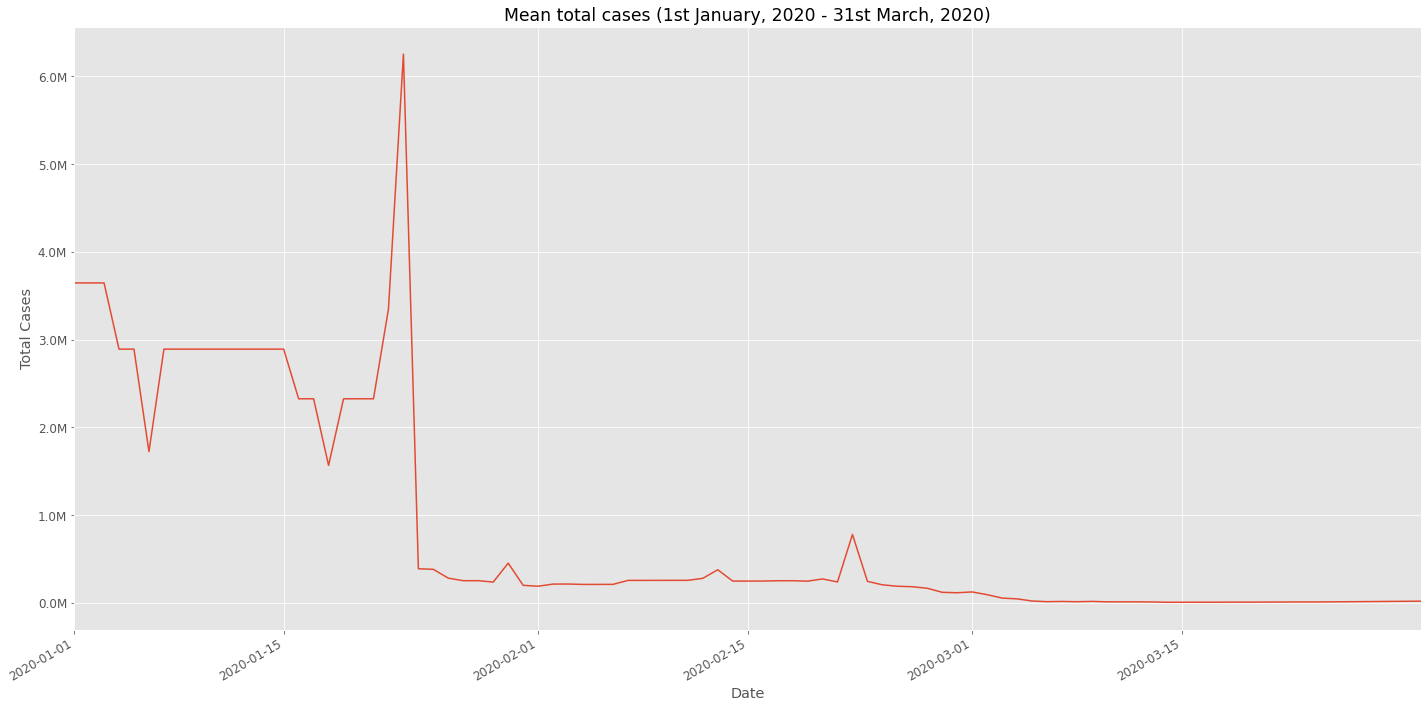

In [98]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-03-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st March, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

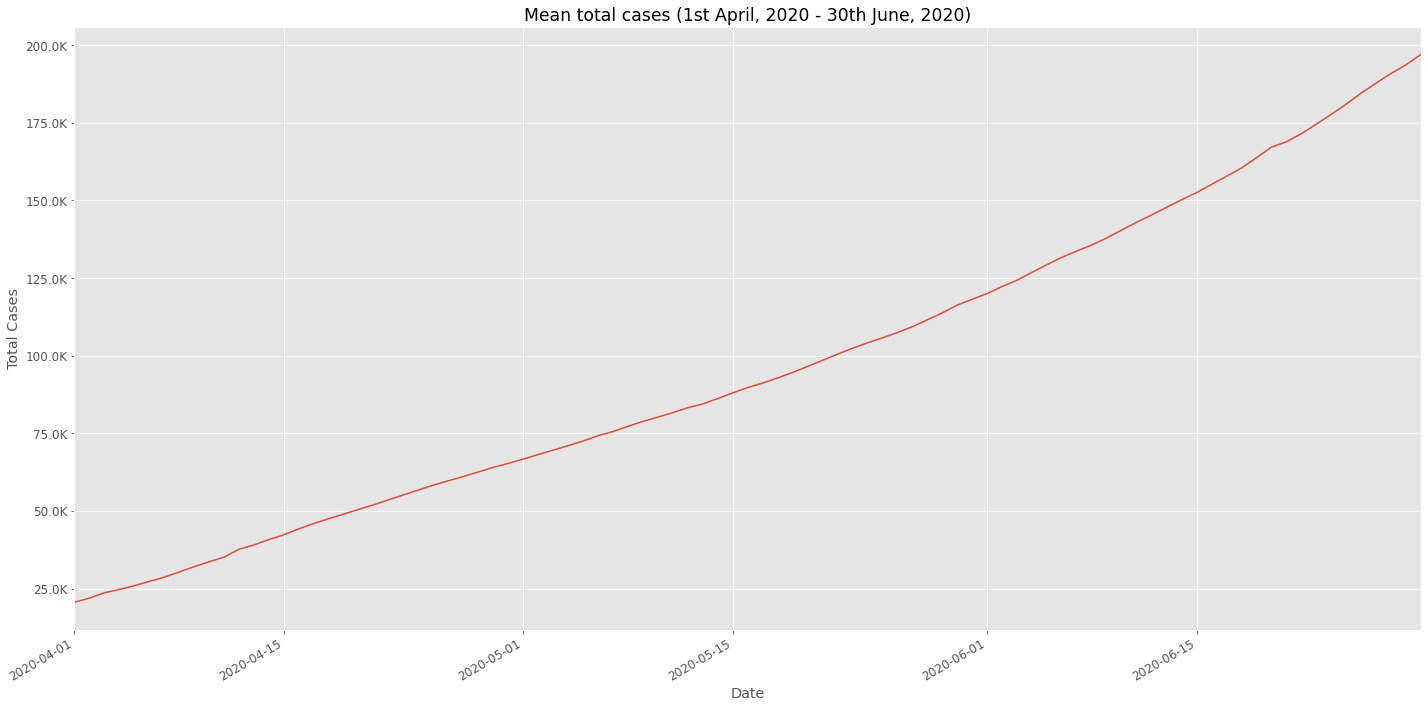

In [99]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-04-01', after='2020-06-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st April, 2020 - 30th June, 2020)',
    formatter=format_tsd
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

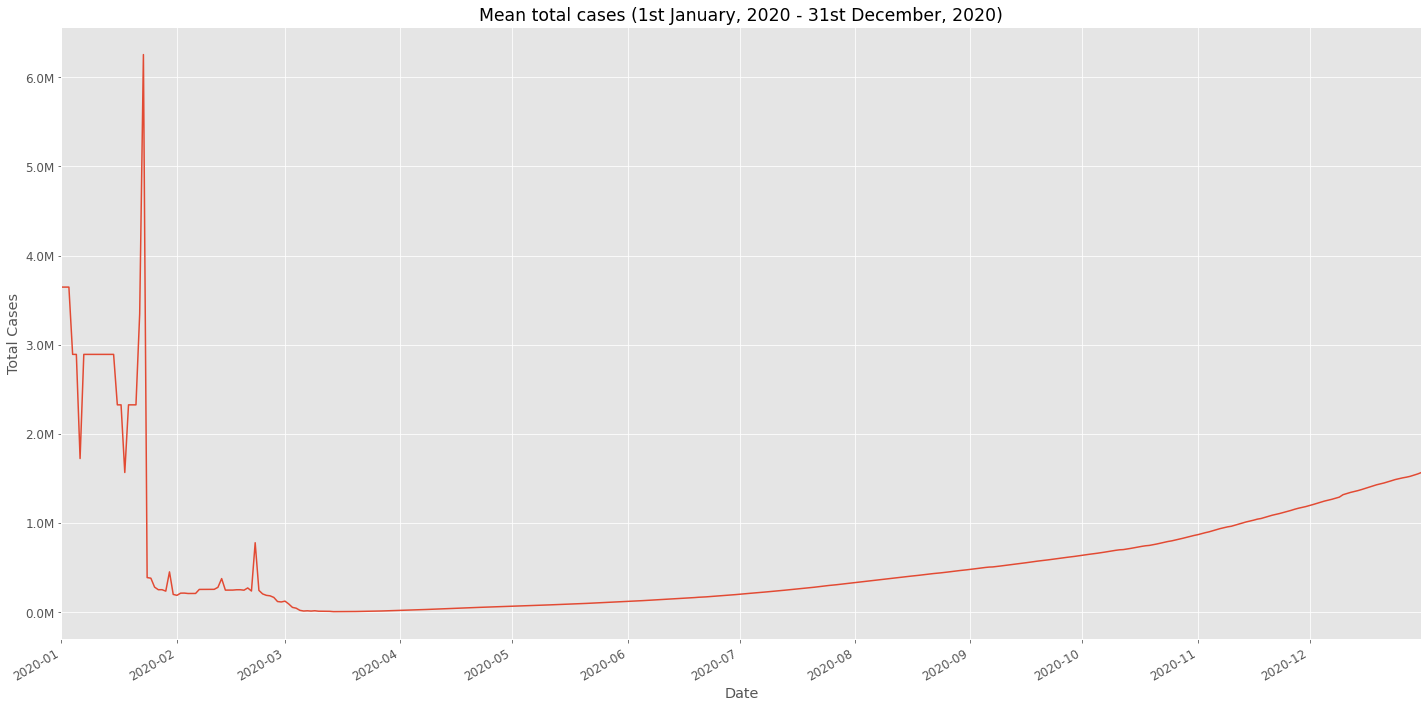

In [100]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st December, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

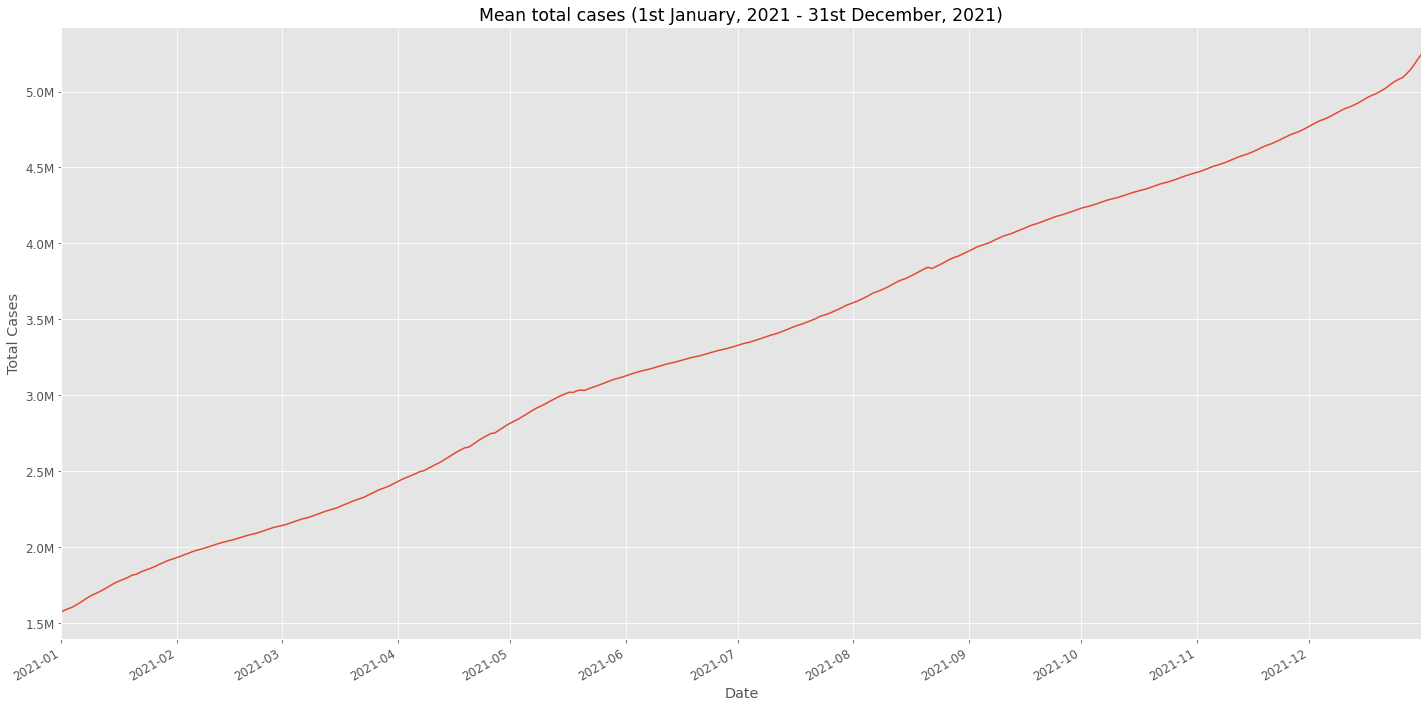

In [101]:
plot_date_rng(
    data=get_data(data=df_filled, before='2021-01-01', after='2021-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2021 - 31st December, 2021)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

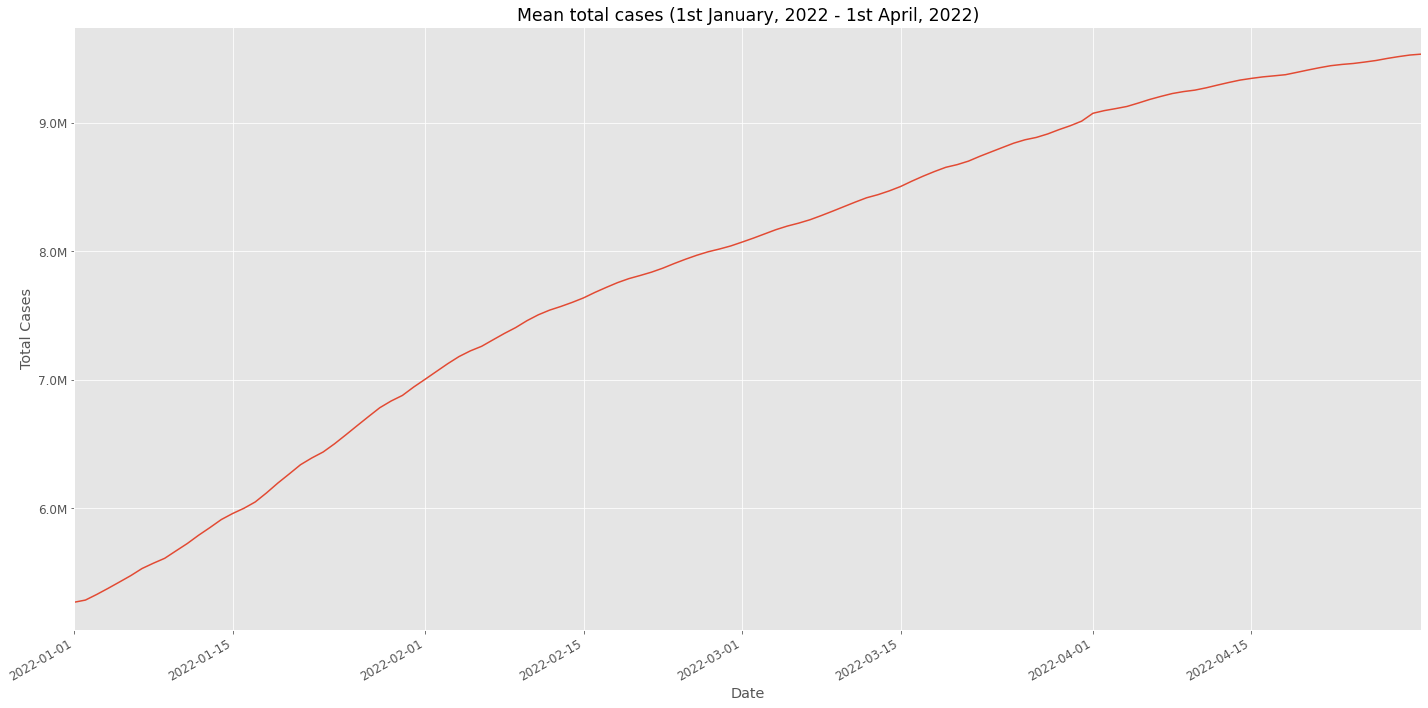

In [102]:
plot_date_rng(
    data=get_data(data=df_filled, before='2022-01-01', after='2022-04-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2022 - 1st April, 2022)',
    formatter=format_mill
)